<a href="https://colab.research.google.com/github/gomathy14/Financial-Transaction-Analysis/blob/main/Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Financial Transaction Analysis**










**Financial Transaction Analysis:**
   Financial institutions face the constant challenge of detecting fraudulent transactions amidst
legitimate ones. Early identification and prevention of such fraudulent activities are crucial for
minimizing financial losses and protecting customer trust. The objective is to develop a
mathematical model to identify risky transactions using the available features of the 'Financial
Transactions' dataset.

      

#**Importing Libraries**

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import plotly.express as px
from itertools import cycle
from plotly.validators.scatter.marker import SymbolValidator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score,precision_score,recall_score
from sklearn.metrics import   ConfusionMatrixDisplay,roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')


#**Importing Data**

In [ ]:
#Reading csv file of Financial Transactions
credit_card = pd.read_csv('/content/FinancialTransactions.csv')

In [ ]:
#Removing Unnamed:0 column as it is not useful for predicting fraud transactions. i.e it ia a ID column
credit_card.drop(columns={'Unnamed: 0'},inplace=True)

In [ ]:
#Printing first 2 rows of the dataset
credit_card.head(2)

Amount        Date Card Type MCC Category Location   Device  \
0  180.924993  2023-07-02     Debit  Electronics       UK  Desktop   
1  794.625797  2023-02-18   Prepaid    Groceries   Canada  Desktop   

   Previous Transactions  Balance Before Transaction  Time of Day  Velocity  \
0                      6                  919.055267           10 -0.337955   
1                      5                 3529.930762           17  0.015117   

   Customer Age  Customer Income    Card Limit  Credit Score  \
0            52    105545.340543   2503.758986           401   
1            62     92651.854405  12885.681726           409   

  Merchant Reputation  Merchant Location History  Spending Patterns  \
0             Average                          6         828.820298   
1             Average                         13        4384.528307   

  Online Transactions Frequency  Is Fraudulent  
0                        Medium              0  
1                           Low              1

In [ ]:
#Printing the columns of the dataset
credit_card.columns

Index(['Amount', 'Date', 'Card Type', 'MCC Category', 'Location', 'Device',
       'Previous Transactions', 'Balance Before Transaction', 'Time of Day',
       'Velocity', 'Customer Age', 'Customer Income', 'Card Limit',
       'Credit Score', 'Merchant Reputation', 'Merchant Location History',
       'Spending Patterns', 'Online Transactions Frequency', 'Is Fraudulent'],
      dtype='object')

In [ ]:
#Printing shape of the dataset - 1000 rows and 19 columns
credit_card.shape

(1000, 19)

In [ ]:
#Showing the summary of the input dataset - Column name, Number of non-missing values count,DataType of each column
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Date                           1000 non-null   object 
 2   Card Type                      1000 non-null   object 
 3   MCC Category                   1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Device                         1000 non-null   object 
 6   Previous Transactions          1000 non-null   int64  
 7   Balance Before Transaction     1000 non-null   float64
 8   Time of Day                    1000 non-null   int64  
 9   Velocity                       1000 non-null   float64
 10  Customer Age                   1000 non-null   int64  
 11  Customer Income                1000 non-null   float64
 12  Card Limit                     1000 non-null   fl

Inference:
The dataset contains 1000 records of financial transactions with each transaction containing a indicator whether the transaction is fraudulent or not. The dataset contains 18 columns which describes the characteristic of each transaction

#**Exploratory Data Analysis - Data Visualization**

In [ ]:
# To analyse how transactions happen over time aggregating transactions by month will be more effective than date
credit_card['Date']=pd.to_datetime(credit_card['Date'])
credit_card['Month']=credit_card['Date'].dt.month

###Distribution Analysis

Distribution of DV - Is Fraudulent

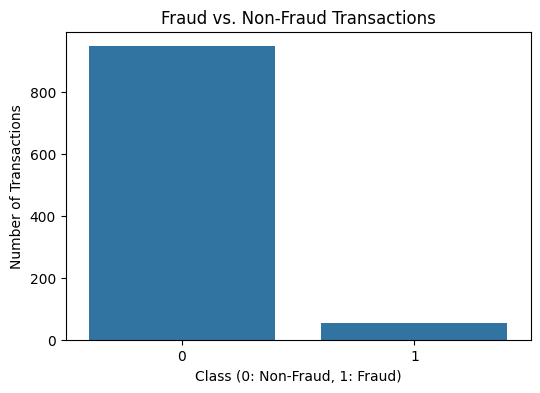

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Is Fraudulent', data=credit_card)
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

There is a significant imbalance between the two classes.
The majority of transactions are non-fraudulent (class 0), with a count close to 900.
The number of fraudulent transactions (class 1) is much smaller, with a count that appears to be under 100

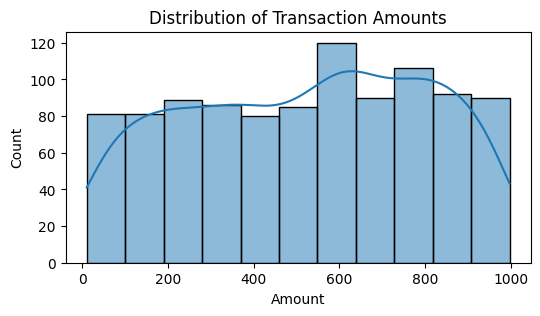

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(credit_card['Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()


Amount involved in the transaction is visualized using a histogram to check the presence of skewness. Amount ranges from 0 to 1000 with more number of transactions happened involving amount of 600

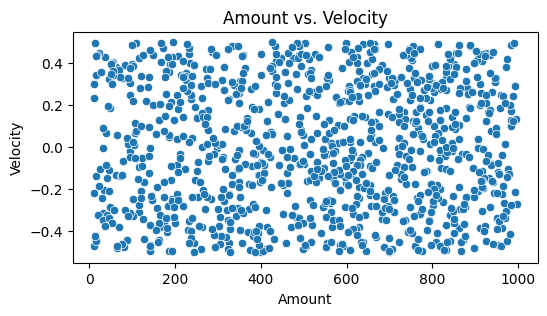

In [ ]:

# Scatter plot to identify outliers
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Amount', y='Velocity', data=credit_card)
plt.title('Amount vs. Velocity')
plt.show()

**Insights:**


The distribution is somewhat uniform across the bins, but with some fluctuations.
The highest count of transactions occurs around the 600-700 range




The scatter plot shows a fairly random distribution of data points, with no apparent pattern or trend between the two variables.

This randomness implies that the velocity does not vary systematically with the transaction amount in this dataset.
Overall, the plot suggests that transaction amount and velocity are independent of each other, with no clear linear or nonlinear relationship visible.

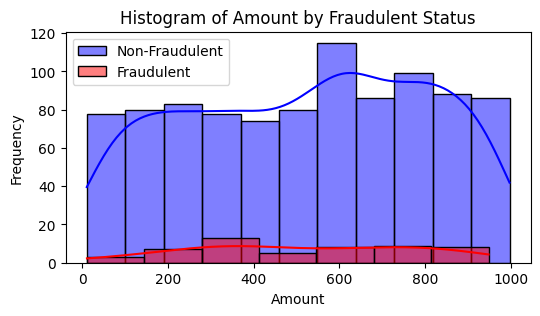

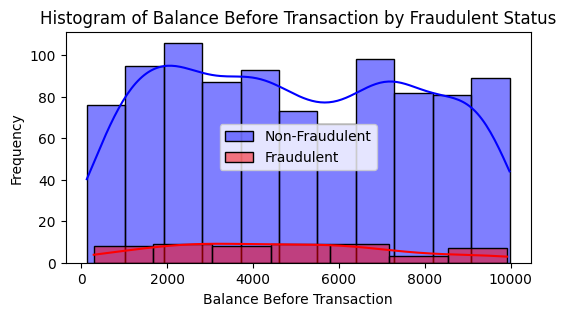

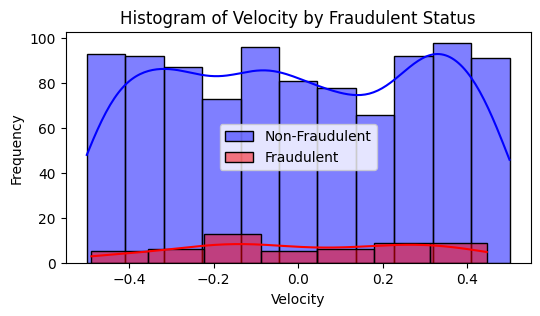

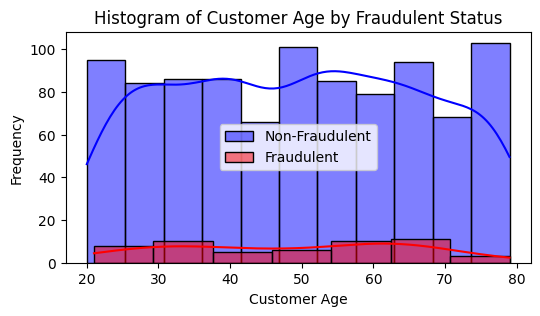

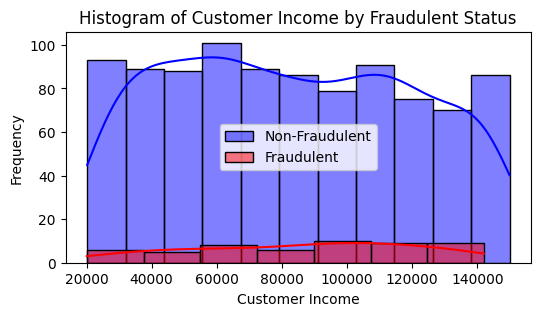

In [ ]:
# Assume df is your DataFrame and 'Is Fraudulent' is the output variable
features = ['Amount', 'Balance Before Transaction', 'Velocity', 'Customer Age', 'Customer Income']

for feature in features:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=credit_card[credit_card['Is Fraudulent'] == 0], x=feature, color='blue', label='Non-Fraudulent', kde=True)
    sns.histplot(data=credit_card[credit_card['Is Fraudulent'] == 1], x=feature, color='red', label='Fraudulent', kde=True)
    plt.title(f'Histogram of {feature} by Fraudulent Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


1. Histogram of Amount involved in the transaction with respect to fraudulent indicator shows that more number of transactions that are fraudulent happened in the range of 300 to 400
2.  Histogram of Balance Before Transaction with respect to fraudulent indicator shows that more number of transactions that are fraudulent happened in the range of 5k to 8k
3. Histogram of Velocity of the transaction with respect to fraudulent indicator shows that more number of transactions that are fraudulent resulted in -0.2 to -0.1
4. Histogram of Customer Age with respect to fraudulent indicator shows that fraudulent transactions are targeted at customers of age more than 50
5. Histogram of Customer Income of the transaction with respect to fraudulent indicator shows fraudulent transactions are targeted at customers who earn more than 80k


Text(0, 0.5, 'Count')

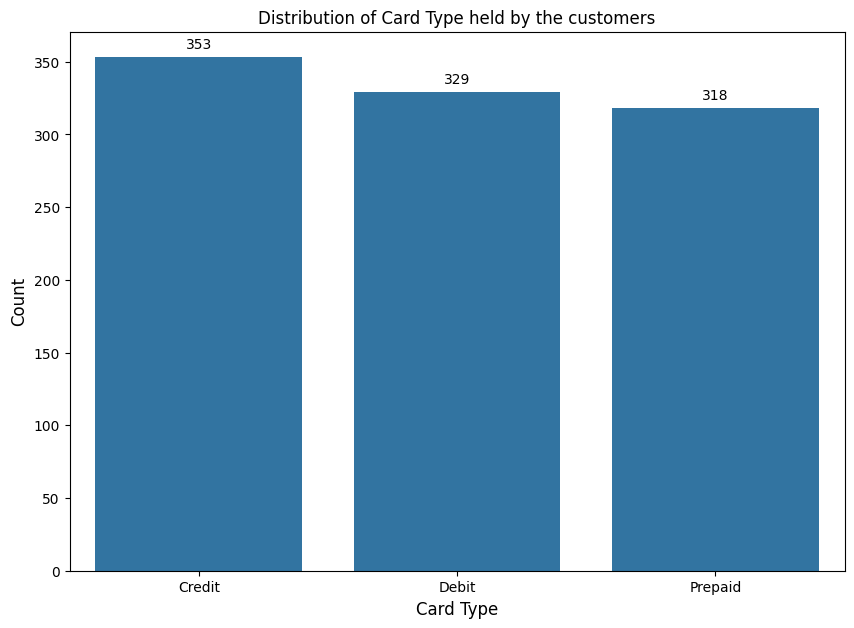

In [ ]:
#An analysis on Different Card Types held by customers
proc_df = credit_card.groupby(["Card Type"]).size().to_frame() # - aggregating data with respect to Card Type
proc_df.rename(columns={0:'Frequency'},inplace=True)
proc_df=proc_df.reset_index(level='Card Type')
fig=plt.figure(figsize=(10,7))  #Setting the axis for creating chart
#- Barplot function of seaborn library with x axis as Different Card types and its frequency as y axis
ax=sns.barplot(x=proc_df['Card Type'],y=proc_df['Frequency'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title("Distribution of Card Type held by the customers")
plt.xlabel("Card Type",fontsize=12)
plt.ylabel("Count",fontsize=12)

In [ ]:
# Creating a histogram on age of customers- as it helps in visualizing the distribution of the age
# Passing age column to Histogram function of plotly library as this function creates more interactive plots than matplotlib and seaborn
fig = px.histogram(credit_card, x="Customer Age", nbins=20,title='Histogram of Age of Different Customers')
fig.show()

Histogram of age of customers shows that more number of customers present in the dataset in more than 75 bin with 97 customers and the less number of customers are present in the bin of 70-74 with 62 customers. The age is uniformly distributed with no outliers

In [ ]:
#Stacked histogram - Distribution of Age with respect to each card type
fig = px.histogram(credit_card, x="Customer Age", color="Card Type")
fig.show()

The above stacked histogram shows that distribution of age is uniform irrespective of card type

In [ ]:
#Histogram on velocity with respect to each card type and is Fraudulent
#passing x axis as Card Type and y axis as velocity with respect to Frudulent indicator. To show the avg velocity histfunc is passes ad avg
fig = px.histogram(credit_card, x="Card Type", y='Velocity', color="Card Type", pattern_shape="Is Fraudulent",histfunc="avg")
fig.show()

The above histogram shows that in debit and prepaid cards range and avg velocity is higher for fradulent transactions on an average of 0.05 than non fraudulent transactions which has an average of 0.009. In credit card the avg velocity is around 0.03 for fraudulent transactions whereas 0.003 for non fraudulent transactions

In [ ]:
##Bar chart - Analysis the type of card transaction used in each MCC category
#Aggregating data by MCC category and card type
#Creating x axis as MCC Category, y axis as frequency of transactions in each category with respect to each card type
proc_df = credit_card.groupby(["MCC Category","Card Type"]).size().to_frame()
proc_df.rename(columns={0:'Frequency'},inplace=True)
proc_df=proc_df.reset_index(level=['MCC Category','Card Type'])
fig = px.histogram(proc_df, x="MCC Category",y="Frequency",
             color='Card Type', barmode='group',labels={'sum of Frequency':'Count','Kind':'Card type'},
                   title="Type of card transaction used in each MCC category",
             height=400)
fig.show()

Analysis of frequency of transactions on each category with respect to each card type shows that most of the transactions are done with credit card in travel category with total of 62 transactions and less number of transaction was made in Groceries category with prepaid card with total of 35 transactions

###Association Analysis

Scatter plots are used to identify if there exists any pattern between the variables

Text(0, 0.5, 'Amount')

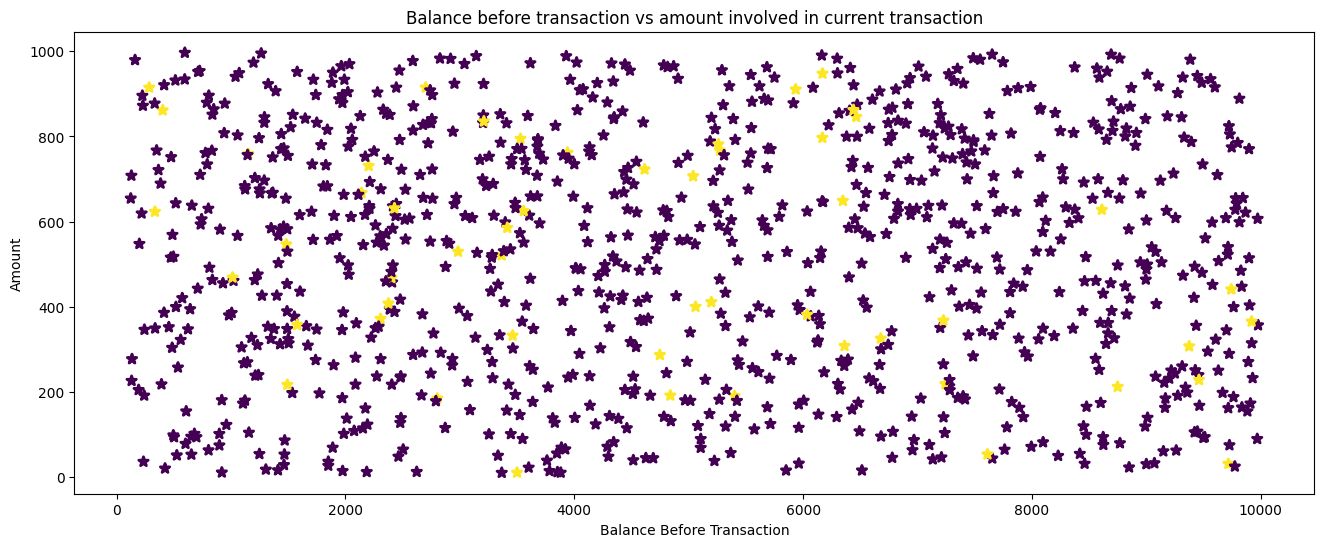

In [ ]:
#Scatter plot analysis on Balance Before Transaction and Amount involved in the transaction by Is Fraudulent
#This analysis is done to see if there is any pattern exists between these variables with respect to fraudulent indicator
plt.figure(figsize=(16,6))#-Scatter function of matplotlib library to create the scatter plot
scatter=plt.scatter(credit_card['Balance Before Transaction'],credit_card['Amount'],s=50,
                    c=credit_card['Is Fraudulent'].astype('category').cat.codes,
            marker='*',linewidths=2)
plt.title('Balance before transaction vs amount involved in current transaction')
plt.xlabel('Balance Before Transaction')
plt.ylabel('Amount')
# Yes=mpatches.Patch(color='yellow',label='Yes')
# No=mpatches.Patch(color='purple',label='No')
# plt.legend(handles=[Yes,No],title="Is Fraud",ncol=2)

The scatter plot shows that Amount involved in the transaction and Balance involved in the transaction are not associated. There is no pattern formed irrespective of the fraudulent indicator

In [ ]:
#Scatter plot between Card Limit and Credit Score with respect to each card type
#the trendline parameter is set to os to check if any pattern is formed between these candidate IVS
fig = px.scatter(credit_card, x="Card Limit", y="Credit Score", color="Card Type",symbol="Card Type",
                 title='Card Limit vs Credit Score in each card type',trendline="ols", trendline_scope="overall",
                 hover_data=["Is Fraudulent"])
fig.update_traces(marker_size=10)
fig.show()

The scatter plot shows there is no pattern present and the card limit and credit score does not have any correlation between them

In [ ]:
#Scatter plot analysis on Customer Income versus Spending Patterns with respect to each transaction frequency type
#To find if there is any relationship exists between spending patterns and customer income
fig = px.scatter(credit_card, x="Customer Income", y="Spending Patterns",facet_col="Online Transactions Frequency",
                 title='Customer income vs Spending Pattern in each category of online transaction frequency type',trendline='ols')
fig.update_traces(marker_size=10)
fig.show()

Irrespective of online transaction frequency type, data points do not form a pattern between customer income and spending patterns.

In [ ]:
#To find if any relation exists between amount involved in the transaction and velocity with respect to each reputation type
# and Is Fraudulent
fig = px.scatter(credit_card, x="Amount", y="Velocity",facet_col="Merchant Reputation",facet_row="Is Fraudulent",
                 title='Amount involved in the transaction vs velocity in each merchant type',trendline='ols')
fig.update_traces(marker_size=10)
fig.show()

There is no pattern formed by the data points between amount involved in the transaction and velocity

In [ ]:
##An analysis on amount involved in the transaction in each category of MCC over each month
# Aggregating the data by Month and MCC category. As not all categories will be present every month null values are replaced with zero
transact_=credit_card.groupby(["Month","MCC Category"])['Amount'].sum().unstack().fillna(0)
#Creating line plot using line function of plotly library with x axis as Month, y axis as amount and lines as MCC Category
fig = px.line(transact_,title="Amount spent in each category in each month")
fig.update_traces(mode="markers+lines")
fig.update_layout(
    font_family="Times New Roman",
    font_color="royalblue",
    title_font_color="darkblue",
    legend_font_color="darkblue")
fig.show()

The transaction analysis shows that travel related transactions are more in the Month of Feb to June and after November. Healthcare transactions had a great dip at the month of June

In [ ]:
## Analysis on distribution of device used in the transaction in each city
#Calculating the no of transaction with respect to each city
frequency_df=credit_card['Location'].value_counts().to_frame()
frequency_df.rename(columns={'Location':'Transaction_Frequency'},inplace=True)
#Getting unique devices and cities present in the dataset
city_list=list(frequency_df.index)
devicetypes=list(credit_card['Device'].unique())
#Storing the no of transactions used by each device in each city in a dictionary
sorted_city={}
for i in range(len(city_list)):
    city=city_list[i]
    sorted_city[city]=[]
    city_df=credit_card[credit_card['Location']==city]
    for j in range(len(devicetypes)):
        sorted_city[city].append(city_df[city_df['Device']==devicetypes[j]].shape[0])
finalcity_df=pd.DataFrame.from_dict(sorted_city,orient='index',columns=devicetypes)

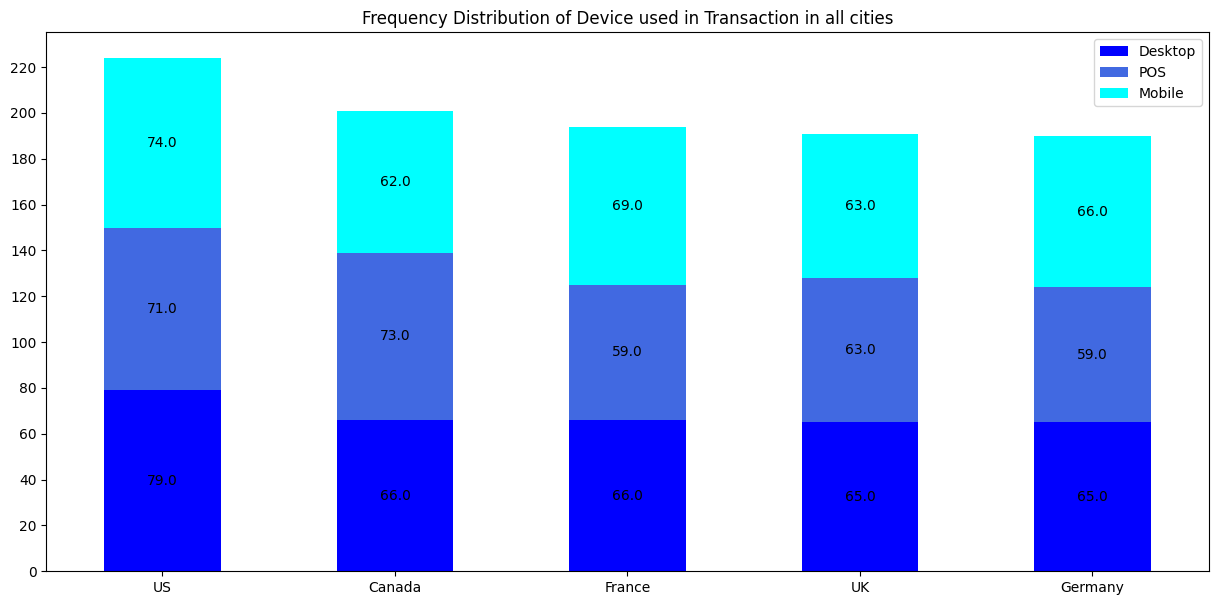

In [ ]:
#Creating a stacked bar chart from the dictionary of different types of device used in each transaction in each city
ax=finalcity_df.plot(stacked=True, kind='bar',figsize=(15,7),color=("blue","royalblue","cyan"))
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    if label_text!=0:
        ax.text(label_x, label_y, label_text, ha='center',
            va='center')
plt.title("Frequency Distribution of Device used in Transaction in all cities")
plt.xticks(rotation=0,ha="center")
plt.locator_params(axis='y',nbins=20)
# Display chart - x axis as City, y axis as Number of transactions and each patch showing each type of device
plt.show()

The bar chart displays that more number of desktop transactions has happened in US and less number of transactions has happened through POS in Germany

In [ ]:
##Analysis on trnsactions involved in each transaction type in each MCC category in each hour of day
#Data aggregation with respect to Time and MCC Category
merchant_df=credit_card.groupby(["Time of Day","MCC Category"]).size().to_frame()
merchant_df=merchant_df.reset_index(level=['Time of Day','MCC Category'])
merchant_df.rename(columns={0:'Frequency'},inplace=True)
merchant_df=merchant_df.sort_values('Frequency',ascending=True)
#Creating an area plot to show the volume of transactions involved in each category at each hour of day
#with x axis as Time and y axis as Volume of Transactions and hue as MCC category
fig = px.area(merchant_df,x='Time of Day',y='Frequency',color='MCC Category',
              title="Frequency of transaction in each category at each point of time",
             labels={"value":"Frequency","MCC Category":"Type of MCC Category"})
fig.update_traces(mode="markers+lines")
fig.update_layout(
    font_family="Times New Roman",
    font_color="royalblue",
    title_font_color="darkblue",
    legend_font_color="darkblue")
fig.show()

In the earlier part of the day more number of transactions happened in travel category whereas the volume of transaction involved in Entertainment is higher than other categories at the later part of the day.

#**Data Pre-Processing**

##Correlation

<Axes: >

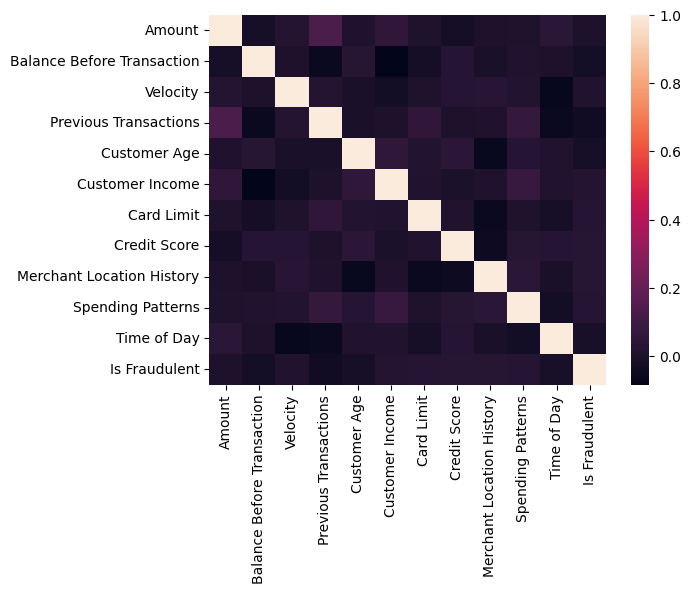

In [ ]:
# Checking if there is any inter correlation exists between the Quantitative variables of the dataset as inter correlation may affect the model performance
credit_card1=credit_card[['Amount','Balance Before Transaction','Velocity','Previous Transactions','Customer Age','Customer Income','Card Limit','Credit Score','Merchant Location History','Spending Patterns','Time of Day','Is Fraudulent']]
sns.heatmap(data = credit_card1.corr())

Models like logistic regression assumes that there is no multicollinearity present between the independent variables. So in such cases it is essential to remove variables that has inter correlation between other candidate IVs. To view the correlation heatmap function of seaborn library is used and the heatmap shows that there is no multicollinearity present between the variables. All variables have a very low inter correlation value i.e below 0.3

##BoxPlot - Outlier Detection

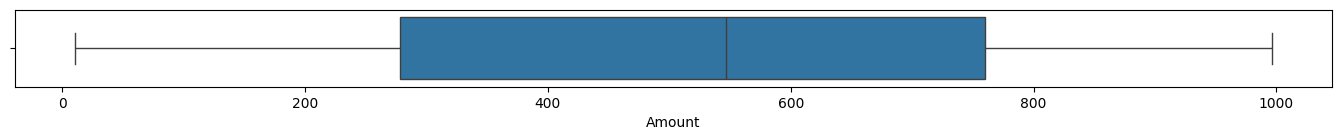

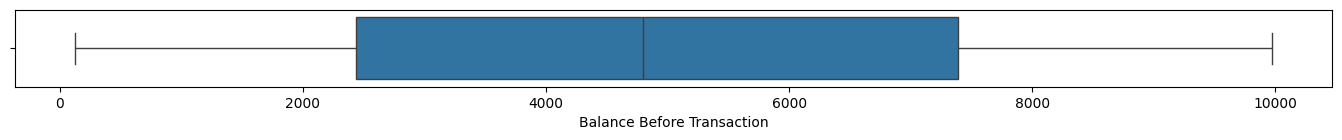

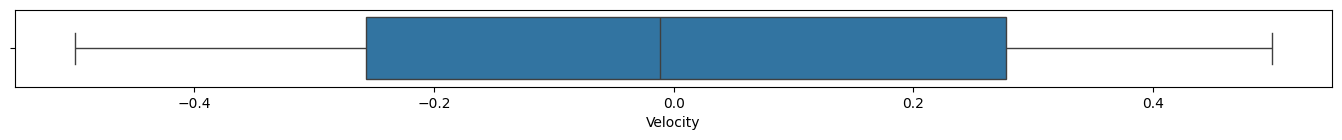

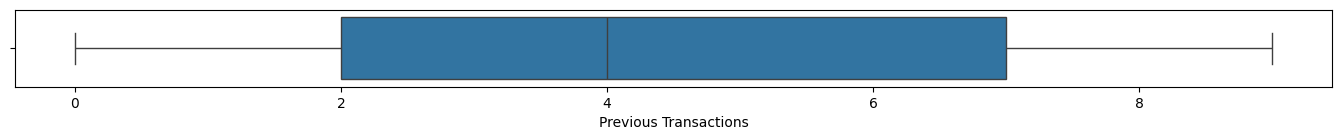

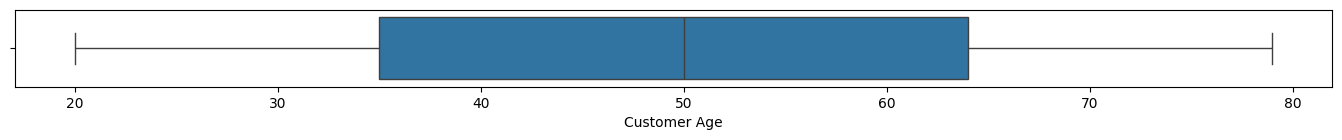

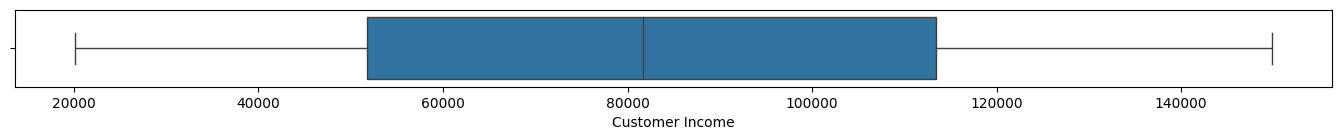

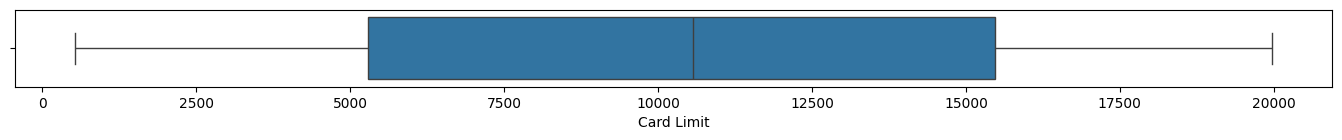

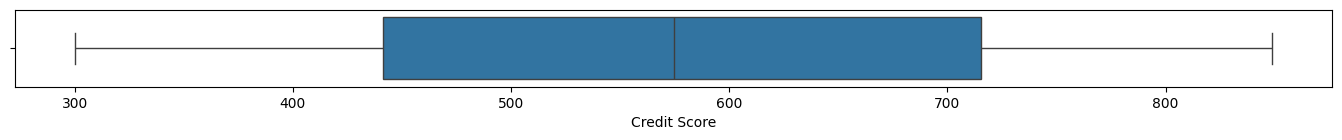

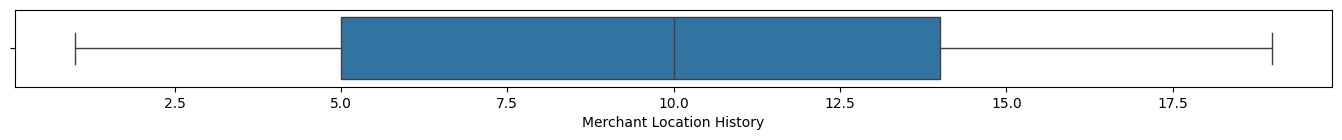

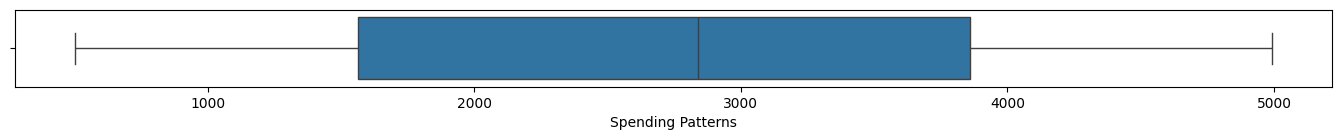

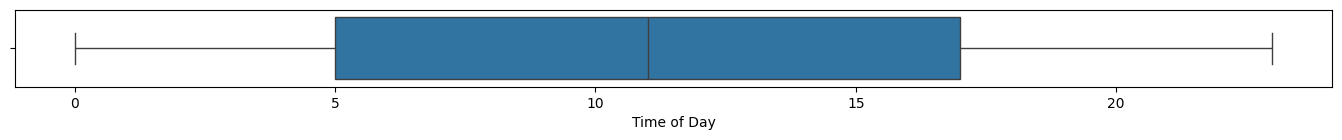

In [ ]:
##-Outlier Detection using Box Plot Analysis
cols=['Amount','Balance Before Transaction','Velocity','Previous Transactions','Customer Age','Customer Income','Card Limit','Credit Score','Merchant Location History','Spending Patterns','Time of Day']
for col in cols:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=credit_card, x=col)

the presence of outliers may affect the model results drastically. So the quantitative variables are tested for the presence of outliers using BOX PLot. All the variables does not have any data point outside the IQR range. So there is no outliers present.

##QQ PLOT- Skewness Detection

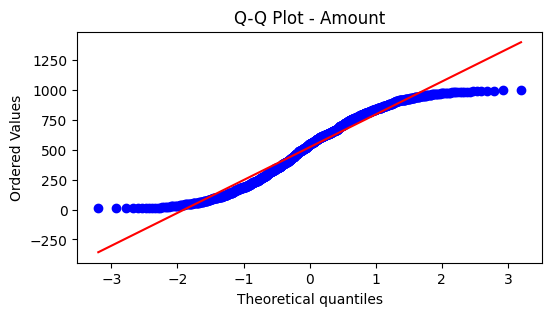

Skewness: -0.11748818504525273


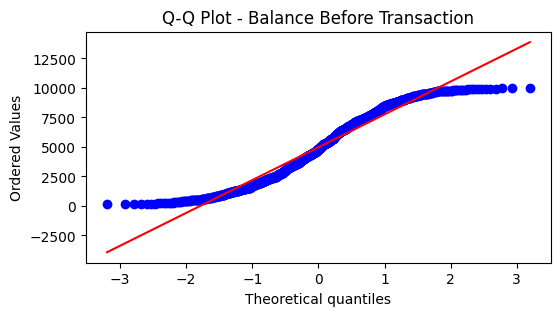

Skewness: 0.07906457314869914


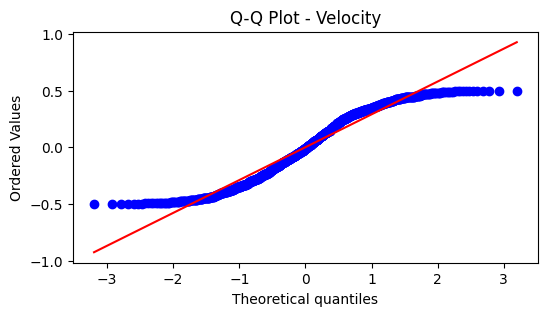

Skewness: -0.006670828175795649


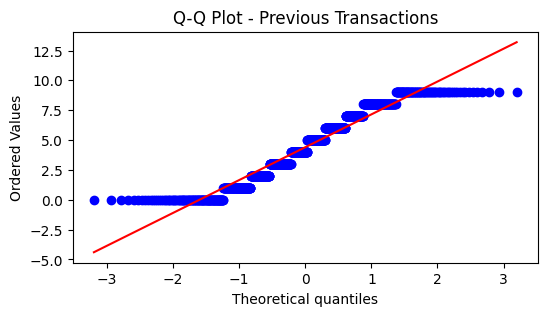

Skewness: 0.026321773857642183


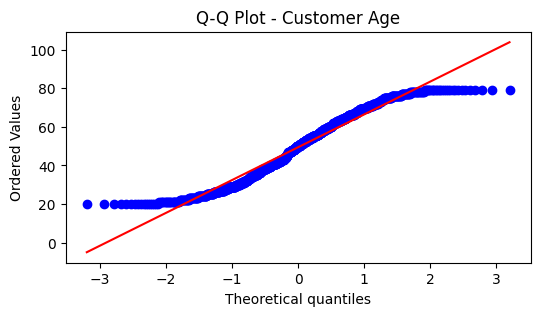

Skewness: 0.01698181416579776


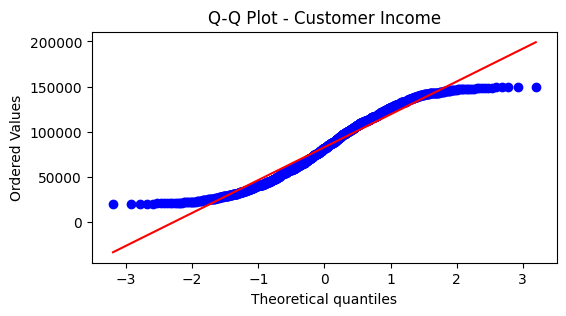

Skewness: 0.0738174967421649


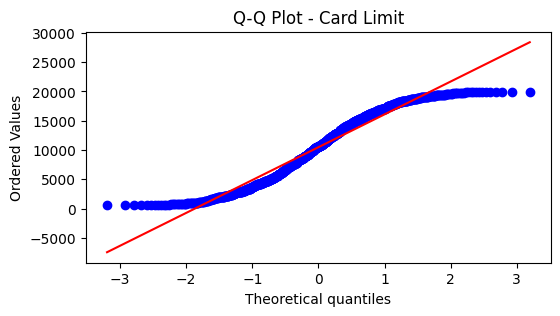

Skewness: -0.05058948966944294


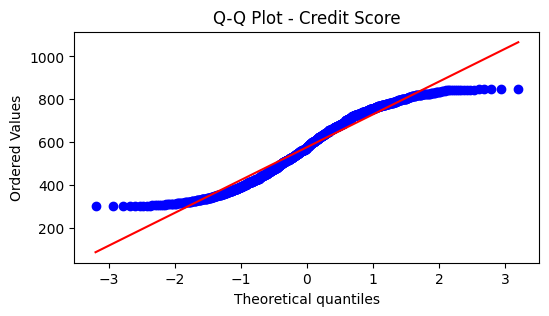

Skewness: -0.04071438562859312


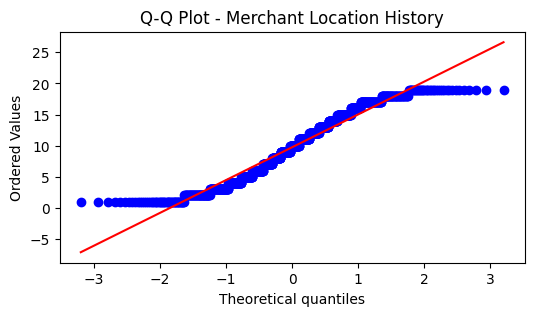

Skewness: 0.042327976592537585


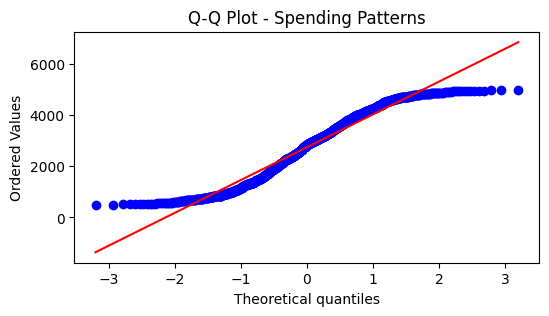

Skewness: -0.031155329001456126


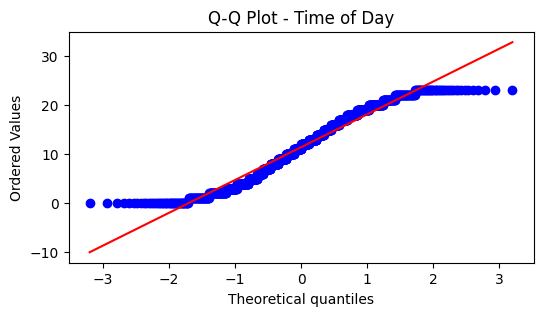

Skewness: -0.00821664809001059


In [ ]:
## Data is tested for the presence of skewness
for col in cols:
  plt.figure(figsize=(6, 3))
  stats.probplot(credit_card[col], dist="norm", plot=plt)
  plt.title('Q-Q Plot - {}'.format(col))
  plt.show()
  skewness = stats.skew(credit_card[col])  # Drop NaN values if any
  print(f'Skewness: {skewness}')


The presence of skewness in the input variables affects the model. So the presence of skewness is detected using QQ Plot and skew function of stats library. Both the plot and values shows that the variables does have very mild skewness.

#**Feature Engineering**

It is essential that proper and useful features are fed to the model. So 3 feature engineering steps are done to select the most useful features
*   Categorical Variables Encoding
*   Feature Creation
*   Feature Subset selection





##Encoding of Categorical variables

1.   Ordinal Variables are encoded using label encoding as ordinal variables have an inherent order and that order is preserved by converting to numerical variables using label encoding.
2.  Nominal variables are encoded using one hot encodng as there is no order present in them and the values are distinct where only presence matters. So each distinct value is created as a binary variable to indicate the presence of value

  

In [ ]:
##Label Encoding - Ordinal variables - preserving the order
custom_mapping1 = {'Bad': 0, 'Average': 1, 'Good': 2}
custom_mapping2 = {'Low': 0, 'Medium': 1, 'High': 2}
credit_card['merchant_reputation_encoded']=credit_card['Merchant Reputation'].map(custom_mapping1)
credit_card['OT_Frequency_encoded']=credit_card['Online Transactions Frequency'].map(custom_mapping2)
#Removng the original categorical vars
credit_card.drop(columns=['Online Transactions Frequency','Merchant Reputation'],inplace=True)

In [ ]:
## One hot Encoding of Nominal Variables - creating dummy variables for each possible value
categorical_df=pd.get_dummies(credit_card,columns=['Card Type','Location','Device','MCC Category'])

In [ ]:
#Converting boolean vars to  binary variables
card_cols=[col for col in categorical_df.columns if col.startswith('Card Type')]
device_cols=[col for col in categorical_df.columns if col.startswith('Device')]
mcc_cols=[col for col in categorical_df.columns if col.startswith('MCC Category')]
location_cols=[col for col in categorical_df.columns if col.startswith('Location')]
categorical_df[card_cols]=categorical_df[card_cols].astype(int)
categorical_df[device_cols]=categorical_df[device_cols].astype(int)
categorical_df[mcc_cols]=categorical_df[mcc_cols].astype(int)
categorical_df[location_cols]=categorical_df[location_cols].astype(int)

##Feature Creation

Some variables when interacting with other variables may have more predictive power than the raw variables. So feature interactions on possible variables are done to create new variables.

In [ ]:
## Deriving Time related variables as aggregating data at higher level may give more useful
categorical_df['Date']=pd.to_datetime(categorical_df['Date'])
categorical_df['Month']=categorical_df['Date'].dt.month
categorical_df['Day']=categorical_df['Date'].dt.day
categorical_df['Quarter']=categorical_df['Date'].dt.quarter

## Deriving domain related variables.
categorical_df['risk_score'] = (1 / categorical_df['Credit Score']) * (categorical_df['Amount'] / categorical_df['Card Limit'])
categorical_df['balance_income_ratio'] = categorical_df['Balance Before Transaction'] / categorical_df['Customer Income']

## Deriving the customer behaviour based variables
categorical_df['spending_pattern_score'] = categorical_df['Spending Patterns'] * categorical_df['Previous Transactions'] * categorical_df['Merchant Location History']
categorical_df['time_based_interaction'] = categorical_df['Time of Day'] * categorical_df['Day'] * categorical_df['Month'] * categorical_df['Quarter']

## Deriving Risk related variables for each transaction
categorical_df['risk_adjusted_limit'] = categorical_df['Card Limit'] / categorical_df['risk_score']
categorical_df['credit_merchant_risk'] = categorical_df['Credit Score'] * categorical_df['merchant_reputation_encoded']
categorical_df['geo_spending_profile'] = categorical_df[['Location_Germany', 'Location_France', 'Location_UK',
                                  'Location_Canada', 'Location_US']].sum(axis=1) * categorical_df['Spending Patterns'] * categorical_df[['Device_Desktop', 'Device_POS', 'Device_Mobile']].sum(axis=1)



##Feature Subset Selection

Not all variables in the model will be useful in classifying the fraudulent transaction. So subset of features are selected using their correlation with the dependent variable

### Using Correlation

In [ ]:
# Calculate correlation with the target and sort them in the descending order
correlation = categorical_df.corrwith(credit_card['Is Fraudulent']).abs()
feature_importance = correlation.sort_values(ascending=False)
print(feature_importance)

Is Fraudulent                  1.000000
Location_Germany               0.069065
Location_France                0.064545
MCC Category_Healthcare        0.061468
MCC Category_Clothing          0.052695
Location_UK                    0.035462
Previous Transactions          0.034964
Merchant Location History      0.029830
Credit Score                   0.029373
balance_income_ratio           0.028630
Location_Canada                0.026141
Balance Before Transaction     0.025076
geo_spending_profile           0.024766
Spending Patterns              0.024766
credit_merchant_risk           0.024541
merchant_reputation_encoded    0.024122
Card Limit                     0.022873
OT_Frequency_encoded           0.022657
MCC Category_Travel            0.021569
Card Type_Credit               0.021398
Customer Income                0.019926
time_based_interaction         0.019484
Device_Desktop                 0.018145
Day                            0.017909
Card Type_Prepaid              0.017770


Location_Germany which is the encoded variable from Location has high correlation with the DV is Fraudulent. and Amount involved in the transaction has less correlation with the DV Is Fraudulent

In [ ]:
column_list=list(feature_importance.index)
column_list.remove('Date')
column_list.remove('Amount')
column_list.remove('Quarter')
column_list.remove('Is Fraudulent')
column_list

['Location_Germany',
 'Location_France',
 'MCC Category_Healthcare',
 'MCC Category_Clothing',
 'Location_UK',
 'Previous Transactions',
 'Merchant Location History',
 'Credit Score',
 'balance_income_ratio',
 'Location_Canada',
 'Balance Before Transaction',
 'geo_spending_profile',
 'Spending Patterns',
 'credit_merchant_risk',
 'merchant_reputation_encoded',
 'Card Limit',
 'OT_Frequency_encoded',
 'MCC Category_Travel',
 'Card Type_Credit',
 'Customer Income',
 'time_based_interaction',
 'Device_Desktop',
 'Day',
 'Card Type_Prepaid',
 'Customer Age',
 'Time of Day',
 'spending_pattern_score',
 'risk_adjusted_limit',
 'Month',
 'MCC Category_Groceries',
 'Velocity',
 'Location_US',
 'Device_POS',
 'MCC Category_Electronics',
 'risk_score',
 'MCC Category_Restaurants',
 'Device_Mobile',
 'MCC Category_Entertainment',
 'Card Type_Debit']

Date variable has no predictive power with the Dv as we have created other aggregated variables to capture the timing.Is Fraudulent is the target variable and the Day and Amount are the variables with very less correlation ie below 0.02%. So except these 4 variables, the remaining subset of features are selected

##Variable Elimination

As we have many new variables created from feature crossing, it is essential that we remove the variables that has multicollinearity

In [ ]:
# Calculate the correlation matrix
correlation_matrix = categorical_df[column_list].corr()

# Select only the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
# Find the features that have a very strong inter correlation i.e greater than 0.6(above 70% is considered as strong correlation)
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.6)]
print(high_correlation_features)


['Balance Before Transaction', 'Spending Patterns', 'merchant_reputation_encoded']


<Axes: >

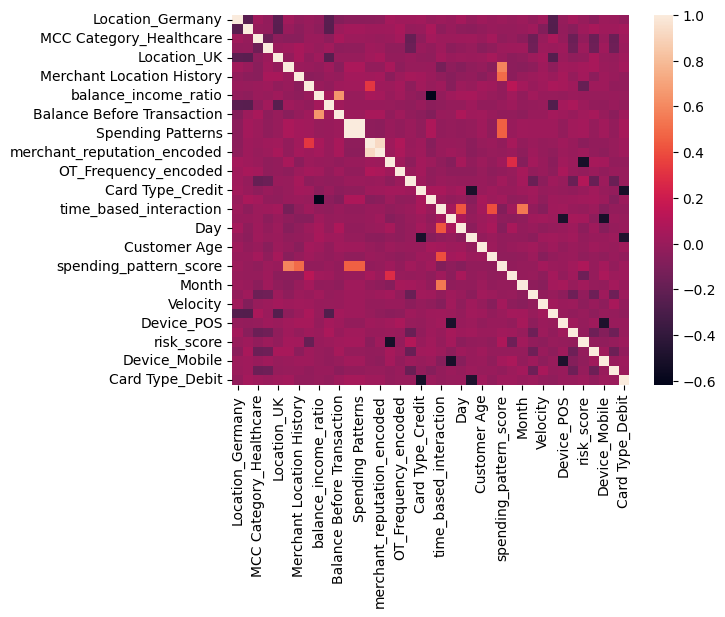

In [ ]:
sns.heatmap(data = categorical_df[column_list].corr())

In [ ]:
column_list2=column_list.copy()
column_list2.remove('Balance Before Transaction')
column_list2.remove('Spending Patterns')
column_list2.remove('merchant_reputation_encoded')

As Balance Before Transaction, Month, Spending Patterns and Merchant Reputation have high inter correlation so these variables are removed from the candidate IV list

### Feature importance Using Random Forest Classifier

In [ ]:
X=categorical_df[column_list]
Y=categorical_df['Is Fraudulent']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( random_state=45)
model.fit(X, Y)

# Get feature importance
importances = model.feature_importances_
importances_percent = 100 * importances

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances,
    'Importance (%)': importances_percent
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

                        Feature  Importance  Importance (%)
15                   Card Limit    0.067836        6.783627
7                  Credit Score    0.058651        5.865065
10   Balance Before Transaction    0.056729        5.672880
8          balance_income_ratio    0.054111        5.411148
19              Customer Income    0.050586        5.058624
26       spending_pattern_score    0.050239        5.023857
34                   risk_score    0.050031        5.003140
27          risk_adjusted_limit    0.048271        4.827127
11         geo_spending_profile    0.048260        4.825961
30                     Velocity    0.047984        4.798414
20       time_based_interaction    0.045693        4.569340
12            Spending Patterns    0.045644        4.564355
13         credit_merchant_risk    0.040968        4.096791
24                 Customer Age    0.036812        3.681176
22                          Day    0.035707        3.570676
28                        Month    0.034

Card Limit and Credit Score are the top most important features holding more than 10% of total feature importance and Location_UK, MCC_Category_Clothing are the least important features holding less than 0.5% feature importance

# **Train Test split : 80-20**

In [ ]:
#Column list after removing the inter correlated variables are used
X=categorical_df[column_list2]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 80% for training and 20% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

Data Standardization

In [ ]:
## Normalizing the data using z score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

For the algorithms to converge faster feature scaling is done by z score normalization.
Data Standardization is done after train and test split to avoid data leakage during training.

##**Logistic** **Regression**

###Default Parameters

In [ ]:
#Defining Logistic regression function with default parameters from sklearn module
model=LogisticRegression(random_state=45)

In [ ]:
#Fit the model using standardized training data
model.fit(X_train_scaled, y_train)
#Predictions are made using built model on train and test data
y_pred_train=model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
##As it is a classification model - Accuracy, Precision,Recall and F1 score is calculated
## Classification report function of sklearn module is used to print the evaluation metrics
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       758
           1       0.00      0.00      0.00        42

    accuracy                           0.95       800
   macro avg       0.47      0.50      0.49       800
weighted avg       0.90      0.95      0.92       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



In [ ]:
## As it is a class imbalance problem, the most appropriate metric to tune is f1 score which balances both precision and recall.
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


Classification report for train and test data shows that the model classifies all transactions as non fraudulent transactions and the model is not able to classify fraudulent transactions as the train and test f1 score is 0.

###Hyperparameter Tuning

Hyperparameters Tuned for Logistic Regression -
*   C - regulaization constant
*   penalty - regularization type (l1,l2,elasticnet)
*   Solver - type of optimization algorithm
*   Class Weight- adding weight to the minority sample






In [ ]:
## Creating the parameter space
##Creating 3 different parameter space as some of the solvers are not consistent with some of the regularization techniques
param_grid_liblinear_saga = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l1','l2'],
    'logisticregression__solver': ['liblinear', 'saga'],  # 'l1' and 'l2' penalty supports 'liblinear' and 'saga'
    # 'logisticregression__max_iter': [100, 200, 300],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_lbfgs_newton_cg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l2',None],
    'logisticregression__solver': ['lbfgs', 'newton-cg','newton-cholesky','sag'],  # 'l2' penalty supports 'lbfgs' and 'newton-cg'
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_elasticnet = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1,10,100],
    'logisticregression__l1_ratio': [0.01, 0.1, 0.5,0.05,0.9,0.09],
    'logisticregression__penalty': ['elasticnet'],
    'logisticregression__solver': ['saga'],  # elasticnet supports only saga solver
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

# Create a pipeline with standardization and logistic regression
# For Logistic regression max iteration is set to 1000 to balance the accuracy and convergence time and random state as 45 to get consisten results
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=1000,random_state=45))
])

#Using Stratified K fold cross validation as the dataset has a huge imbalance in target variable
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV to explore the hyperparameter combinations
# 3 Grid Search is initialized for each of the parameter space
grid_search_liblinear_saga = GridSearchCV(estimator=pipeline,param_grid=param_grid_liblinear_saga,cv=skf,n_jobs=-1,scoring='f1')
grid_search_lbfgs_newton_cg = GridSearchCV(estimator=pipeline,param_grid=param_grid_lbfgs_newton_cg,cv=skf,n_jobs=-1,scoring='f1')
grid_search_elasticnet = GridSearchCV(estimator=pipeline,param_grid=param_grid_elasticnet,cv=skf,n_jobs=-1,scoring='f1')

# Fit the model using GridSearchCV to find the best hyperparameter combination
grid_search_liblinear_saga.fit(X_train, y_train)
grid_search_lbfgs_newton_cg.fit(X_train, y_train)
grid_search_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__l1_ratio': [0.01, 0.1, 0.5, 0.05,
                                                          0.9, 0.09],
                         'logisticregression__penalty': ['elasticnet'],
                         'logisticregression__solver': ['saga']},
             scoring='f1')

In [ ]:
#The best parameter combination obtained from grid search 1 is evaluated using f1 score
best_model = grid_search_liblinear_saga.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0997624703087886
Test F1 Score: 0.1042654028436019


In [ ]:
#Best parameter combination from Grid search 1
grid_search_liblinear_saga.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

In [ ]:
#The best parameter combination obtained from grid search 2 is evaluated using f1 score
best_model = grid_search_lbfgs_newton_cg.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0759493670886076
Test F1 Score: 0.043478260869565216


In [ ]:
#Best parameter combination from Grid Seach 2
grid_search_lbfgs_newton_cg.best_params_

{'logisticregression__C': 10,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'sag'}

In [ ]:
#The best parameter combination obtained from grid search 3 is evaluated using f1 score
best_model = grid_search_elasticnet.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0997624703087886
Test F1 Score: 0.1042654028436019


In [ ]:
#Best parameter combination from Grid Search 3
grid_search_elasticnet.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__l1_ratio': 0.1,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__solver': 'saga'}

As we have intialized 3 different parameter space for each of the solvers the final best parameter combination is chosen among the 3 grid search using f1 score as the dataset has a huge imbalance. The first and third parameter combination has less bias and less variance than 2nd hyperparameter combination

In [ ]:
##Choose one with the best results from the above three combinations to print the classification report
#For example here grid_search_elasticnet performed better than others
best_model = grid_search_liblinear_saga.best_estimator_

In [ ]:
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred_test = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

In [ ]:
##Calculating the Classification Report of the best parameter combination
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       758
           1       0.05      1.00      0.10        42

    accuracy                           0.05       800
   macro avg       0.03      0.50      0.05       800
weighted avg       0.00      0.05      0.01       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       189
           1       0.06      1.00      0.10        11

    accuracy                           0.06       200
   macro avg       0.03      0.50      0.05       200
weighted avg       0.00      0.06      0.01       200



Evaluation results shows that the model has predicted everything as fraudulent class as with respect to fraudulent class the recall value is 1 but with respect to non-fraudulent class the recall is 0 for both training and test data.
The model has a high bias and less variance between the training and test data as the f1 score for both train and test data is around 0.10.

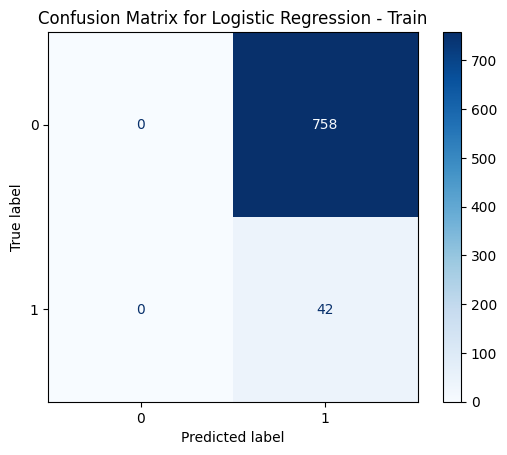

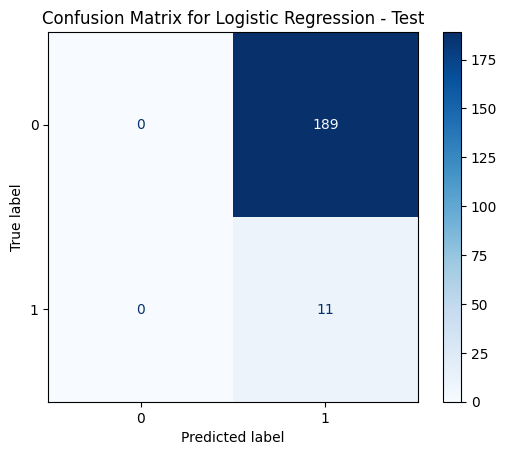

In [ ]:
#Printing the confusion matrix for both training and test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Train')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Test')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.06
Recall (TPR): 1.00
F1 Score: 0.10
Accuracy: 0.06
True Positive Rate (TPR): 1.00
False Positive Rate (FPR): 1.00
False Negative Rate (FNR): 0.00
True Negative Rate (TNR): 0.00


AUC-ROC: 0.5


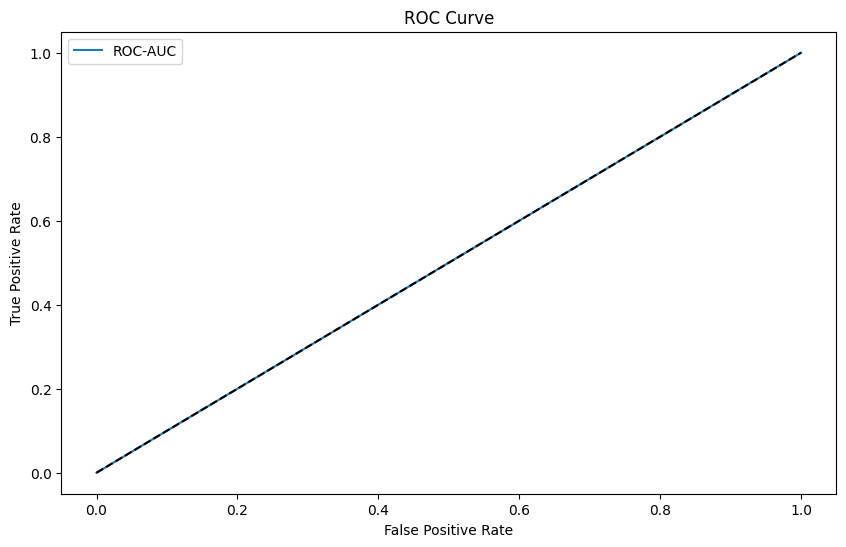

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is not able to classify **any** of the **non fraudulent** transactions correctly but able to classify **all** of the **fraudulent** transactions correctly from the test data
*   Eventhough the Recall is high i.e **100%** but the classifier is not able to classify non fraudulent transactions as the false positive rate is **100%**
*   ROC Curve shows the ratio of true positive rate and false
positive rate. AUC of ROC curve of 0.5 shows that model is merely guessing. It is not able to classify the non fraudulent transactions and guessing all transactions as fraudulent transactions

**Comparison of Model Before and After Tuning in Test Data:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 100% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e not able to classify any non fraud transaction
* The **test F1 score** has been **improved** from **0%** to **10%** when using the tuned hyperparameters

##**K Nearest Neighbour**

###Default Parameters

In [ ]:
##Initializing K Nearest Neighbors Classifier of scikit learn
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [ ]:
##Fit the model with the scaled data as K Nearest Neighbors is a distance based classifier
knn_clf.fit(X_train_scaled, y_train)
y_pred_train=knn_clf.predict(X_train_scaled)
y_pred_test = knn_clf.predict(X_test_scaled)

In [ ]:
#Show the classification report of training and test data
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       758
           1       1.00      0.02      0.05        42

    accuracy                           0.95       800
   macro avg       0.97      0.51      0.51       800
weighted avg       0.95      0.95      0.92       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.89      0.94      0.92       200



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.046511627906976744
0.0


Evaluation metrics on train and test data shows that model is able to classify non fraudulent transactions effectively in train data and test data but unable to classify the fraudulent transactions

###Hyperparameter Tuning
*   N Neignbors - Number of neighbours to be considered while classifying
*   P - Type of norm used in calculating distance. If 1 then manhattan norm 2 - euclidean norm and so on
*   Weights - Type of method used to assign weights to data points (Uniform - all data points have uniform weights, distance - assign weight based on distance)
*   Algorithm - Underlying method used to compute the nearest neighbors

  The metric is chosen as minkowski whereas p is adjusted as 1,2 and so on to specify the norm





In [ ]:
#Creating the parameter space for K Nearest Neighbors
param_grid= {
    'knn__n_neighbors': [3, 5, 7, 10, 15],
    'knn__p': [1,2,3,4],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a pipeline with standardization and K Nearest neighbor Classifier
pipeline = Pipeline([
     ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric='minkowski'))
])
#Intializing Stratified K fold cross validation with folds=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV
grid_search_knn = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [3, 5, 7, 10, 15],
                         'knn__p': [1, 2, 3, 4],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
#best parameter combination from the grid search
grid_search_knn.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 3,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [ ]:
#F1 score for both train and test data
best_model = grid_search_knn.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.13333333333333333
Test F1 Score: 0.0


In [ ]:
#Show the classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       758
           1       1.00      0.07      0.13        42

    accuracy                           0.95       800
   macro avg       0.98      0.54      0.55       800
weighted avg       0.95      0.95      0.93       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.49      0.48       200
weighted avg       0.89      0.94      0.91       200



The above best hyperparameter combination of KNN model is able to classify non fraudulent transactions in both train and test data but is unable to classify fraudulent transactions in test data and only 7% in train data. Thus the model has high bias  

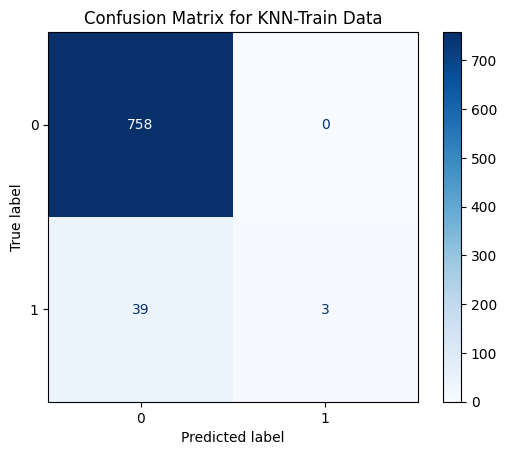

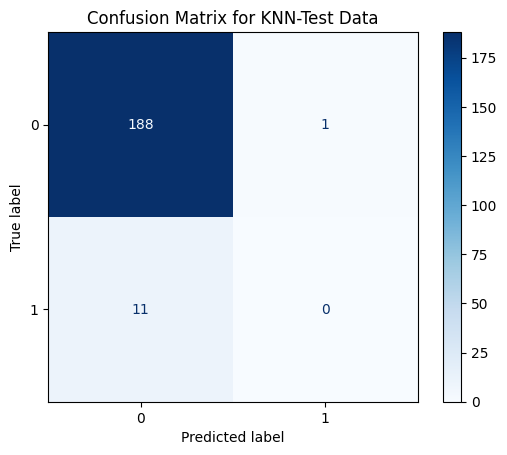

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.94
Misclassification Rate: 0.06
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.99


AUC-ROC: 0.5052910052910053


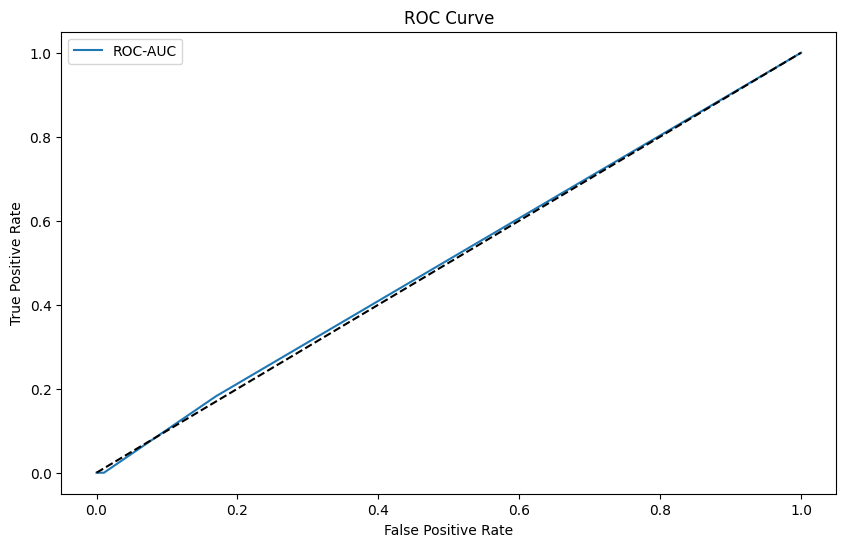

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **99%** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **94%** and **6%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%
*  The AUC of ROC curve arounf 0.5 shows that the model is
guessing every transaction as non fraudulent transaction
as the curver is along the diagonal line





**Comparison of Model Before and After Tuningin TestData:**
*  The model was not able to identify any fraudulent transactions using default parameters and after as well
* The **test F1 score** has not been **improved**  when using the tuned hyperparameters

##**Naive Bayes Classifier**

Guassian Naive Bayes classifier is used as the dataset has a mix of categorical and continous variables.

###Default Parameters

In [ ]:
#GaussianNB is initialized from sklearn library
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()

In [ ]:
#Train the model using Gaussian NB Classifier
#Scaling is not required as it is a probabilistic generative classifier
nb_clf.fit(X_train, y_train)
y_pred_train=nb_clf.predict(X_train)
y_pred_test = nb_clf.predict(X_test)

In [ ]:
#Print the Classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       758
           1       0.00      0.00      0.00        42

    accuracy                           0.95       800
   macro avg       0.47      0.50      0.49       800
weighted avg       0.90      0.95      0.92       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200

0.0
0.0


Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0 in both train data and test data as in both cases the model classifies all transactions as non fraudulent transactions

###Hyperparameter Tuning
*  Variable Smoothing - Adding numerical stability

    Another hyperparameter technique is to convert the categorical variables to continous features and that is done in the feature engineering section




In [ ]:
#Creating the parameter space
param_grid= {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a pipeline with Naive Bayes Classifier
#Naive Bayes works on probability so standardization is not required
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
#Initialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1
grid_search_nb = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('nb', GaussianNB())]), n_jobs=-1,
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                               1e-05]},
             scoring='f1')

In [ ]:
#Best parameter combination
grid_search_nb.best_params_

{'nb__var_smoothing': 1e-09}

In [ ]:
#Evaluating the bet parameter combination
best_model = grid_search_nb.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0
Test F1 Score: 0.0


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       758
           1       0.00      0.00      0.00        42

    accuracy                           0.95       800
   macro avg       0.47      0.50      0.49       800
weighted avg       0.90      0.95      0.92       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



*   Evaluation report shows that Naive bayes is **underfitting** as for both train and test data as the model is not able to classify positive class correctly
*   The model is not able to classify **any** of the **fraudulent** transactions as the test f1 score and train f1 score is 0
*   Thus the model has **high** **bias**

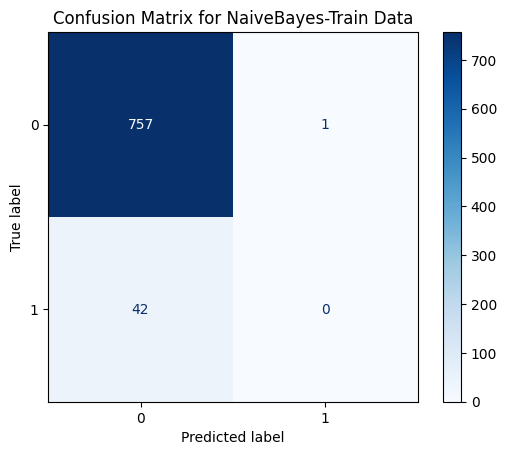

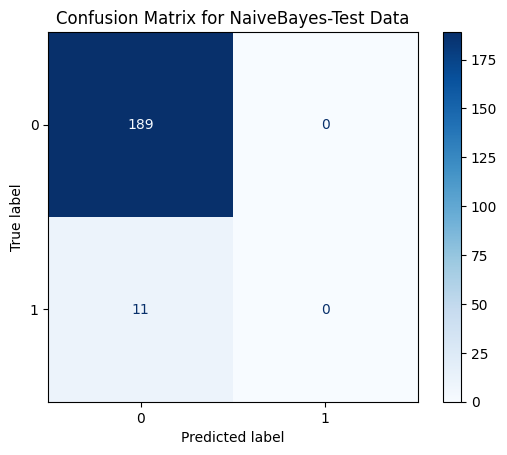

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.94
Misclassification Rate: 0.06
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 1.00


AUC-ROC: 0.37421837421837423


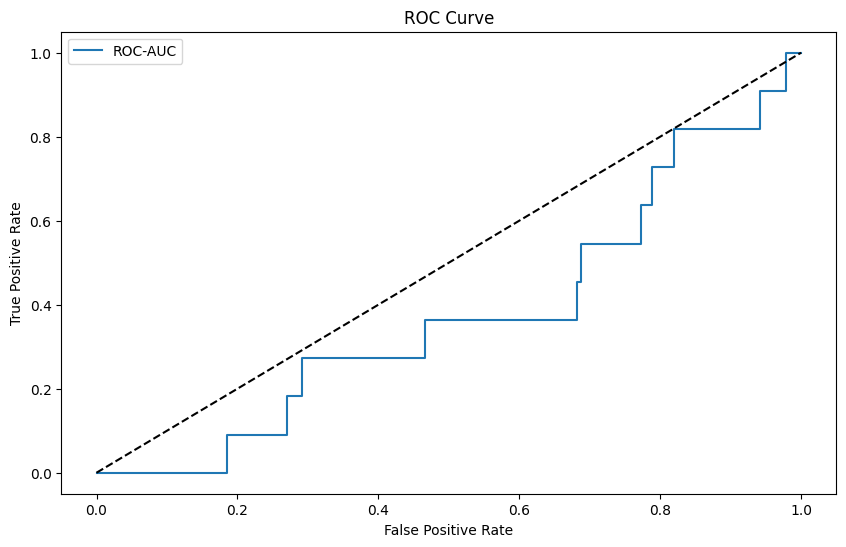

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **all** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **94%** and **6%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%. Thus the model is predicting  every transaction as non fraud transaction.
*  AUC of ROC curve shows the model is predicting poorly as the model is predicting opposite to the true label.


**Comparison of Model Before and After Tuning in TestData:**
*  The model was not able to identify fraudulent transactions using default parameters and after tuning as well.
* The **F1 score** has not been **improved** when using the tuned hyperparameters

##**Ada Boost Classifier - Logistic Regression as Base Estimator**

###Default Parameters

AdaBoost Classifier is tried with Logistic Regression as base estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=42)

In [ ]:
ada_clf.fit(X_train_scaled, y_train)
y_pred_train=ada_clf.predict(X_train_scaled)
y_pred_test = ada_clf.predict(X_test_scaled)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       758
           1       0.00      0.00      0.00        42

    accuracy                           0.95       800
   macro avg       0.47      0.50      0.49       800
weighted avg       0.90      0.95      0.92       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0 in train data and test data as in both train and test data the model classifies all transactions as non fraudulent transactions

###Hyperparameter Tuning
*   N_estimators - Number of boosting rounds
*   Learning rate -Importance/Contribution of each base learner
*  C - Learning rate of base estimator i.e logistic regression
*  Penalty - Type of regularization
*  Class weight -Assigning weight to minority samples for base estimator







In [ ]:
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
    'ada__base_estimator__C': [1.0,0,0.01,0.1,0.001],
    'ada__base_estimator__penalty': ['l2','l1','elasticnet'],
    'ada__base_estimator__class_weight':[None,'balanced']
}


# Create a pipeline with standardization and AdaBoost Classifier
pipeline = Pipeline([
       ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),random_state=45))

])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_ada_v1 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__C': [1.0, 0, 0.01, 0.1, 0.001],
                         'ada__base_estimator__class_weight': [None,
                                                               'balanced'],
                         'ada__base_estimator__penalty': ['l2', 'l1',
                                                          'elasticnet'],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
grid_search_ada_v1.best_params_

{'ada__base_estimator__C': 0.01,
 'ada__base_estimator__class_weight': 'balanced',
 'ada__base_estimator__penalty': 'l2',
 'ada__learning_rate': 0.1,
 'ada__n_estimators': 200}

In [ ]:
best_model = grid_search_ada_v1.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.10759493670886076
Test F1 Score: 0.11494252873563218


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.96      0.27      0.42       758
           1       0.06      0.81      0.11        42

    accuracy                           0.29       800
   macro avg       0.51      0.54      0.26       800
weighted avg       0.91      0.29      0.40       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.97      0.19      0.32       189
           1       0.06      0.91      0.11        11

    accuracy                           0.23       200
   macro avg       0.52      0.55      0.22       200
weighted avg       0.92      0.23      0.31       200



*   Evaluation report shows that ada boost is **underfitting** as for both train and test data the model classifies only 27% and 19% of non fraud transactions correctly
*   The model is able to classify **91%** of the **fraudulent** transactions in test and 81% in train as the recall for both train and test data is high
*   Thus the model has **high** **bias** and **less variance**


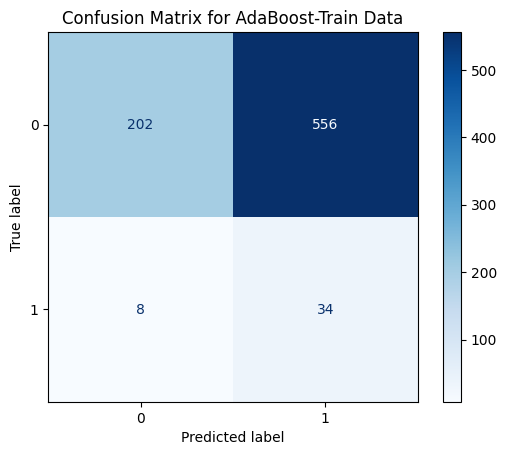

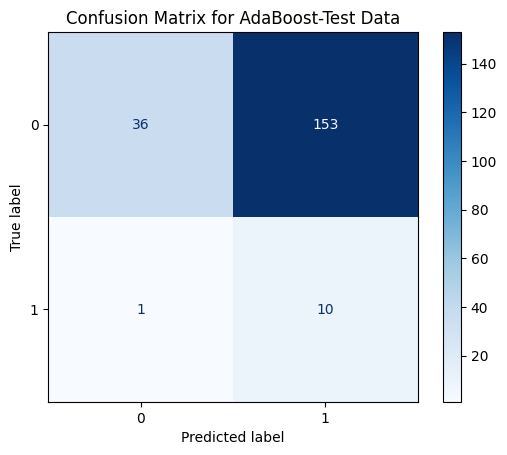

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.06
Recall (TPR): 0.91
F1 Score: 0.11
Accuracy: 0.23
Misclassification Rate: 0.77
True Positive Rate (TPR): 0.91
False Positive Rate (FPR): 0.81
False Negative Rate (FNR): 0.09
True Negative Rate (TNR): 0.19


AUC-ROC: 0.5541125541125541


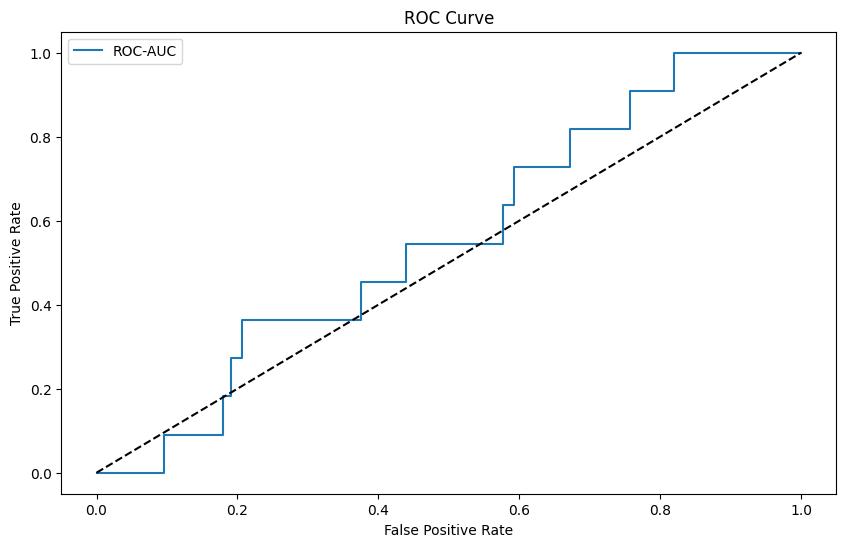

In [ ]:
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **91%** of the **fraudulent** transactions correctly but able to classify only **19%** of the **non  fraudulent** transactions correctly from the test data
*   Eventhough the Recall is high i.e **91%** but the classifier is not able to maximise the classification of non fraudulent transactions as the false positive rate is around **81%**
*  AUC of ROC curve shows the model is able to **differentiate** the fraudulent and non fraudulent transactions **very** **less** but the model is not randomly guessing as  the curve shows it is **not** a **diagonal** line. The model performs **better** when **FPR** is above **0.2** as the model predicts exactly opposite of the true class when FPR is below 0.2




**Comparison of Model Before and After Tuning in Test Data:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 91% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e only 19%
* The **F1 score** has been **improved** from **0%** to **11%** when using the tuned hyperparameters

##**Tree Based Models**

In [ ]:
#Using the column list before removing features with inter correlation as tree based models are not affected by the intercorrelation
X=categorical_df[column_list]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 80% for training and 20% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

## **Decision Tree Classifier**


###Default Parameters

In [ ]:
##Initializing the Decision Tree Classifier of sklearn library
model=DecisionTreeClassifier(random_state=45)
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00        42

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       189
           1       0.00      0.00      0.00        11

    accuracy                           0.90       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.89      0.90      0.90       200



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.0


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies all transactions as non fraudulent transactions

###Hyperparamter Tuning
*   Criterion - Criteria for measuring the quality of split (entropy or gini)
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a internal node
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Class weight - Assigning weight to minority samples(passed as dictionary mentioning the weight of each class)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
#Creating the parameter space

param_grid= {
    'classifier__criterion': ['gini', 'entropy'],          # Criterion for measuring quality of splits
    'classifier__max_depth': [5, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10,15],            # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4,5],              # Minimum number of samples required to be at a leaf node
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]#Class weight can be passed as dictionary mentioning the weight of each class
}


# Create a pipeline with Decision Tree Classifier
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=45))
])
#Intialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV and the metric to be tuned=f1
grid_search_dt = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=45))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, {0: 1, 1: 50},
                                                      'balanced',
                                                      {0: 1, 1: 100},
                                                      {0: 1, 1: 1000}],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 10, 20, 30, 40, 50],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 5],
                         'classifier__min_samples_split': [2, 5, 10, 15]},
             scoring='f1')

In [ ]:
from sklearn.metrics import f1_score
best_model = grid_search_dt.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.34854771784232363
Test F1 Score: 0.22950819672131148


In [ ]:
grid_search_dt.best_params_

{'classifier__class_weight': {0: 1, 1: 1000},
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 20,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2}

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       758
           1       0.21      1.00      0.35        42

    accuracy                           0.80       800
   macro avg       0.61      0.90      0.62       800
weighted avg       0.96      0.80      0.86       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       189
           1       0.14      0.64      0.23        11

    accuracy                           0.77       200
   macro avg       0.56      0.70      0.55       200
weighted avg       0.93      0.77      0.83       200



*   Evaluation report shows that decision tree is able to classify both able to classify fraud and non fraud transactions effectively than other models
*   The model is able to classify **77%** of the **non fraudulent** transactions in test data and **79%** in training data and both train and test f1 score is high compared to other algorithms
*   The model is able to classify **64%** of the **fraudulent** transactions in test data and **all** transactions in training data as both train and test f1 recall is high compared to other models
*   Thus the model has **less** **bias** and **less** **variance** than other models






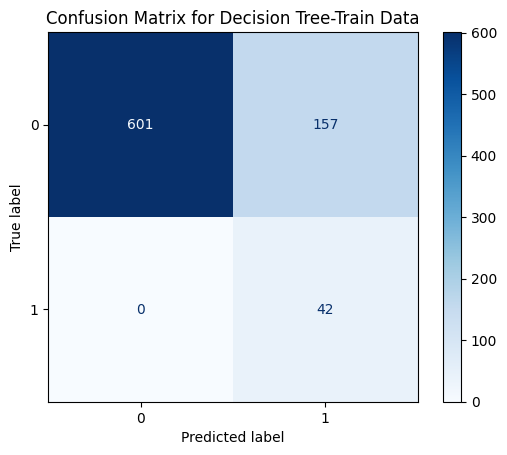

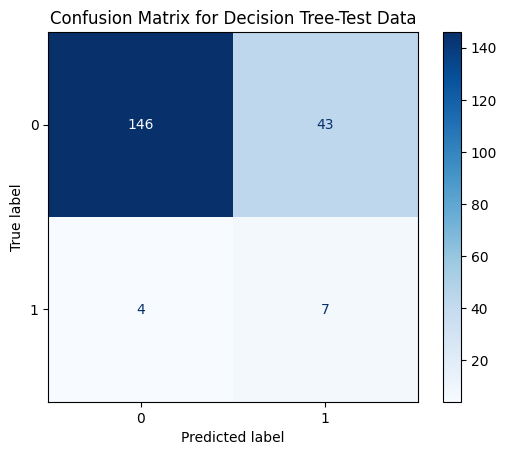

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.14
Recall (TPR): 0.64
F1 Score: 0.23
Accuracy: 0.77
Misclassification Rate: 0.23
True Positive Rate (TPR): 0.64
False Positive Rate (FPR): 0.23
False Negative Rate (FNR): 0.36
True Negative Rate (TNR): 0.77


AUC-ROC: 0.6960076960076961


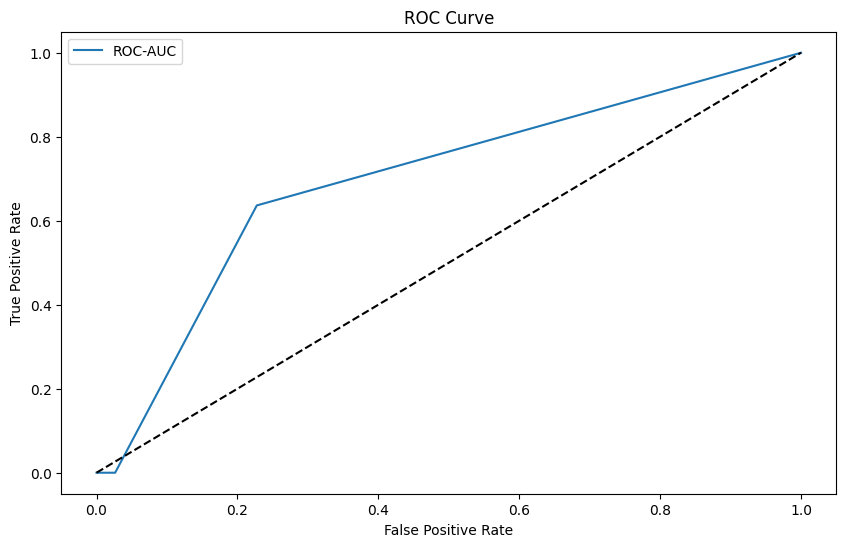

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **77%** of the **non fraudulent** transactions correctly and able to classify **64%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is low and misclassification rate is high i.e **77%** and **23%** but the classifier is able to maximise the classification of both fraudulent and non fraudulent transactions as the false negative rate is around **36%** and the false positive rate is only **23%**
*  AUC of ROC curve shows the model is able to effectvely **differentiate** the fraudulent and non fraudulent transactions and the model is not randomly guessing. The model performs **better** when **FPR** is above **0.2** as the **TPR** is around **0.6**






**Comparison of Model Before and After Tuning In Test Data:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 64% of the the fraud transactions
* The **F1 score** has been **improved** from **0%** to **23%** when using the tuned hyperparameters



## **Random Forest Classifier**

###Default Parameters

In [ ]:
#Initializing random Forest classifier of sklearn
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=45)

In [ ]:
rf_clf.fit(X_train, y_train)
y_pred_train=rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00        42

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.89      0.94      0.92       200



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.0


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies all transactions as non fraudulent transactions

###Hyperparameter Tuning
*   N_Estimators- Number of decision trees to be built
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a split
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Bootstrap - Sampling with/without replacement while creating subset of data for each base tree
*   Class weight - assigning weight to minority samples









In [ ]:
#Setting the parameter space for hyperparameter tuning
#RandomizedSearchCV is used as the number of hyperparameter combinations is very high so the model takes more time when using GridSearch
#Trying a subset of hyperparameter combinations using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid= {
    'rf__n_estimators': [50,100,200],
    'rf__max_depth': [5,10, 15,20],
    'rf__min_samples_split': [2,5,8,10,11],
    'rf__min_samples_leaf':[1,2,3,4,5],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__bootstrap': [True, False],
    'rf__class_weight':[None,'balanced',{0:1,1:100},{0:1,1:1000}]
}

# Create a pipeline with Random Forest Classifier
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=45))
])
#Initialize Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV with metric to be tuned as f1
grid_search_rf = RandomizedSearchCV(estimator=pipeline,param_distributions=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('rf',
                                              RandomForestClassifier(random_state=45))]),
                   n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__class_weight': [None, 'balanced',
                                                             {0: 1, 1: 100},
                                                             {0: 1, 1: 1000}],
                                        'rf__max_depth': [5, 10, 15, 20],
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'rf__min_samples_split': [2, 5, 8, 10,
                                                                  11],
                                        'rf__n_estimators': [50, 100, 200]},
                   scoring='f1')

In [ ]:
#Best parameter combination
grid_search_rf.best_params_

{'rf__n_estimators': 50,
 'rf__min_samples_split': 10,
 'rf__min_samples_leaf': 2,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 5,
 'rf__class_weight': {0: 1, 1: 1000},
 'rf__bootstrap': False}

In [ ]:
#Evaluating the best parameter combination
best_model = grid_search_rf.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.1222707423580786
Test F1 Score: 0.09782608695652173


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      0.20      0.34       758
           1       0.07      1.00      0.12        42

    accuracy                           0.25       800
   macro avg       0.53      0.60      0.23       800
weighted avg       0.95      0.25      0.33       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.93      0.13      0.23       189
           1       0.05      0.82      0.10        11

    accuracy                           0.17       200
   macro avg       0.49      0.48      0.16       200
weighted avg       0.88      0.17      0.22       200



*   Evaluation report shows that random forest is **underfitting** as for both train and test data the model is not able to classify non fraudulent transactions effectively
*   The model is able to classify only **13%** of the **non fraudulent** transactions in test data and **20%** in training data and both train and test f1 score is low
*   The model is able to classify **82%** of the **fraudulent** transactions in test data and **all** transactions in training data as both train and test f1 recall is high
*   Thus the model has **high** **bias** and **less** **variance**






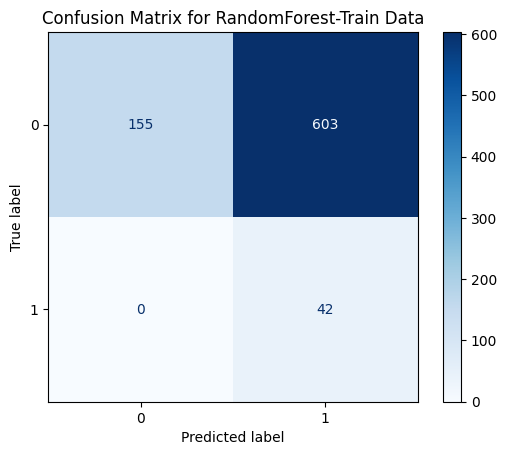

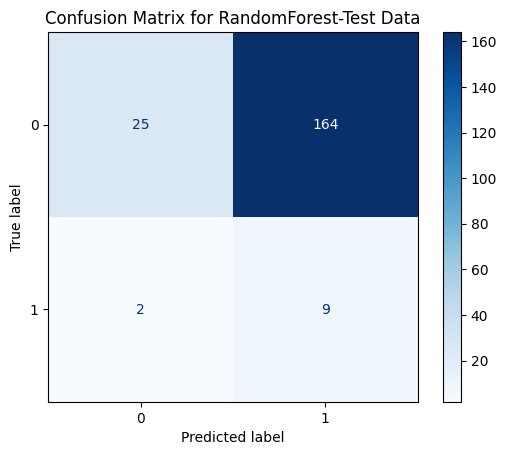

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.05
Recall (TPR): 0.82
F1 Score: 0.10
Accuracy: 0.17
Misclassification Rate: 0.83
True Positive Rate (TPR): 0.82
False Positive Rate (FPR): 0.87
False Negative Rate (FNR): 0.18
True Negative Rate (TNR): 0.13


AUC-ROC: 0.5836940836940837


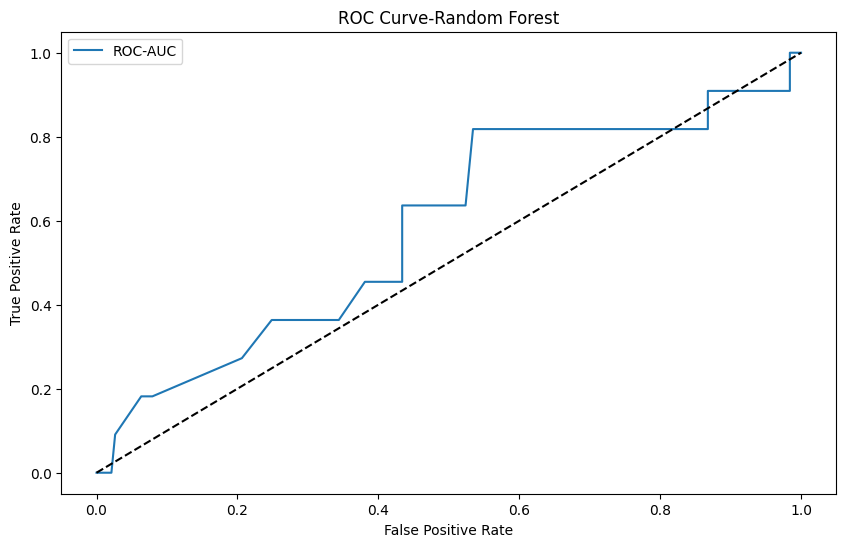

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Random Forest')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify only **13%** of the **non fraudulent** transactions correctly but able to classify **82%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the Recall is high i.e **82%** but the classifier is not able to maximise the classification of non fraudulent transactions as the false positive rate is around **87%**
*  AUC of ROC curve shows the model is able to **differentiate** the fraudulent and non fraudulent transactions **very** **less** but the model is not randomly guessing as  the curve shows it is **not** a **diagonal** line. The model performs **better** when **FPR** is in the range of **0.5 to 0.8** compared to other values of FPR






**Comparison of Model Before and After Tuning in Test Data:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 82% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e only 13%
* The **F1 score** has been **improved** from **0%** to **10%** when using the tuned hyperparameters



## **AdaBoost Classifier**

###**Default** **parameters**

In [ ]:
#AdaBoost Classifier with decision tree as base model for the boosting rounds
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
#Training the model
ada_clf.fit(X_train, y_train)
y_pred_train=ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00        42

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       189
           1       0.00      0.00      0.00        11

    accuracy                           0.88       200
   macro avg       0.47      0.46      0.47       200
weighted avg       0.89      0.88      0.88       200



Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies Most of the transactions as non fraudulent transactions

###**Hyperparameter** **Tuning**
*   N_estimators- Number of boosting rounds
*   Learning rate - Importance/Contribution of each base estimator
*   Max depth of base model - Depth of each tree in each boosting round
*   Split criterion for base model- Split criteria to be used in the base decision tree for each boosting round
*   Class weight for base model - Assign weight to minority samples in the base model







In [ ]:
##Creating the parameter space for the ada boost algorithm
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
     'ada__base_estimator__max_depth': [2,3,4,5],
     'ada__base_estimator__criterion': ['gini', 'entropy'],
    'ada__base_estimator__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]
}


# Create a pipeline with AdaBoost Classifier. Standardization is not required for tree based model
pipeline = Pipeline([
      # ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),random_state=45))

])
#Initializing Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1 score
grid_search_ada_v2 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ada',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__class_weight': [None,
                                                               {0: 1, 1: 50},
                                                               'balanced',
                                                               {0: 1, 1: 100},
                                                               {0: 1, 1: 1000}],
                         'ada__base_estimator__criterion': ['gini', 'entropy'],
                         'ada__base_estimator__max_depth': [2, 3, 4, 5],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
#Best parameter combinations
grid_search_ada_v2.best_params_

{'ada__base_estimator__class_weight': {0: 1, 1: 100},
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__max_depth': 2,
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 50}

In [ ]:
#Evaluating the best hyperparameter combination
best_model = grid_search_ada_v2.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 1.0
Test F1 Score: 0.19999999999999998


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00        42

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       189
           1       0.22      0.18      0.20        11

    accuracy                           0.92       200
   macro avg       0.59      0.57      0.58       200
weighted avg       0.91      0.92      0.92       200



*   Evaluation report shows that ada boost is **overfitting** the train data as the model classifies positive and negative class correctly
*   The model is able to classify only **18%** of the **fraudulent** transactions and the test f1 score is very low compared to train f1 score
*   Thus the model has **high** **variance** and no bias






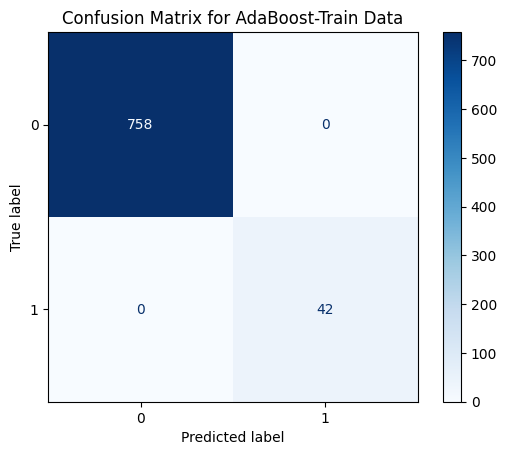

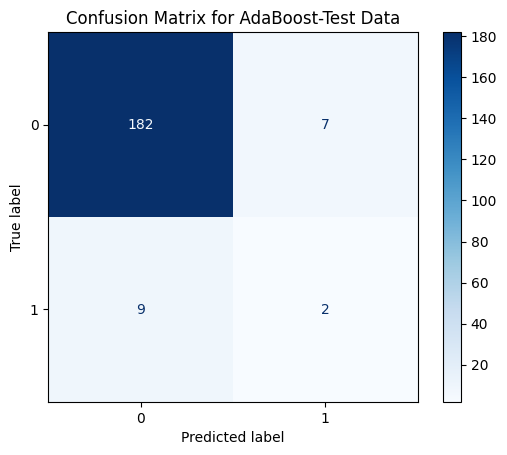

In [ ]:
##Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.22
Recall (TPR): 0.18
F1 Score: 0.20
Accuracy: 0.92
Misclassification Rate: 0.08
True Positive Rate (TPR): 0.18
False Positive Rate (FPR): 0.04
False Negative Rate (FNR): 0.82
True Negative Rate (TNR): 0.96


AUC-ROC: 0.6137566137566137


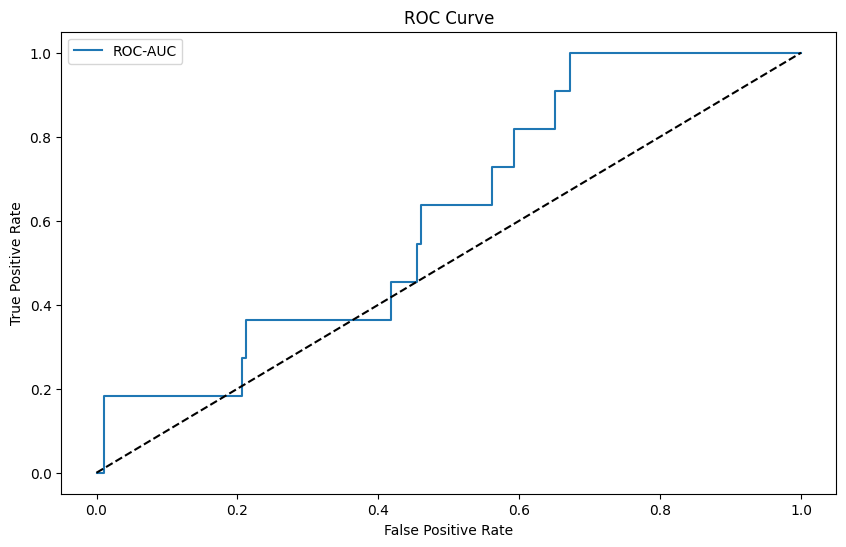

In [ ]:
##ROC CURVE
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')
#Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **96%** of the **non fraudulent** transactions correctly but able to classify only **18%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **92%** and **8%** but the classifier is not able to maximise the classification of fraudulent transactions as the false negative rate is around 82%
*  AUC of ROC curve shows the model is able to slightly **differentiate** the fraudulent and non fraudulent transactions and the model is not randomly guessing. The model performs **better** when **FPR** is **high** compared to when the **FPR** is **low**






**Comparison of Model Before and After Tuning In Test data:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 18% of the the fraud transactions
* The **test F1 score** has been **improved** from **0%** to **20%** when using the tuned hyperparameters



**Overall Performance:**  **-Comparing All algorithms**
*  Comparing all algorithms **decision Tree** performed well less bias and less variance than other models.
*  **AUC** of ROC curve of **0.70** shows that model is performing better than other models
*  Eventhough the accuracy is low(0.77) and misclassification rate is high(0.23) but the false postive rate and false negative rate is very less than others(0.23 and 0.36)
*   The model is able to classify **64%** of the **fraud** transactions and **77%** of the **non fraud** transactions






##Visualizing the Decision Tree and Feature Importance

In [ ]:
#The hyperparameter combination that acheived good results is used
tree_model=DecisionTreeClassifier(class_weight={0: 1, 1: 1000}, criterion='entropy',
                                          max_depth=20, max_features='sqrt', random_state=45)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1000}, criterion='entropy',
                       max_depth=20, max_features='sqrt', random_state=45)

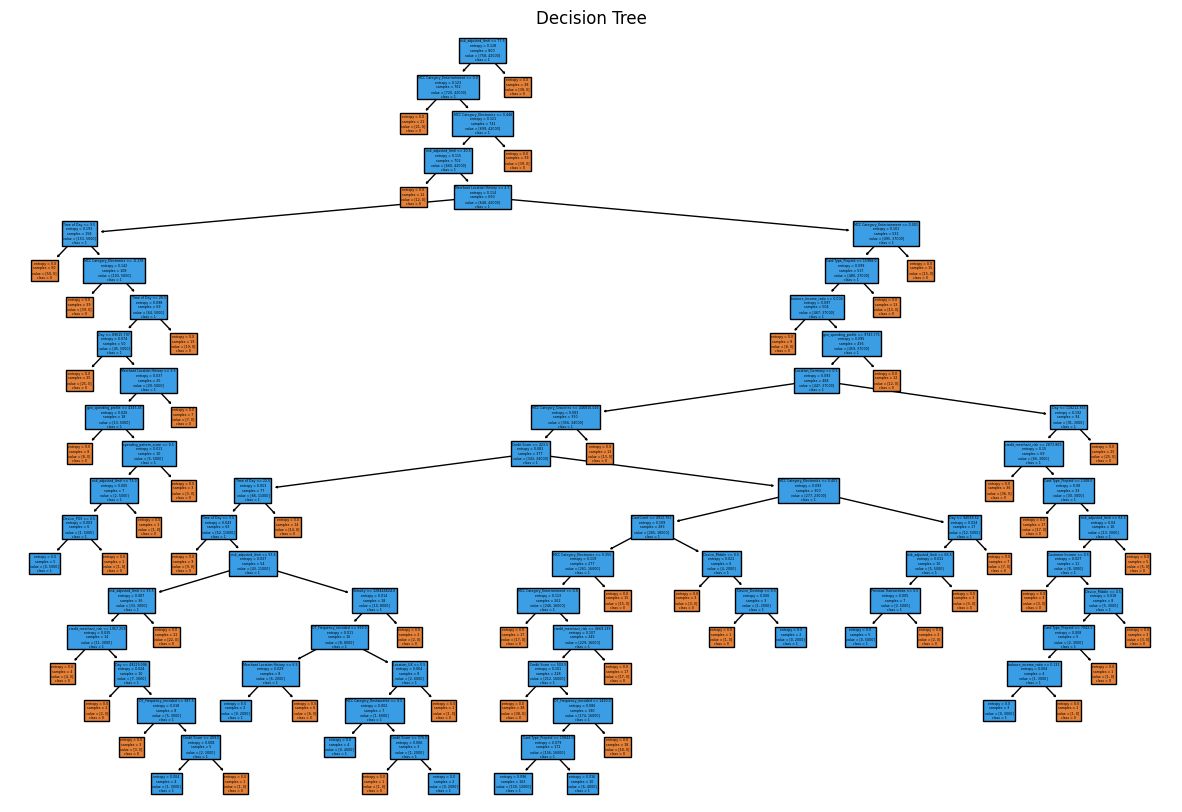

In [ ]:
##Visualizing the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))  # Set the figure size
plot_tree(tree_model, filled=True, feature_names=column_list2, class_names=categorical_df['Is Fraudulent'].astype(str))
plt.title("Decision Tree")
plt.show()


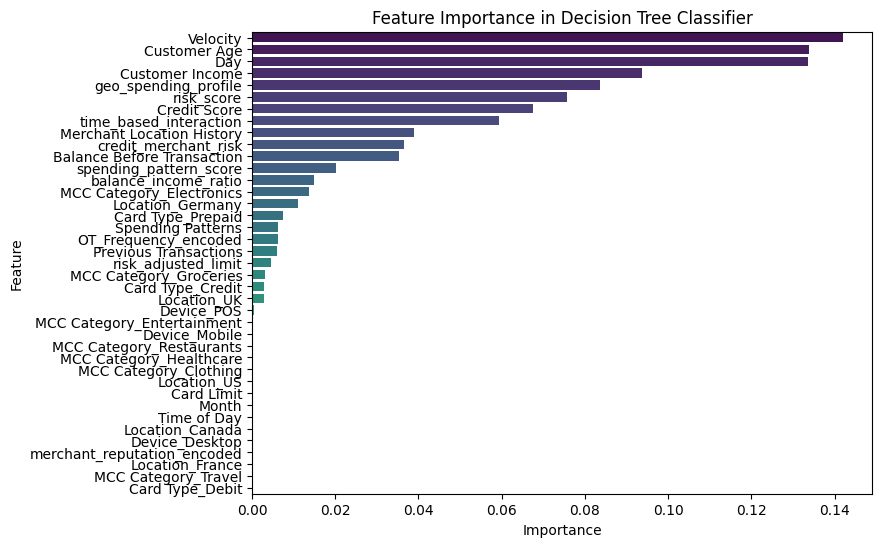

In [ ]:
# 2. Plot Feature Importances
# Get feature importances
importances = tree_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': column_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance in Decision Tree Classifier")
plt.show()

Velocity holds the highest feature importance followed by Customer Age and Day

# **Train Test split : 70-30**

In [ ]:
#Column list after removing the inter correlated variables are used
X=categorical_df[column_list2]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 80% for training and 20% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=Y)

Data Standardization

In [ ]:
## Normalizing the data using z score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

For the algorithms to converge faster feature scaling is done by z score normalization.
Data Standardization is done after train and test split to avoid data leakage during training.

##**Logistic** **Regression**

###Default Parameters

In [ ]:
#Defining Logistic regression function with default parameters from sklearn module
model=LogisticRegression(random_state=45)

In [ ]:
#Fit the model using standardized training data
model.fit(X_train_scaled, y_train)
#Predictions are made using built model on train and test data
y_pred_train=model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
##As it is a classification model - Accuracy, Precision,Recall and F1 score is calculated
## Classification report function of sklearn module is used to print the evaluation metrics
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       663
           1       0.00      0.00      0.00        37

    accuracy                           0.95       700
   macro avg       0.47      0.50      0.49       700
weighted avg       0.90      0.95      0.92       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.92       300



In [ ]:
## As it is a class imbalance problem, the most appropriate metric to tune is f1 score which balances both precision and recall.
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


Classification report for train and test data shows that the model classifies all transactions as non fraudulent transactions and the model is not able to classify fraudulent transactions as the train and test f1 score is 0.

##Hyperparameter Tuning

Hyperparameters Tuned for Logistic Regression -
*   C - regulaization constant
*   penalty - regularization type (l1,l2,elasticnet)
*   Solver - type of optimization algorithm
*   Class Weight- adding weight to the minority sample






In [ ]:
## Creating the parameter space
##Creating 3 different parameter space as some of the solvers are not consistent with some of the regularization techniques
param_grid_liblinear_saga = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l1','l2'],
    'logisticregression__solver': ['liblinear', 'saga'],  # 'l1' and 'l2' penalty supports 'liblinear' and 'saga'
    # 'logisticregression__max_iter': [100, 200, 300],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_lbfgs_newton_cg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l2',None],
    'logisticregression__solver': ['lbfgs', 'newton-cg','newton-cholesky','sag'],  # 'l2' penalty supports 'lbfgs' and 'newton-cg'
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_elasticnet = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1,10,100],
    'logisticregression__l1_ratio': [0.01, 0.1, 0.5,0.05,0.9,0.09],
    'logisticregression__penalty': ['elasticnet'],
    'logisticregression__solver': ['saga'],  # elasticnet supports only saga solver
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

# Create a pipeline with standardization and logistic regression
# For Logistic regression max iteration is set to 1000 to balance the accuracy and convergence time and random state as 45 to get consisten results
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=1000,random_state=45))
])

#Using Stratified K fold cross validation as the dataset has a huge imbalance in target variable
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV to explore the hyperparameter combinations
# 3 Grid Search is initialized for each of the parameter space
grid_search_liblinear_saga = GridSearchCV(estimator=pipeline,param_grid=param_grid_liblinear_saga,cv=skf,n_jobs=-1,scoring='f1')
grid_search_lbfgs_newton_cg = GridSearchCV(estimator=pipeline,param_grid=param_grid_lbfgs_newton_cg,cv=skf,n_jobs=-1,scoring='f1')
grid_search_elasticnet = GridSearchCV(estimator=pipeline,param_grid=param_grid_elasticnet,cv=skf,n_jobs=-1,scoring='f1')

# Fit the model using GridSearchCV to find the best hyperparameter combination
grid_search_liblinear_saga.fit(X_train, y_train)
grid_search_lbfgs_newton_cg.fit(X_train, y_train)
grid_search_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__l1_ratio': [0.01, 0.1, 0.5, 0.05,
                                                          0.9, 0.09],
                         'logisticregression__penalty': ['elasticnet'],
                         'logisticregression__solver': ['saga']},
             scoring='f1')

In [ ]:
#The best parameter combination obtained from grid search 1 is evaluated using f1 score
best_model = grid_search_liblinear_saga.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.07804878048780488
Test F1 Score: 0.029850746268656716


In [ ]:
#Best parameter combination from Grid search 1
grid_search_liblinear_saga.best_params_

{'logisticregression__C': 10,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [ ]:
#The best parameter combination obtained from grid search 2 is evaluated using f1 score
best_model = grid_search_lbfgs_newton_cg.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.07843137254901962
Test F1 Score: 0.029850746268656716


In [ ]:
#Best parameter combination from Grid Seach 2
grid_search_lbfgs_newton_cg.best_params_

{'logisticregression__C': 100,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'sag'}

In [ ]:
#The best parameter combination obtained from grid search 3 is evaluated using f1 score
best_model = grid_search_elasticnet.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.07843137254901962
Test F1 Score: 0.029850746268656716


In [ ]:
#Best parameter combination from Grid Search 3
grid_search_elasticnet.best_params_

{'logisticregression__C': 100,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__l1_ratio': 0.01,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__solver': 'saga'}

As we have intialized 3 different parameter space for each of the solvers the final best parameter combination is chosen among the 3 grid search using f1 score as the dataset has a huge imbalance. The first and third parameter combination has less bias and less variance than 2nd hyperparameter combination

In [ ]:
##Choose one with the best results from the above three combinations to print the classification report
#For example here grid_search_elasticnet performed better than others
best_model = grid_search_liblinear_saga.best_estimator_

In [ ]:
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred_test = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

In [ ]:
##Calculating the Classification Report of the best parameter combination
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       663
           1       0.05      0.22      0.08        37

    accuracy                           0.73       700
   macro avg       0.50      0.49      0.46       700
weighted avg       0.90      0.73      0.80       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       284
           1       0.02      0.06      0.03        16

    accuracy                           0.78       300
   macro avg       0.48      0.44      0.45       300
weighted avg       0.89      0.78      0.83       300



Class 0 (Non-fraudulent):

Precision: 0.94,Recall: 0.82,F1-Score: 0.88
The model is still performing well on non-fraudulent transactions, but recall has decreased from the training set.


Class 1 (Fraudulent):
Precision: 0.02,Recall: 0.06,F1-Score: 0.03
The model struggles even more in detecting fraudulent transactions in the test data, with very low precision and recall, leading to a poor F1-score.
Accuracy:
78%, but like the training data, this is not reflective of good model performance due to the imbalance.
Macro Avg (0.48) and Weighted Avg (0.78) similarly reflect the model’s imbalance issue.


The model doesn't exhibit significant variance between training and test data (performance is consistent), but it has high bias, particularly in detecting fraudulent transactions


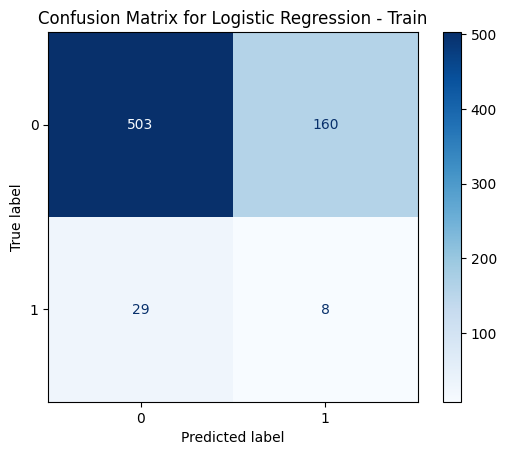

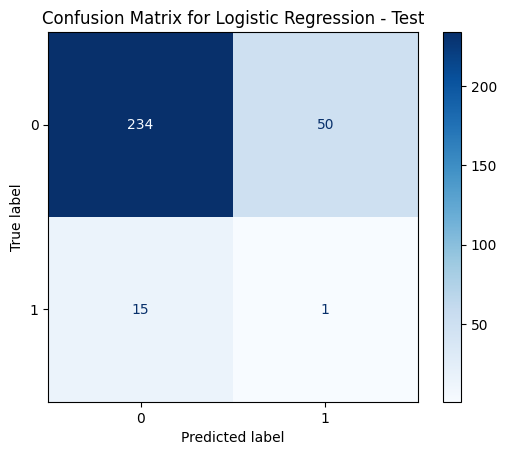

In [ ]:
#Printing the confusion matrix for both training and test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Train')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Test')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.02
Recall (TPR): 0.06
F1 Score: 0.03
Accuracy: 0.78
Misclassification Rate: 0.22
True Positive Rate (TPR): 0.06
False Positive Rate (FPR): 0.18
False Negative Rate (FNR): 0.94
True Negative Rate (TNR): 0.82


AUC-ROC: 0.41659330985915494


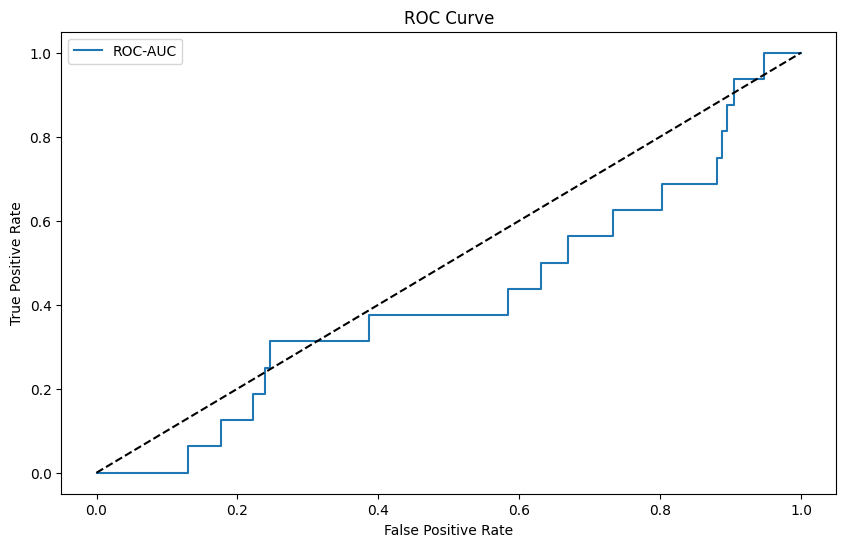

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**


The model performs poorly on identifying fraudulent transactions (low recall and F1 score), which is crucial in fraud detection.
Although the accuracy and true negative rate are relatively high, these metrics are misleading in the context of an imbalanced dataset.
The false negative rate is concerningly high, meaning the model misses most of the actual fraud cases, while the false positive rate shows that the model incorrectly flags many legitimate transactions as fraudulent.
The overall conclusion is that the model needs significant improvement, particularly in handling the minority class (fraudulent transactions). Focusing on recall (TPR) and lowering FNR are key in making the model more effective for fraud detection
*   ROC Curve shows the ratio of true positive rate and false
positive rate. AUC of ROC curve of 0.41 shows that model is merely guessing. It is not able to classify the non fraudulent transactions and guessing all transactions as fraudulent transactions

**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 100% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e not able to classify any non fraud transaction
* The **test F1 score** has been **improved** from **0%** to **10%** when using the tuned hyperparameters

##K Nearest Neighbour

##Default Parameters

In [ ]:
##Initializing K Nearest Neighbors Classifier of scikit learn
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [ ]:
##Fit the model with the scaled data as K Nearest Neighbors is a distance based classifier
knn_clf.fit(X_train_scaled, y_train)
y_pred_train=knn_clf.predict(X_train_scaled)
y_pred_test = knn_clf.predict(X_test_scaled)

In [ ]:
#Show the classification report of training and test data
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       663
           1       0.00      0.00      0.00        37

    accuracy                           0.95       700
   macro avg       0.47      0.50      0.49       700
weighted avg       0.90      0.95      0.92       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.94       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.94      0.92       300



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


The model performs very well for class 0 (non-fraudulent transactions), achieving high precision, recall, and F1-scores.
However, it performs very poorly for class 1 (fraudulent transactions), with precision, recall, and F1-scores all at 0. This means the model is not identifying any fraudulent transactions, both in training and test datasets.

##Hyperparameter Tuning
*   N Neignbors - Number of neighbours to be considered while classifying
*   P - Type of norm used in calculating distance. If 1 then manhattan norm 2 - euclidean norm and so on
*   Weights - Type of method used to assign weights to data points (Uniform - all data points have uniform weights, distance - assign weight based on distance)
*   Algorithm - Underlying method used to compute the nearest neighbors

  The metric is chosen as minkowski whereas p is adjusted as 1,2 and so on to specify the norm





In [ ]:
#Creating the parameter space for K Nearest Neighbors
param_grid= {
    'knn__n_neighbors': [3, 5, 7, 10, 15],
    'knn__p': [1,2,3,4],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a pipeline with standardization and K Nearest neighbor Classifier
pipeline = Pipeline([
     ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric='minkowski'))
])
#Intializing Stratified K fold cross validation with folds=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV
grid_search_knn = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [3, 5, 7, 10, 15],
                         'knn__p': [1, 2, 3, 4],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
#best parameter combination from the grid search
grid_search_knn.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 3,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [ ]:
#F1 score for both train and test data
best_model = grid_search_knn.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.15
Test F1 Score: 0.0


In [ ]:
#Show the classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       663
           1       1.00      0.08      0.15        37

    accuracy                           0.95       700
   macro avg       0.98      0.54      0.56       700
weighted avg       0.95      0.95      0.93       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.94       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.90      0.94      0.92       300



The model performs very well for class 0 (non-fraudulent transactions), achieving high precision, recall, and F1-scores.
However, it performs very poorly for class 1 (fraudulent transactions), as evidenced by the precision, recall, and F1-scores of 0 in the test data.
The high overall accuracy (0.94) is misleading due to the imbalance between non-fraudulent and fraudulent transactions.

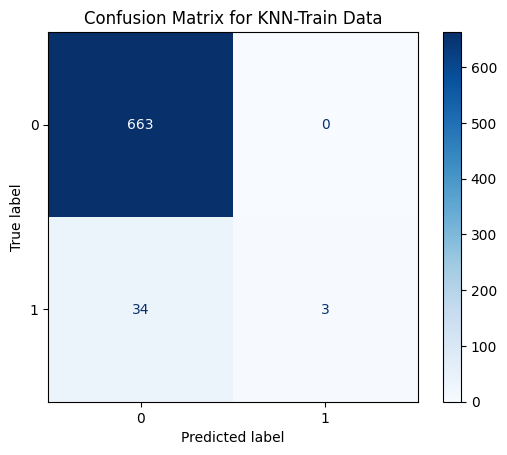

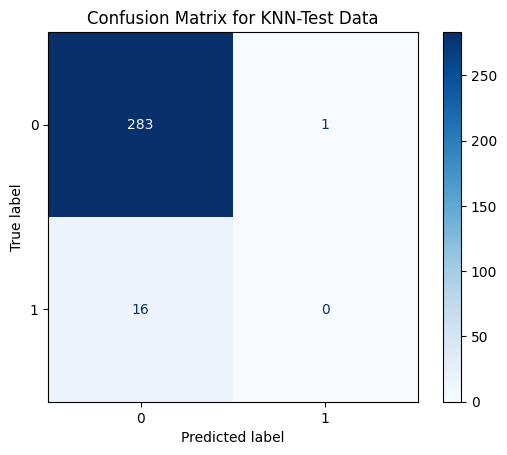

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.94
Misclassification Rate: 0.06
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.99


AUC-ROC: 0.4810739436619718


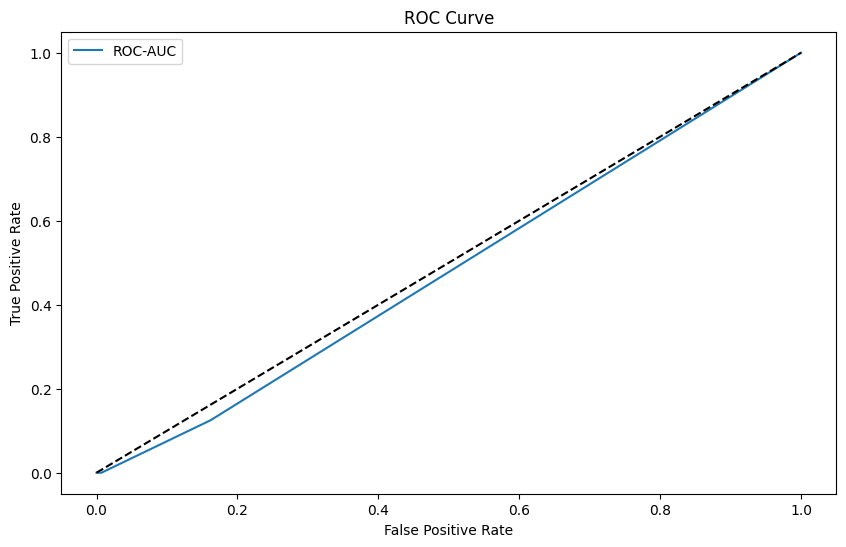

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **99%** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **94%** and **6%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%
*  The AUC of ROC curve arounf 0.48 shows that the model is
guessing every transaction as non fraudulent transaction
as the curver is along the diagonal line





**Comparison of Model Before and After Tuning:**
*  The model was not able to identify any fraudulent transactions using default parameters and after as well
* The **test F1 score** has not been **improved**  when using the tuned hyperparameters

##Naive Bayes Classifier

Guassian Naive Bayes classifier is used as the dataset has a mix of categorical and continous variables.

##Default Parameters

In [ ]:
#GaussianNB is initialized from sklearn library
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()

In [ ]:
#Train the model using Gaussian NB Classifier
#Scaling is not required as it is a probabilistic generative classifier
nb_clf.fit(X_train, y_train)
y_pred_train=nb_clf.predict(X_train)
y_pred_test = nb_clf.predict(X_test)

In [ ]:
#Print the Classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       663
           1       0.00      0.00      0.00        37

    accuracy                           0.94       700
   macro avg       0.47      0.50      0.48       700
weighted avg       0.90      0.94      0.92       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.93       300
   macro avg       0.47      0.49      0.48       300
weighted avg       0.90      0.93      0.91       300

0.0
0.0


Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0 in both train data and test data as in both cases the model classifies all transactions as non fraudulent transactions

##Hyperparameter Tuning
*  Variable Smoothing - Adding numerical stability

    Another hyperparameter technique is to convert the categorical variables to continous features and that is done in the feature engineering section




In [ ]:
#Creating the parameter space
param_grid= {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a pipeline with Naive Bayes Classifier
#Naive Bayes works on probability so standardization is not required
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
#Initialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1
grid_search_nb = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('nb', GaussianNB())]), n_jobs=-1,
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                               1e-05]},
             scoring='f1')

In [ ]:
#Best parameter combination
grid_search_nb.best_params_

{'nb__var_smoothing': 1e-09}

In [ ]:
#Evaluating the bet parameter combination
best_model = grid_search_nb.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0
Test F1 Score: 0.0


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       663
           1       0.00      0.00      0.00        37

    accuracy                           0.94       700
   macro avg       0.47      0.50      0.48       700
weighted avg       0.90      0.94      0.92       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.93       300
   macro avg       0.47      0.49      0.48       300
weighted avg       0.90      0.93      0.91       300



Training Data:
Class 0 (Non-Fraudulent Transactions):

Precision: 0.95 – The model correctly identifies 95% of the transactions it predicts as non-fraudulent.
Recall: 0.99 – It identifies 99% of the actual non-fraudulent transactions correctly.
F1-Score: 0.97 – A strong balance between precision and recall for non-fraudulent transactions, indicating excellent performance.


Class 1 (Fraudulent Transactions):

Precision: 0.00 – This indicates that the model never predicts any fraudulent transactions correctly.
Recall: 0.00 – The model fails to identify any of the actual fraudulent transactions.
F1-Score: 0.00 – Reflects that the model performs poorly in detecting fraudulent transactions.
Accuracy: 0.94 – The overall accuracy of the model is quite high (94%), but this is largely due to the dominance of non-fraudulent transactions (class 0).
Test Data:
Class 0 (Non-Fraudulent Transactions):

Precision: 0.95 – Similar to the training data, the model correctly identifies 95% of the non-fraudulent transactions it predicts.
Recall: 0.99 – It correctly identifies 99% of the actual non-fraudulent transactions.
F1-Score: 0.97 – This reflects strong performance for non-fraudulent transactions.
Class 1 (Fraudulent Transactions):

Precision: 0.00 – The model does not correctly predict any fraudulent transactions.
Recall: 0.00 – The model fails to identify any fraudulent transactions.
F1-Score: 0.00 – This indicates complete failure in detecting fraudulent transactions in the test data.



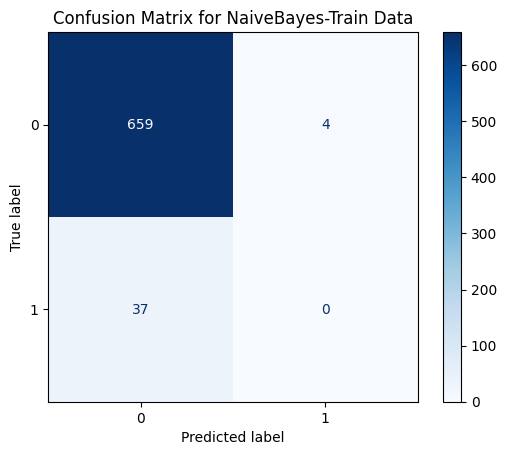

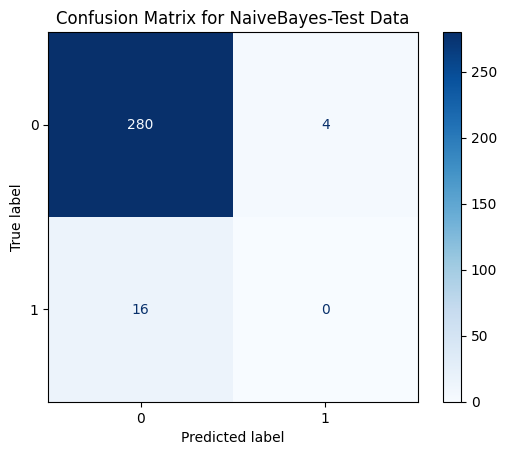

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.93
Misclassification Rate: 0.07
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.99


AUC-ROC: 0.39348591549295775


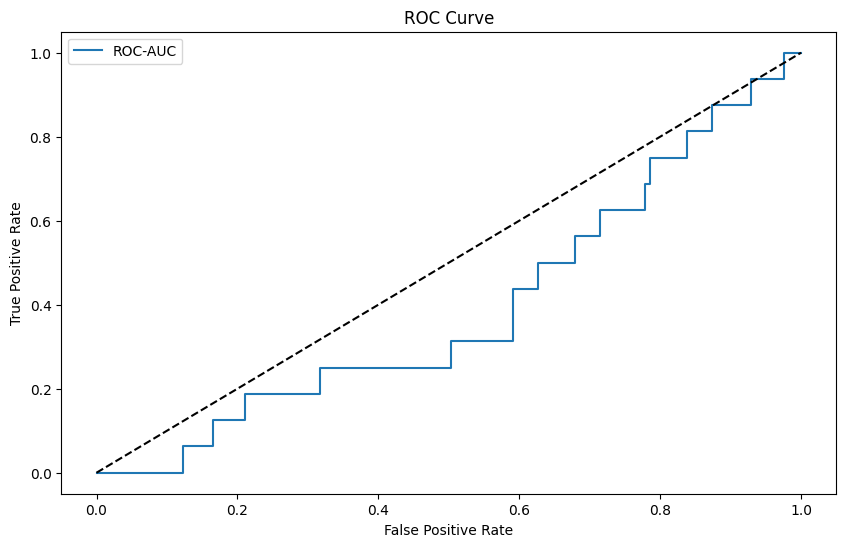

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **all** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **93%** and **7%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%. Thus the model is predicting  every transaction as non fraud transaction.
* An AUC-ROC score of 0.393 means that the model's ability to distinguish between the two classes (fraudulent and non-fraudulent transactions) is below average..


**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters and after tuning as well.
* The **F1 score** has not been **improved** when using the tuned hyperparameters

##Ada Boost Classifier - Logistic Regression as Base Estimator

AdaBoost Classifier is tried with Logistic Regression as base estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=42)

In [ ]:
ada_clf.fit(X_train_scaled, y_train)
y_pred_train=ada_clf.predict(X_train_scaled)
y_pred_test = ada_clf.predict(X_test_scaled)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       663
           1       0.00      0.00      0.00        37

    accuracy                           0.95       700
   macro avg       0.47      0.50      0.49       700
weighted avg       0.90      0.95      0.92       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.92       300



Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0 in train data and test data as in both train and test data the model classifies all transactions as non fraudulent transactions

##Hyperparameter Tuning
*   N_estimators - Number of boosting rounds
*   Learning rate -Importance/Contribution of each base learner
*  C - Learning rate of base estimator i.e logistic regression
*  Penalty - Type of regularization
*  Class weight -Assigning weight to minority samples for base estimator







In [ ]:
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
    'ada__base_estimator__C': [1.0,0,0.01,0.1,0.001],
    'ada__base_estimator__penalty': ['l2','l1','elasticnet'],
    'ada__base_estimator__class_weight':[None,'balanced']
}


# Create a pipeline with standardization and AdaBoost Classifier
pipeline = Pipeline([
       ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),random_state=45))

])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_ada_v1 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__C': [1.0, 0, 0.01, 0.1, 0.001],
                         'ada__base_estimator__class_weight': [None,
                                                               'balanced'],
                         'ada__base_estimator__penalty': ['l2', 'l1',
                                                          'elasticnet'],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
grid_search_ada_v1.best_params_

{'ada__base_estimator__C': 0.001,
 'ada__base_estimator__class_weight': None,
 'ada__base_estimator__penalty': 'l2',
 'ada__learning_rate': 2.0,
 'ada__n_estimators': 50}

In [ ]:
best_model = grid_search_ada_v1.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.12413793103448277
Test F1 Score: 0.0425531914893617


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       663
           1       0.08      0.24      0.12        37

    accuracy                           0.82       700
   macro avg       0.52      0.55      0.51       700
weighted avg       0.91      0.82      0.86       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       284
           1       0.03      0.06      0.04        16

    accuracy                           0.85       300
   macro avg       0.49      0.48      0.48       300
weighted avg       0.90      0.85      0.87       300



*   Evaluation report shows that ada boost is High recall shows that the model is good at identifying most of the non-fraudulent transactions as for both train and test data the model classifies  85% and 89% of non fraud transactions correctly
*   The model is able to classify **24%** of the **fraudulent** transactions in test and 6% in train as the recall for both train and test data is Low recall indicates that the model is not identifying many of the actual fraudulent transactions
*   Thus the model has **Low** **bias** and **high variance**


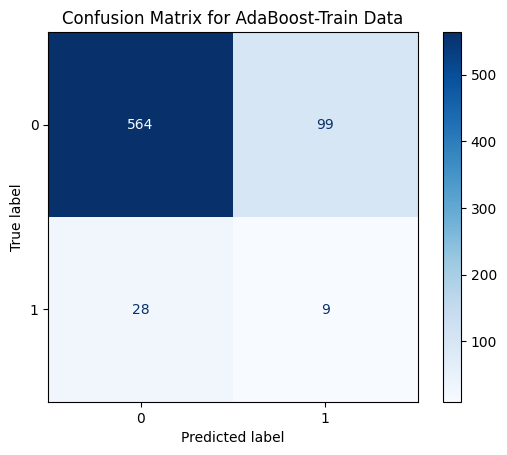

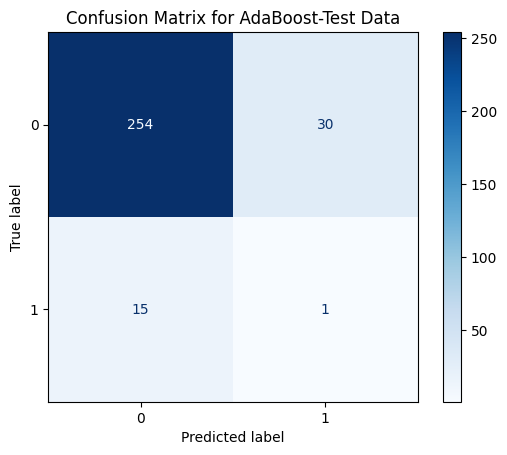

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.03
Recall (TPR): 0.06
F1 Score: 0.04
Accuracy: 0.85
Misclassification Rate: 0.15
True Positive Rate (TPR): 0.06
False Positive Rate (FPR): 0.11
False Negative Rate (FNR): 0.94
True Negative Rate (TNR): 0.89


AUC-ROC: 0.4689700704225352


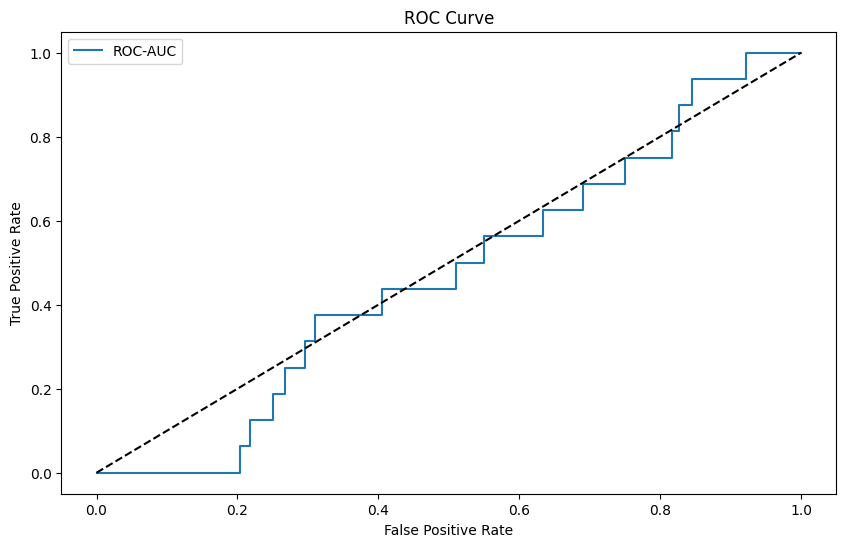

In [ ]:
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify only **6%** of the **fraudulent** transactions correctly but able to classify  **89%** of the **non  fraudulent** transactions correctly from the test data
*  Recall is low ,this indicates that only 6% of the actual fraudulent transactions are correctly identified by the model. The model is missing the vast majority of fraudulent transactions.
*  An AUC-ROC score of 0.0.4689700704225352 means that the model's ability to distinguish between the two classes (fraudulent and non-fraudulent transactions) is below average.




**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is still there is  able to classify 6% of the the fraud transactions but ability of classifying non fraudulent transactions is increase i.e  89%
* The **F1 score** has been ** not improved**
 when using the tuned hyperparameters

##Tree Based Models

In [ ]:
#Using the column list before removing features with inter correlation as tree based models are not affected by the intercorrelation
X=categorical_df[column_list]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 80% for training and 20% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=Y)

## **Decision Tree Classifier**


In [ ]:
##Initializing the Decision Tree Classifier of sklearn library
model=DecisionTreeClassifier(random_state=45)
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       663
           1       1.00      1.00      1.00        37

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       284
           1       0.19      0.19      0.19        16

    accuracy                           0.91       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.1875


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0.18 in test data as in test data the model classifies most of  transactions as non fraudulent transactions

In [ ]:
X_train.columns

Index(['Location_Germany', 'Location_France', 'MCC Category_Healthcare',
       'MCC Category_Clothing', 'Location_UK', 'Previous Transactions',
       'Merchant Location History', 'Credit Score', 'balance_income_ratio',
       'Location_Canada', 'Balance Before Transaction', 'geo_spending_profile',
       'Spending Patterns', 'credit_merchant_risk',
       'merchant_reputation_encoded', 'Card Limit', 'OT_Frequency_encoded',
       'MCC Category_Travel', 'Card Type_Credit', 'Customer Income',
       'time_based_interaction', 'Device_Desktop', 'Day', 'Card Type_Prepaid',
       'Customer Age', 'Time of Day', 'spending_pattern_score',
       'risk_adjusted_limit', 'Month', 'MCC Category_Groceries', 'Velocity',
       'Location_US', 'Device_POS', 'MCC Category_Electronics', 'risk_score',
       'MCC Category_Restaurants', 'Device_Mobile',
       'MCC Category_Entertainment', 'Card Type_Debit'],
      dtype='object')

##Hyperparamter Tuning
*   Criterion - Criteria for measuring the quality of split (entropy or gini)
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a internal node
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Class weight - Assigning weight to minority samples(passed as dictionary mentioning the weight of each class)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
#Creating the parameter space

param_grid= {
    'classifier__criterion': ['gini', 'entropy'],          # Criterion for measuring quality of splits
    'classifier__max_depth': [5, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10,15],            # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4,5],              # Minimum number of samples required to be at a leaf node
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]#Class weight can be passed as dictionary mentioning the weight of each class
}


# Create a pipeline with Decision Tree Classifier
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=45))
])
#Intialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV and the metric to be tuned=f1
grid_search_dt = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=45))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, {0: 1, 1: 50},
                                                      'balanced',
                                                      {0: 1, 1: 100},
                                                      {0: 1, 1: 1000}],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 10, 20, 30, 40, 50],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 5],
                         'classifier__min_samples_split': [2, 5, 10, 15]},
             scoring='f1')

In [ ]:
from sklearn.metrics import f1_score
best_model = grid_search_dt.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.5362318840579711
Test F1 Score: 0.06896551724137931


In [ ]:
grid_search_dt.best_params_

{'classifier__class_weight': {0: 1, 1: 1000},
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 30,
 'classifier__max_features': 'log2',
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 2}

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       663
           1       0.37      1.00      0.54        37

    accuracy                           0.91       700
   macro avg       0.68      0.95      0.74       700
weighted avg       0.97      0.91      0.93       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       284
           1       0.05      0.12      0.07        16

    accuracy                           0.82       300
   macro avg       0.50      0.49      0.48       300
weighted avg       0.90      0.82      0.86       300




*   The model is able to classify **90%** of the **non fraudulent** transactions in test data and **86%** in training data and both train and test f1 score is high compared to other algorithms
*   The model is able to classify **12%** of the **fraudulent** transactions in test data and **all** transactions in training data as both train and test f1 recall is high compared to other models
*   Thus the model has **less** **bias** and **high** **variance**





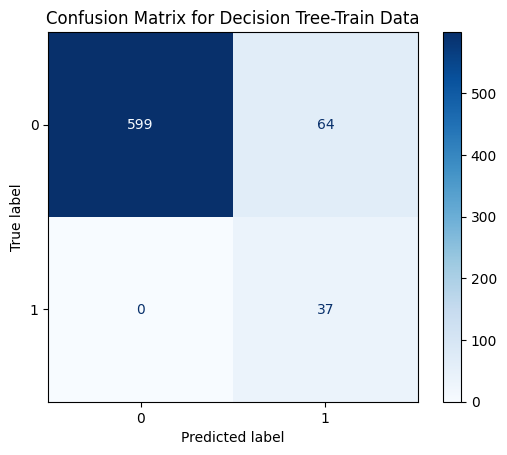

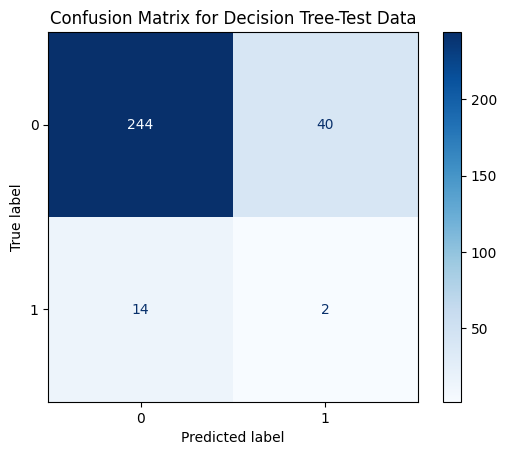

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.05
Recall (TPR): 0.12
F1 Score: 0.07
Accuracy: 0.82
Misclassification Rate: 0.18
True Positive Rate (TPR): 0.12
False Positive Rate (FPR): 0.14
False Negative Rate (FNR): 0.88
True Negative Rate (TNR): 0.86


AUC-ROC: 0.488556338028169


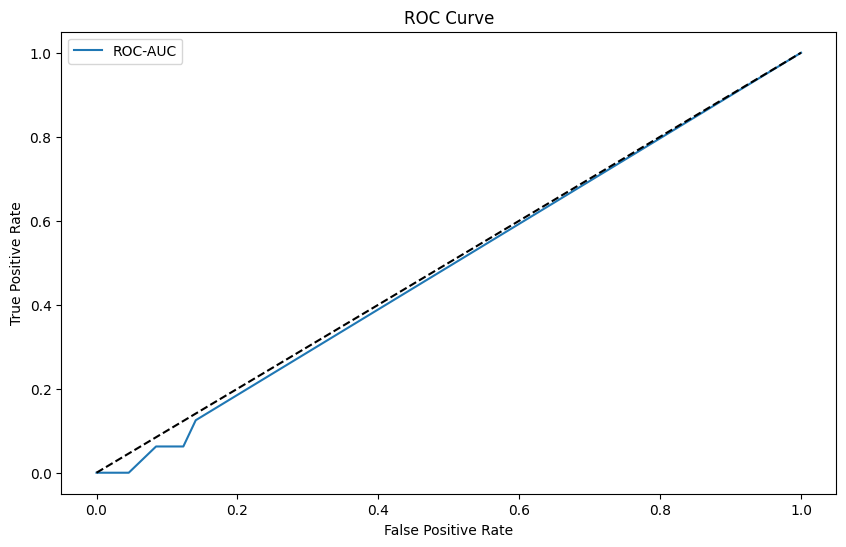

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **12%** of the **non fraudulent** transactions correctly and able to classify **86%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is high i.e **84%** and **7%** but the classifier is able to maximise the classification of both fraudulent and non fraudulent transactions as the false negative rate is around **14%** and the false positive rate is  **86%**
*  An AUC-ROC score of 0.488556338028169 means that the model's ability to distinguish between the two classes (fraudulent and non-fraudulent transactions) is below average.




**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 86% of the the fraud transactions
* The **F1 score** has been ** not improved**  when using the tuned hyperparameters



## **Random Forest Classifier**

In [ ]:
#Initializing random Forest classifier of sklearn
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=45)

In [ ]:
rf_clf.fit(X_train, y_train)
y_pred_train=rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       663
           1       1.00      1.00      1.00        37

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.92       300



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.0


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies all transactions as non fraudulent transactions

##Hyperparameter Tuning
*   N_Estimators- Number of decision trees to be built
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a split
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Bootstrap - Sampling with/without replacement while creating subset of data for each base tree
*   Class weight - assigning weight to minority samples









In [ ]:
#Setting the parameter space for hyperparameter tuning
#RandomizedSearchCV is used as the number of hyperparameter combinations is very high so the model takes more time when using GridSearch
#Trying a subset of hyperparameter combinations using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid= {
    'rf__n_estimators': [50,100,200],
    'rf__max_depth': [5,10, 15,20],
    'rf__min_samples_split': [2,5,8,10,11],
    'rf__min_samples_leaf':[1,2,3,4,5],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__bootstrap': [True, False],
    'rf__class_weight':[None,'balanced',{0:1,1:100},{0:1,1:1000}]
}

# Create a pipeline with Random Forest Classifier
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=45))
])
#Initialize Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV with metric to be tuned as f1
grid_search_rf = RandomizedSearchCV(estimator=pipeline,param_distributions=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('rf',
                                              RandomForestClassifier(random_state=45))]),
                   n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__class_weight': [None, 'balanced',
                                                             {0: 1, 1: 100},
                                                             {0: 1, 1: 1000}],
                                        'rf__max_depth': [5, 10, 15, 20],
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'rf__min_samples_split': [2, 5, 8, 10,
                                                                  11],
                                        'rf__n_estimators': [50, 100, 200]},
                   scoring='f1')

In [ ]:
#Best parameter combination
grid_search_rf.best_params_

{'rf__n_estimators': 200,
 'rf__min_samples_split': 10,
 'rf__min_samples_leaf': 5,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 5,
 'rf__class_weight': {0: 1, 1: 100},
 'rf__bootstrap': False}

In [ ]:
#Evaluating the best parameter combination
best_model = grid_search_rf.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.13805970149253732
Test F1 Score: 0.10126582278481013


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      0.30      0.47       663
           1       0.07      1.00      0.14        37

    accuracy                           0.34       700
   macro avg       0.54      0.65      0.30       700
weighted avg       0.95      0.34      0.45       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.26      0.41       284
           1       0.05      0.75      0.10        16

    accuracy                           0.29       300
   macro avg       0.50      0.51      0.26       300
weighted avg       0.90      0.29      0.40       300



*   Evaluation report shows that random forest is **underfitting** as for both train and test data the model is not able to classify non fraudulent transactions effectively
*   The model is able to classify only **30%** of the **non fraudulent** transactions in test data and **26%** in training data and both train and test f1 score is low
*   The model is able to classify **75%** of the **fraudulent** transactions in test data and **all** transactions in training data as both train and test f1 recall is high
*   Thus the model has **high** **bias** and **less** **variance**






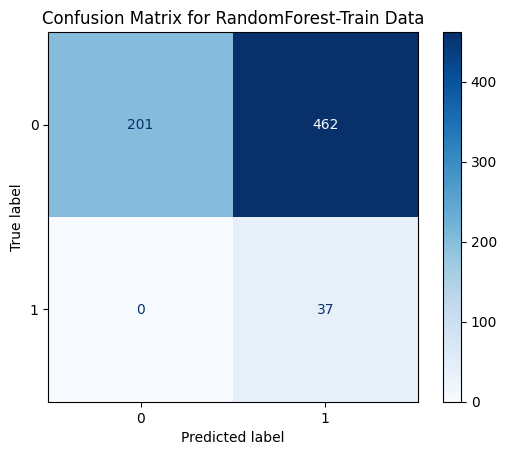

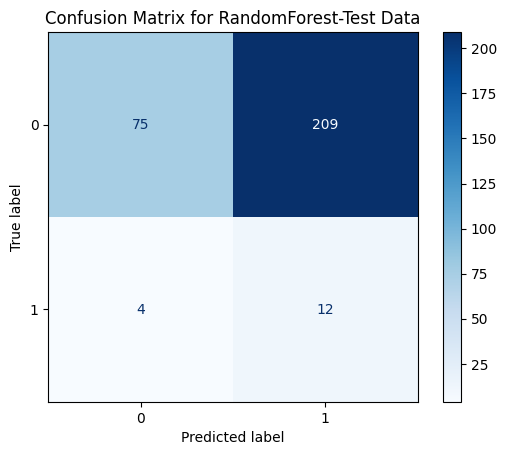

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.05
Recall (TPR): 0.75
F1 Score: 0.10
Accuracy: 0.29
Misclassification Rate: 0.71
True Positive Rate (TPR): 0.75
False Positive Rate (FPR): 0.74
False Negative Rate (FNR): 0.25
True Negative Rate (TNR): 0.26


AUC-ROC: 0.5400528169014084


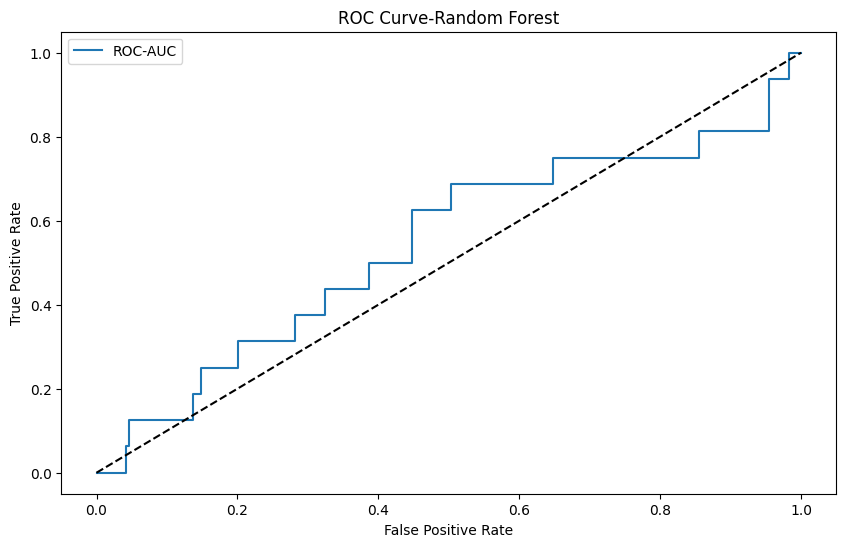

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Random Forest')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify only **26%** of the **non fraudulent** transactions correctly but able to classify **75%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the Recall is high i.e **75%** but the classifier is not able to maximise the classification of non fraudulent transactions as the false positive rate is around **74%**
*  AUC of ROC curve shows the model is able to **differentiate** the fraudulent and non fraudulent transactions **very** **less** but the model is not randomly guessing as  the curve shows it is **not** a **diagonal** line. The model performs **better** when **FPR** is in the range of **0.5 to 0.8** compared to other values of FPR






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 75% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e only 26%
* The **F1 score** has been **improved** from **0%** to **10%** when using the tuned hyperparameters



## **AdaBoost Classifier**

##**Default** **parameters**

In [ ]:
#AdaBoost Classifier with decision tree as base model for the boosting rounds
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
#Training the model
ada_clf.fit(X_train, y_train)
y_pred_train=ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       663
           1       1.00      1.00      1.00        37

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       284
           1       0.06      0.06      0.06        16

    accuracy                           0.89       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.90      0.89      0.90       300



Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0.94 and 0.06 in test data as in test data the model classifies most of data as  transactions as non fraudulent transactions

##**Hyperparameter** **Tuning**
*   N_estimators- Number of boosting rounds
*   Learning rate - Importance/Contribution of each base estimator
*   Max depth of base model - Depth of each tree in each boosting round
*   Split criterion for base model- Split criteria to be used in the base decision tree for each boosting round
*   Class weight for base model - Assign weight to minority samples in the base model







In [ ]:
##Creating the parameter space for the ada boost algorithm
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
     'ada__base_estimator__max_depth': [2,3,4,5],
     'ada__base_estimator__criterion': ['gini', 'entropy'],
    'ada__base_estimator__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]
}


# Create a pipeline with AdaBoost Classifier. Standardization is not required for tree based model
pipeline = Pipeline([
      # ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),random_state=45))

])
#Initializing Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1 score
grid_search_ada_v2 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ada',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__class_weight': [None,
                                                               {0: 1, 1: 50},
                                                               'balanced',
                                                               {0: 1, 1: 100},
                                                               {0: 1, 1: 1000}],
                         'ada__base_estimator__criterion': ['gini', 'entropy'],
                         'ada__base_estimator__max_depth': [2, 3, 4, 5],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
#Best parameter combinations
grid_search_ada_v2.best_params_

{'ada__base_estimator__class_weight': {0: 1, 1: 1000},
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__max_depth': 4,
 'ada__learning_rate': 0.01,
 'ada__n_estimators': 200}

In [ ]:
#Evaluating the best hyperparameter combination
best_model = grid_search_ada_v2.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.9736842105263158
Test F1 Score: 0.06666666666666667


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       663
           1       0.95      1.00      0.97        37

    accuracy                           1.00       700
   macro avg       0.97      1.00      0.99       700
weighted avg       1.00      1.00      1.00       700

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       284
           1       0.07      0.06      0.07        16

    accuracy                           0.91       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.90      0.91      0.90       300



*   Evaluation report shows that ada boost is **overfitting** the train data as the model classifies positive and negative class correctly
*   The model is able to classify only **6%** of the **fraudulent** transactions and the test f1 score is very low compared to train f1 score
*   Thus the model has **high** **variance** and very low bias






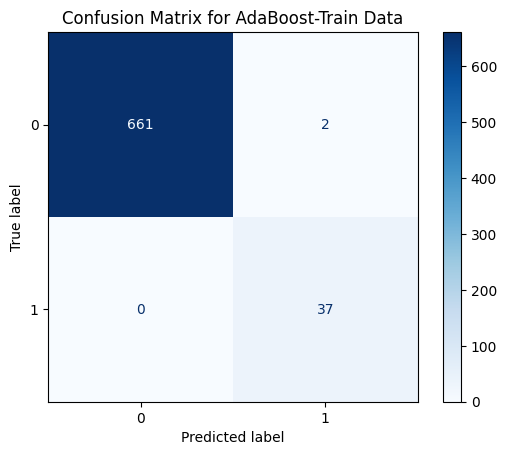

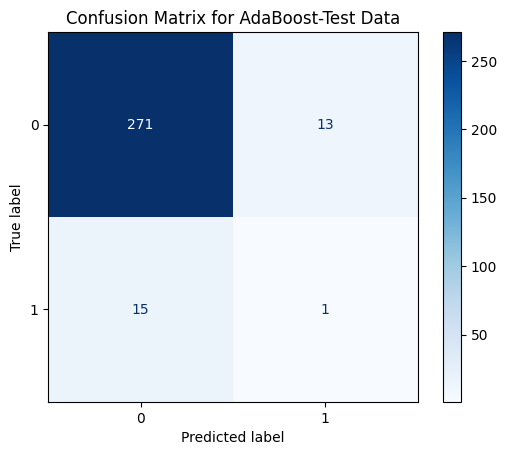

In [ ]:
##Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.07
Recall (TPR): 0.06
F1 Score: 0.07
Accuracy: 0.91
Misclassification Rate: 0.09
True Positive Rate (TPR): 0.06
False Positive Rate (FPR): 0.05
False Negative Rate (FNR): 0.94
True Negative Rate (TNR): 0.95


AUC-ROC: 0.4786531690140845


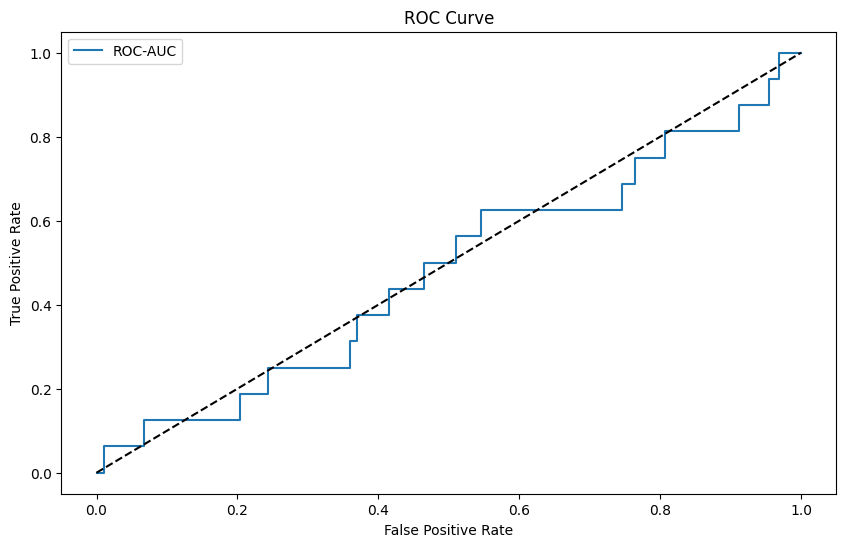

In [ ]:
##ROC CURVE
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')
#Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **95%** of the **non fraudulent** transactions correctly but able to classify only **6%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **91%** and **9%** but the classifier is not able to maximise the classification of fraudulent transactions as the false negative rate is around 5%
*  An AUC-ROC score of 0.4786531690140845 means that the model's ability to distinguish between the two classes (fraudulent and non-fraudulent transactions) is below average.






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 6% of the the fraud transactions
* The **F1 score** has been **improved** from **0%** to **7%** when using the tuned hyperparameters



# **Train Test split : 50-50**

In [ ]:
#Column list after removing the inter correlated variables are used
X=categorical_df[column_list2]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 50% for training and 50% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42,stratify=Y)

Data Standardization

In [ ]:
## Normalizing the data using z score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

For the algorithms to converge faster feature scaling is done by z score normalization.
Data Standardization is done after train and test split to avoid data leakage during training.

##**Logistic** **Regression**

###Default Parameters

In [ ]:
#Defining Logistic regression function with default parameters from sklearn module
model=LogisticRegression(random_state=45)

In [ ]:
#Fit the model using standardized training data
model.fit(X_train_scaled, y_train)
#Predictions are made using built model on train and test data
y_pred_train=model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
##As it is a classification model - Accuracy, Precision,Recall and F1 score is calculated
## Classification report function of sklearn module is used to print the evaluation metrics
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       473
           1       0.00      0.00      0.00        27

    accuracy                           0.95       500
   macro avg       0.47      0.50      0.49       500
weighted avg       0.89      0.95      0.92       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       474
           1       0.00      0.00      0.00        26

    accuracy                           0.95       500
   macro avg       0.47      0.50      0.49       500
weighted avg       0.90      0.95      0.92       500



In [ ]:
## As it is a class imbalance problem, the most appropriate metric to tune is f1 score which balances both precision and recall.
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


Classification report for train and test data shows that the model classifies all transactions as non fraudulent transactions and the model is not able to classify fraudulent transactions as the train and test f1 score is 0.

###**Hyperparameter Tuning**

Hyperparameters Tuned for Logistic Regression -
*   C - regulaization constant
*   penalty - regularization type (l1,l2,elasticnet)
*   Solver - type of optimization algorithm
*   Class Weight- adding weight to the minority sample






In [ ]:
## Creating the parameter space
##Creating 3 different parameter space as some of the solvers are not consistent with some of the regularization techniques
param_grid_liblinear_saga = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l1','l2'],
    'logisticregression__solver': ['liblinear', 'saga'],  # 'l1' and 'l2' penalty supports 'liblinear' and 'saga'
    # 'logisticregression__max_iter': [100, 200, 300],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_lbfgs_newton_cg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l2',None],
    'logisticregression__solver': ['lbfgs', 'newton-cg','newton-cholesky','sag'],  # 'l2' penalty supports 'lbfgs' and 'newton-cg'
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_elasticnet = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1,10,100],
    'logisticregression__l1_ratio': [0.01, 0.1, 0.5,0.05,0.9,0.09],
    'logisticregression__penalty': ['elasticnet'],
    'logisticregression__solver': ['saga'],  # elasticnet supports only saga solver
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

# Create a pipeline with standardization and logistic regression
# For Logistic regression max iteration is set to 1000 to balance the accuracy and convergence time and random state as 45 to get consisten results
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=1000,random_state=45))
])

#Using Stratified K fold cross validation as the dataset has a huge imbalance in target variable
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV to explore the hyperparameter combinations
# 3 Grid Search is initialized for each of the parameter space
grid_search_liblinear_saga = GridSearchCV(estimator=pipeline,param_grid=param_grid_liblinear_saga,cv=skf,n_jobs=-1,scoring='f1')
grid_search_lbfgs_newton_cg = GridSearchCV(estimator=pipeline,param_grid=param_grid_lbfgs_newton_cg,cv=skf,n_jobs=-1,scoring='f1')
grid_search_elasticnet = GridSearchCV(estimator=pipeline,param_grid=param_grid_elasticnet,cv=skf,n_jobs=-1,scoring='f1')

# Fit the model using GridSearchCV to find the best hyperparameter combination
grid_search_liblinear_saga.fit(X_train, y_train)
grid_search_lbfgs_newton_cg.fit(X_train, y_train)
grid_search_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__l1_ratio': [0.01, 0.1, 0.5, 0.05,
                                                          0.9, 0.09],
                         'logisticregression__penalty': ['elasticnet'],
                         'logisticregression__solver': ['saga']},
             scoring='f1')

In [ ]:
#The best parameter combination obtained from grid search 1 is evaluated using f1 score
best_model = grid_search_liblinear_saga.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.10246679316888045
Test F1 Score: 0.0988593155893536


In [ ]:
#Best parameter combination from Grid search 1
grid_search_liblinear_saga.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

In [ ]:
#The best parameter combination obtained from grid search 2 is evaluated using f1 score
best_model = grid_search_lbfgs_newton_cg.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.09828009828009829
Test F1 Score: 0.11241217798594846


In [ ]:
#Best parameter combination from Grid Seach 2
grid_search_lbfgs_newton_cg.best_params_

{'logisticregression__C': 1,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'sag'}

In [ ]:
#The best parameter combination obtained from grid search 3 is evaluated using f1 score
best_model = grid_search_elasticnet.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0
Test F1 Score: 0.0


In [ ]:
#Best parameter combination from Grid Search 3
grid_search_elasticnet.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__l1_ratio': 0.05,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__solver': 'saga'}

As we have intialized 3 different parameter space for each of the solvers the final best parameter combination is chosen among the 3 grid search using f1 score as the dataset has a huge imbalance. The first and second parameter combination has less bias and less variance than 3rd hyperparameter combination

In [ ]:
##Choose one with the best results from the above three combinations to print the classification report
#For example here grid_search_elasticnet performed better than others
best_model = grid_search_lbfgs_newton_cg.best_estimator_

In [ ]:
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred_test = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

In [ ]:
##Calculating the Classification Report of the best parameter combination
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.94      0.24      0.38       473
           1       0.05      0.74      0.10        27

    accuracy                           0.27       500
   macro avg       0.50      0.49      0.24       500
weighted avg       0.89      0.27      0.37       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.98      0.20      0.34       474
           1       0.06      0.92      0.11        26

    accuracy                           0.24       500
   macro avg       0.52      0.56      0.23       500
weighted avg       0.93      0.24      0.33       500



Evaluation results shows that the model has predicted 74% as fraudulent class as with respect to fraudulent class the recall value is 0.74 and the model has predicted 24% as non-fraudulent class as with respect to non-fraudulent class the recall value is 0.24 for **training data**.

Evaluation results shows that the model has predicted 92% as fraudulent class as with respect to fraudulent class the recall value is 0.92 and the model has predicted 20% as non-fraudulent class as with respect to non-fraudulent class the recall value is 0.20 for **test data**.

The model has a high bias and less variance between the training and test data as the f1 score for both train and test data is around 0.10.

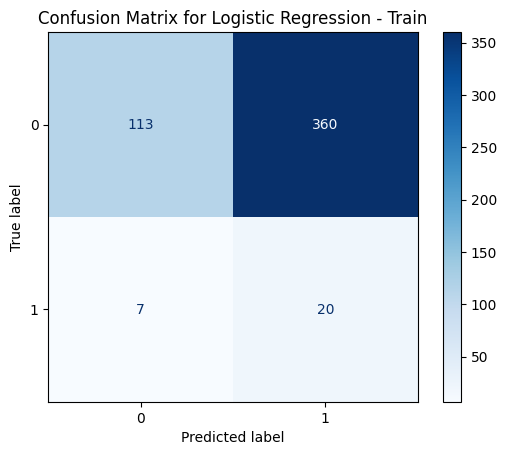

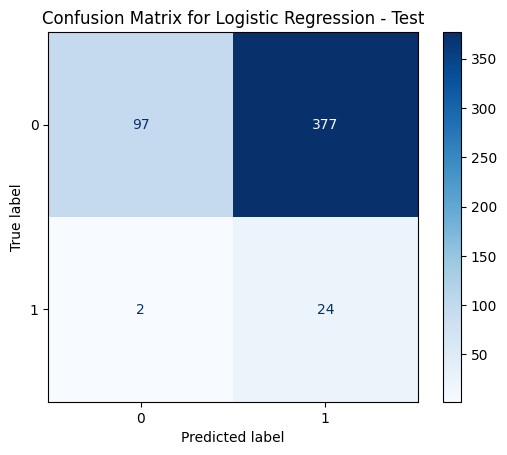

In [ ]:
#Printing the confusion matrix for both training and test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Train')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Test')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.06
Recall (TPR): 0.92
F1 Score: 0.11
Accuracy: 0.24
Misclassification Rate: 0.76
True Positive Rate (TPR): 0.92
False Positive Rate (FPR): 0.80
False Negative Rate (FNR): 0.08
True Negative Rate (TNR): 0.20


AUC-ROC: 0.46178188899707884


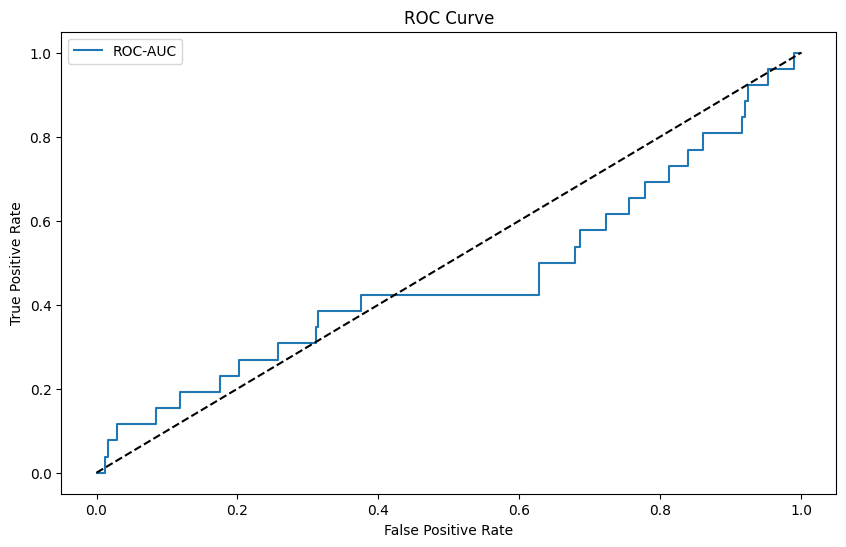

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify 92% of the fraudulent transactions correctly but able to classify only 20% of the non-fraudulent transactions correctly from the test data
AUC of ROC curve shows the model is predicting opposite to the true label as the auc is below 0.5

**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 92% of the the fraud transactions but ability of classifying non fraudulent transactions only 20%
* The **test F1 score** has been **improved** from **0%** to **11%** when using the tuned hyperparameters

##**K Nearest Neighbour**

###Default Parameters

In [ ]:
##Initializing K Nearest Neighbors Classifier of scikit learn
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [ ]:
##Fit the model with the scaled data as K Nearest Neighbors is a distance based classifier
knn_clf.fit(X_train_scaled, y_train)
y_pred_train=knn_clf.predict(X_train_scaled)
y_pred_test = knn_clf.predict(X_test_scaled)

In [ ]:
#Show the classification report of training and test data
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       473
           1       0.00      0.00      0.00        27

    accuracy                           0.95       500
   macro avg       0.47      0.50      0.49       500
weighted avg       0.89      0.95      0.92       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       474
           1       0.00      0.00      0.00        26

    accuracy                           0.95       500
   macro avg       0.47      0.50      0.49       500
weighted avg       0.90      0.95      0.92       500



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


Evaluation metrics on train and test data shows that model is able to classify non fraudulent transactions effectively in train data and test data but unable to classify the fraudulent transactions

###Hyperparameter Tuning
*   N Neignbors - Number of neighbours to be considered while classifying
*   P - Type of norm used in calculating distance. If 1 then manhattan norm 2 - euclidean norm and so on
*   Weights - Type of method used to assign weights to data points (Uniform - all data points have uniform weights, distance - assign weight based on distance)
*   Algorithm - Underlying method used to compute the nearest neighbors

  The metric is chosen as minkowski whereas p is adjusted as 1,2 and so on to specify the norm





In [ ]:
#Creating the parameter space for K Nearest Neighbors
param_grid= {
    'knn__n_neighbors': [3, 5, 7, 10, 15],
    'knn__p': [1,2,3,4],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a pipeline with standardization and K Nearest neighbor Classifier
pipeline = Pipeline([
     ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric='minkowski'))
])
#Intializing Stratified K fold cross validation with folds=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV
grid_search_knn = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [3, 5, 7, 10, 15],
                         'knn__p': [1, 2, 3, 4],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
#best parameter combination from the grid search
grid_search_knn.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 3,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [ ]:
#F1 score for both train and test data
best_model = grid_search_knn.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.06896551724137931
Test F1 Score: 0.0


In [ ]:
#Show the classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       473
           1       0.50      0.04      0.07        27

    accuracy                           0.95       500
   macro avg       0.72      0.52      0.52       500
weighted avg       0.92      0.95      0.92       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       474
           1       0.00      0.00      0.00        26

    accuracy                           0.94       500
   macro avg       0.47      0.50      0.49       500
weighted avg       0.90      0.94      0.92       500



The above best hyperparameter combination of KNN model is able to classify non fraudulent transactions in both train and test data but is unable to classify fraudulent transactions in test data and only 4% in train data. Thus the model has high bias  

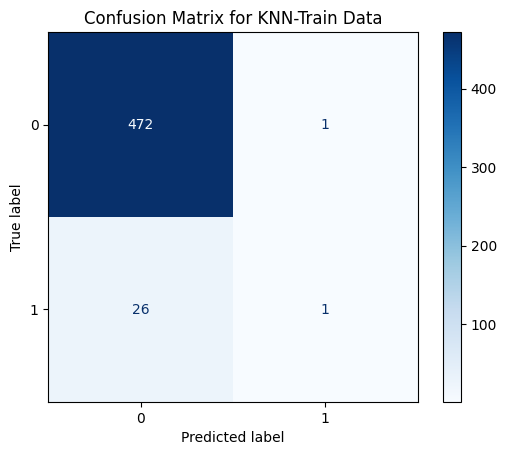

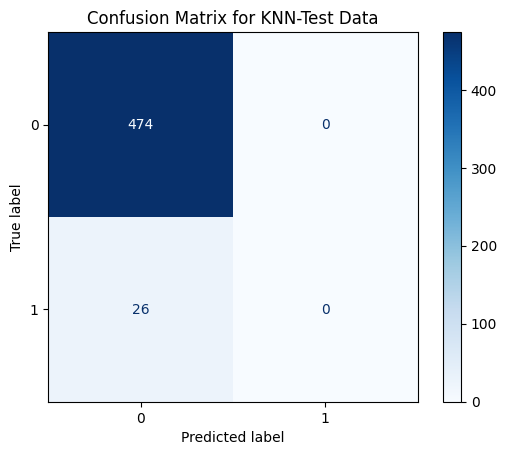

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.94
Misclassification Rate: 0.06
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.99


AUC-ROC: 0.49099318403115866


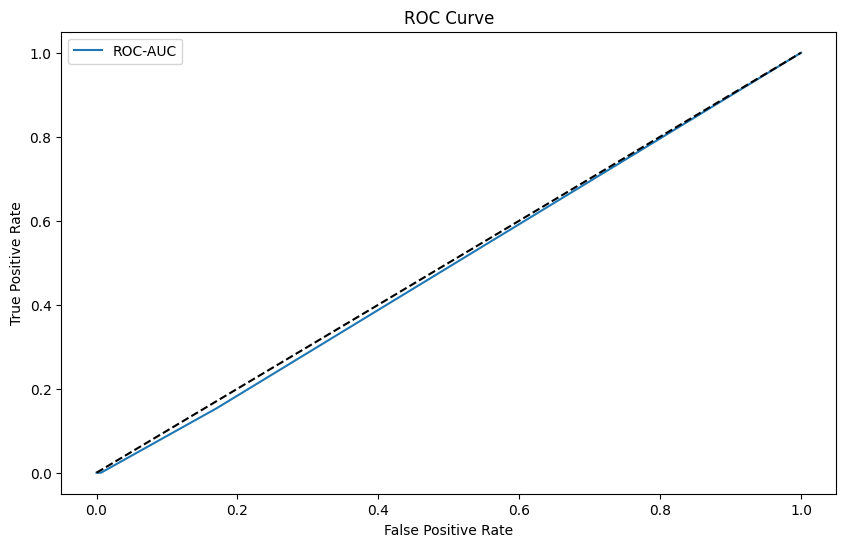

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **99%** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **94%** and **6%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%
*  The AUC of ROC curve arounf 0.49 shows that the model is
guessing every transaction as non fraudulent transaction
as the curver is along the diagonal line





**Comparison of Model Before and After Tuning:**
*  The model was not able to identify any fraudulent transactions using default parameters and after as well
* The **test F1 score** has not been **improved**  when using the tuned hyperparameters

##**Naive Bayes Classifier**

Guassian Naive Bayes classifier is used as the dataset has a mix of categorical and continous variables.

##Default Parameters

In [ ]:
#GaussianNB is initialized from sklearn library
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()

In [ ]:
#Train the model using Gaussian NB Classifier
#Scaling is not required as it is a probabilistic generative classifier
nb_clf.fit(X_train, y_train)
y_pred_train=nb_clf.predict(X_train)
y_pred_test = nb_clf.predict(X_test)

In [ ]:
#Print the Classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       473
           1       0.17      0.04      0.06        27

    accuracy                           0.94       500
   macro avg       0.56      0.51      0.51       500
weighted avg       0.91      0.94      0.92       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       474
           1       0.00      0.00      0.00        26

    accuracy                           0.93       500
   macro avg       0.47      0.49      0.48       500
weighted avg       0.90      0.93      0.91       500

0.06060606060606061
0.0


Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0.06 in train data and 0 in test data as in both cases the model classifies all transactions as non fraudulent transactions

##Hyperparameter Tuning
*  Variable Smoothing - Adding numerical stability

    Another hyperparameter technique is to convert the categorical variables to continous features and that is done in the feature engineering section




In [ ]:
#Creating the parameter space
param_grid= {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a pipeline with Naive Bayes Classifier
#Naive Bayes works on probability so standardization is not required
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
#Initialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1
grid_search_nb = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('nb', GaussianNB())]), n_jobs=-1,
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                               1e-05]},
             scoring='f1')

In [ ]:
#Best parameter combination
grid_search_nb.best_params_

{'nb__var_smoothing': 1e-09}

In [ ]:
#Evaluating the bet parameter combination
best_model = grid_search_nb.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.06060606060606061
Test F1 Score: 0.0


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       473
           1       0.17      0.04      0.06        27

    accuracy                           0.94       500
   macro avg       0.56      0.51      0.51       500
weighted avg       0.91      0.94      0.92       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       474
           1       0.00      0.00      0.00        26

    accuracy                           0.93       500
   macro avg       0.47      0.49      0.48       500
weighted avg       0.90      0.93      0.91       500



*   Evaluation report shows that Naive bayes is **underfitting** as for both train and test data as the model is not able to classify positive class correctly
*   The model is not able to classify **any** of the **fraudulent** transactions in the test data as the test f1 score is 0 and train f1 score is 0.06
*   Thus the model has **high** **bias**

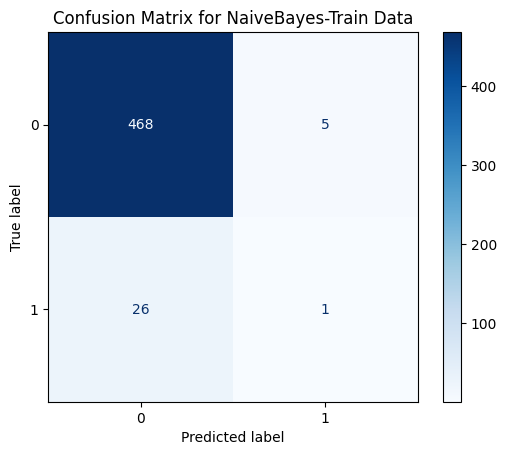

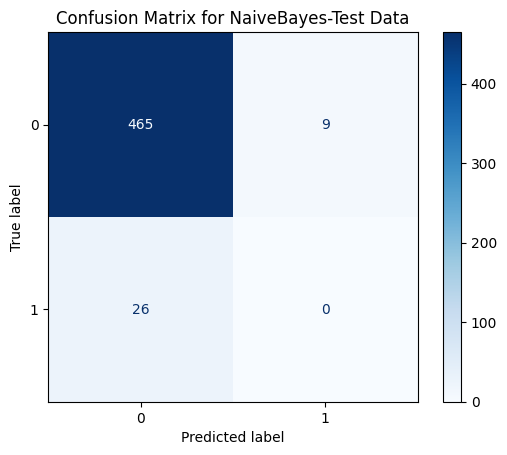

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.93
Misclassification Rate: 0.07
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.02
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.98


AUC-ROC: 0.43614086335605323


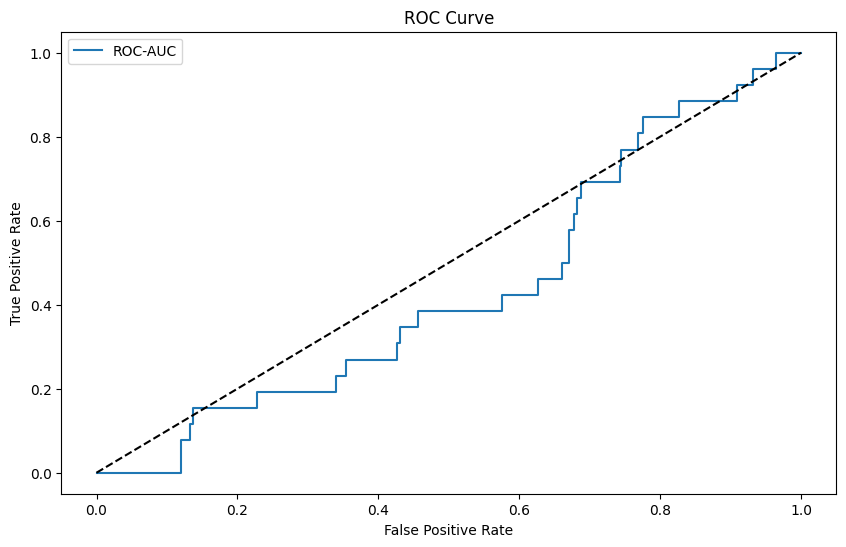

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **98%** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **93%** and **7%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%. Thus the model is predicting  every transaction as non fraud transaction.
*  AUC of ROC curve shows the model is predicting poorly as the model is predicting opposite to the true label.


**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters and after tuning as well in test data.
* The **test F1 score** has not been **improved** when using the tuned hyperparameters

##Ada Boost Classifier - Logistic Regression as Base Estimator

AdaBoost Classifier is tried with Logistic Regression as base estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=42)

In [ ]:
ada_clf.fit(X_train_scaled, y_train)
y_pred_train=ada_clf.predict(X_train_scaled)
y_pred_test = ada_clf.predict(X_test_scaled)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       473
           1       0.00      0.00      0.00        27

    accuracy                           0.94       500
   macro avg       0.47      0.50      0.49       500
weighted avg       0.89      0.94      0.92       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       474
           1       0.00      0.00      0.00        26

    accuracy                           0.94       500
   macro avg       0.47      0.50      0.49       500
weighted avg       0.90      0.94      0.92       500



Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0 in train data and test data as in both train and test data the model classifies all transactions as non fraudulent transactions

##Hyperparameter Tuning
*   N_estimators - Number of boosting rounds
*   Learning rate -Importance/Contribution of each base learner
*  C - Learning rate of base estimator i.e logistic regression
*  Penalty - Type of regularization
*  Class weight -Assigning weight to minority samples for base estimator







In [ ]:
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
    'ada__base_estimator__C': [1.0,0,0.01,0.1,0.001],
    'ada__base_estimator__penalty': ['l2','l1','elasticnet'],
    'ada__base_estimator__class_weight':[None,'balanced']
}


# Create a pipeline with standardization and AdaBoost Classifier
pipeline = Pipeline([
       ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),random_state=45))

])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_ada_v1 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__C': [1.0, 0, 0.01, 0.1, 0.001],
                         'ada__base_estimator__class_weight': [None,
                                                               'balanced'],
                         'ada__base_estimator__penalty': ['l2', 'l1',
                                                          'elasticnet'],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
grid_search_ada_v1.best_params_

{'ada__base_estimator__C': 0.001,
 'ada__base_estimator__class_weight': 'balanced',
 'ada__base_estimator__penalty': 'l2',
 'ada__learning_rate': 0.1,
 'ada__n_estimators': 100}

In [ ]:
best_model = grid_search_ada_v1.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0979020979020979
Test F1 Score: 0.03418803418803419


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       473
           1       0.06      0.26      0.10        27

    accuracy                           0.74       500
   macro avg       0.50      0.51      0.47       500
weighted avg       0.90      0.74      0.81       500

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       474
           1       0.02      0.08      0.03        26

    accuracy                           0.77       500
   macro avg       0.48      0.44      0.45       500
weighted avg       0.89      0.77      0.83       500



*   Evaluation report shows that ada boost is **underfitting** for fraudulent as for both train and test data the model classifies only 26% and 8% of fraud transactions correctly
*  The model is able to classify **77%** of the **non-fraudulent** transactions in test and 81% in train as the true negative rate for both train and test data is high
*   Thus the model has **high** **bias** and **less variance**


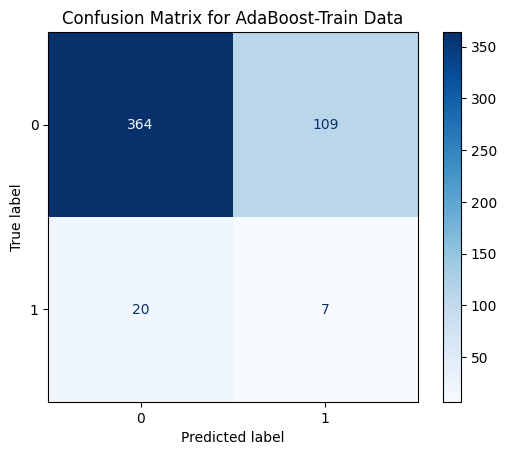

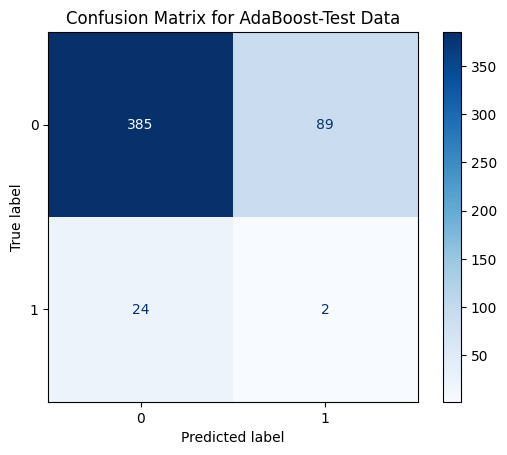

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.02
Recall (TPR): 0.08
F1 Score: 0.03
Accuracy: 0.77
Misclassification Rate: 0.23
True Positive Rate (TPR): 0.08
False Positive Rate (FPR): 0.19
False Negative Rate (FNR): 0.92
True Negative Rate (TNR): 0.81


AUC-ROC: 0.46502758844530995


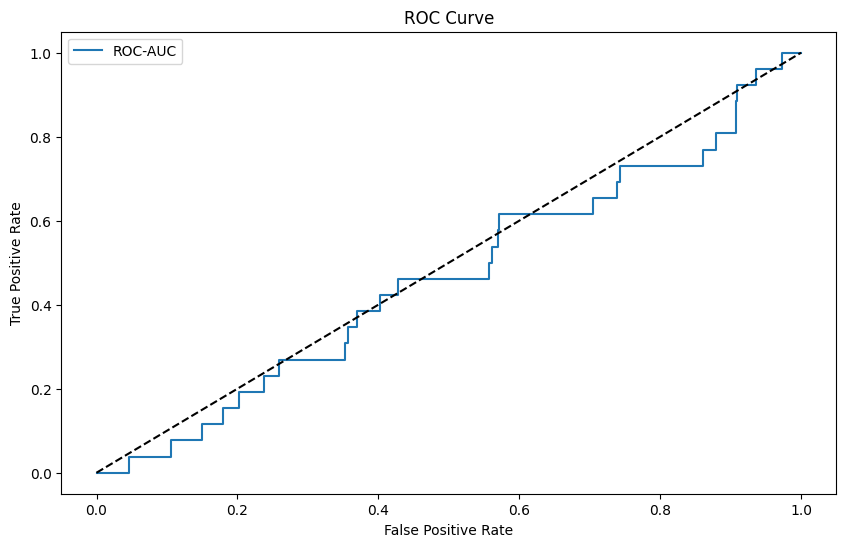

In [ ]:
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **81%** of the **non-fraudulent** transactions correctly but able to classify only **8%** of the **fraudulent** transactions correctly from the test data
*  AUC of ROC curve shows the model is predicting exactly opposite of the true class




**Comparison of Model Before and After Tuning:**
*  The model was not able to identify non-fraudulent transactions using default parameters but after tuning the model is able to classify 81% of the the non-fraud transactions but ability of classifying fraudulent transactions is reduced i.e only 8%
* The **F1 score** has been **improved** from **0%** to **3%** when using the tuned hyperparameters

For all the algorithms model is predicting exactly opposite to the true class and the model does not have enough data to learn in 50-50 split. So 50-50 split is not performing well and not a suitable split

#**Train Test split : 60:40**

In [ ]:
#Column list after removing the inter correlated variables are used
X=categorical_df[column_list2]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 80% for training and 20% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42,stratify=Y)

Data Standardization

In [ ]:
## Normalizing the data using z score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

For the algorithms to converge faster feature scaling is done by z score normalization.
Data Standardization is done after train and test split to avoid data leakage during training.

**Logistic** **Regression**

##Default Parameters

In [ ]:
#Defining Logistic regression function with default parameters from sklearn module
model=LogisticRegression(random_state=45)

In [ ]:
#Fit the model using standardized training data
model.fit(X_train_scaled, y_train)
#Predictions are made using built model on train and test data
y_pred_train=model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
##As it is a classification model - Accuracy, Precision,Recall and F1 score is calculated
## Classification report function of sklearn module is used to print the evaluation metrics
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       568
           1       0.00      0.00      0.00        32

    accuracy                           0.95       600
   macro avg       0.47      0.50      0.49       600
weighted avg       0.90      0.95      0.92       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       379
           1       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400



In [ ]:
## As it is a class imbalance problem, the most appropriate metric to tune is f1 score which balances both precision and recall.
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


Classification report for train and test data shows that the model classifies all transactions as non fraudulent transactions and the model is not able to classify fraudulent transactions as the train and test f1 score is 0.

##Hyperparameter Tuning

Hyperparameters Tuned for Logistic Regression -
*   C - regulaization constant
*   penalty - regularization type (l1,l2,elasticnet)
*   Solver - type of optimization algorithm
*   Class Weight- adding weight to the minority sample






In [ ]:
## Creating the parameter space
##Creating 3 different parameter space as some of the solvers are not consistent with some of the regularization techniques
param_grid_liblinear_saga = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l1','l2'],
    'logisticregression__solver': ['liblinear', 'saga'],  # 'l1' and 'l2' penalty supports 'liblinear' and 'saga'
    # 'logisticregression__max_iter': [100, 200, 300],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_lbfgs_newton_cg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l2',None],
    'logisticregression__solver': ['lbfgs', 'newton-cg','newton-cholesky','sag'],  # 'l2' penalty supports 'lbfgs' and 'newton-cg'
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_elasticnet = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1,10,100],
    'logisticregression__l1_ratio': [0.01, 0.1, 0.5,0.05,0.9,0.09],
    'logisticregression__penalty': ['elasticnet'],
    'logisticregression__solver': ['saga'],  # elasticnet supports only saga solver
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

# Create a pipeline with standardization and logistic regression
# For Logistic regression max iteration is set to 1000 to balance the accuracy and convergence time and random state as 45 to get consisten results
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=1000,random_state=45))
])

#Using Stratified K fold cross validation as the dataset has a huge imbalance in target variable
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV to explore the hyperparameter combinations
# 3 Grid Search is initialized for each of the parameter space
grid_search_liblinear_saga = GridSearchCV(estimator=pipeline,param_grid=param_grid_liblinear_saga,cv=skf,n_jobs=-1,scoring='f1')
grid_search_lbfgs_newton_cg = GridSearchCV(estimator=pipeline,param_grid=param_grid_lbfgs_newton_cg,cv=skf,n_jobs=-1,scoring='f1')
grid_search_elasticnet = GridSearchCV(estimator=pipeline,param_grid=param_grid_elasticnet,cv=skf,n_jobs=-1,scoring='f1')

# Fit the model using GridSearchCV to find the best hyperparameter combination
grid_search_liblinear_saga.fit(X_train, y_train)
grid_search_lbfgs_newton_cg.fit(X_train, y_train)
grid_search_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__l1_ratio': [0.01, 0.1, 0.5, 0.05,
                                                          0.9, 0.09],
                         'logisticregression__penalty': ['elasticnet'],
                         'logisticregression__solver': ['saga']},
             scoring='f1')

In [ ]:
#The best parameter combination obtained from grid search 1 is evaluated using f1 score
best_model = grid_search_liblinear_saga.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.08139534883720931
Test F1 Score: 0.043010752688172046


In [ ]:
#Best parameter combination from Grid search 1
grid_search_liblinear_saga.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'saga'}

In [ ]:
#The best parameter combination obtained from grid search 2 is evaluated using f1 score
best_model = grid_search_lbfgs_newton_cg.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.08139534883720931
Test F1 Score: 0.043010752688172046


In [ ]:
#Best parameter combination from Grid Seach 2
grid_search_lbfgs_newton_cg.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [ ]:
#The best parameter combination obtained from grid search 3 is evaluated using f1 score
best_model = grid_search_elasticnet.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.07954545454545454
Test F1 Score: 0.041237113402061855


In [ ]:
#Best parameter combination from Grid Search 3
grid_search_elasticnet.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__l1_ratio': 0.1,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__solver': 'saga'}

As we have intialized 3 different parameter space for each of the solvers the final best parameter combination is chosen among the 3 grid search using f1 score as the dataset has a huge imbalance. The first and third parameter combination has less bias and less variance than 2nd hyperparameter combination

In [ ]:
##Choose one with the best results from the above three combinations to print the classification report
#For example here grid_search_elasticnet performed better than others
best_model = grid_search_liblinear_saga.best_estimator_

In [ ]:
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred_test = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

In [ ]:
##Calculating the Classification Report of the best parameter combination
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       568
           1       0.05      0.22      0.08        32

    accuracy                           0.74       600
   macro avg       0.50      0.49      0.46       600
weighted avg       0.90      0.74      0.81       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       379
           1       0.03      0.10      0.04        21

    accuracy                           0.78       400
   macro avg       0.48      0.46      0.46       400
weighted avg       0.89      0.78      0.83       400



Evaluation results shows that the model has predicted everything as fraudulent class as with respect to fraudulent class the recall value is 0.22 but with respect to non-fraudulent class the recall is 0.77 for training and for test data (non-fraudulent is 0.82 and fraudulent is 0.10).
The model has a low bias and high variance between the training and test data.

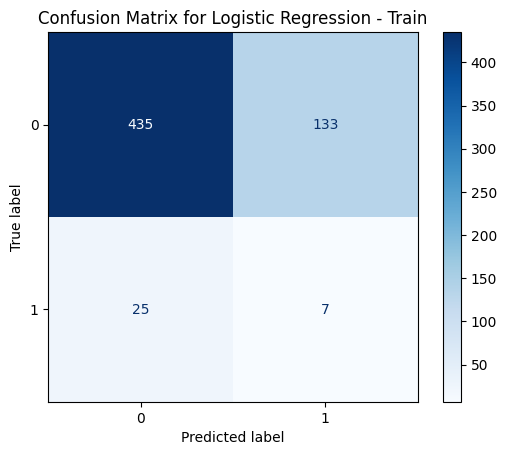

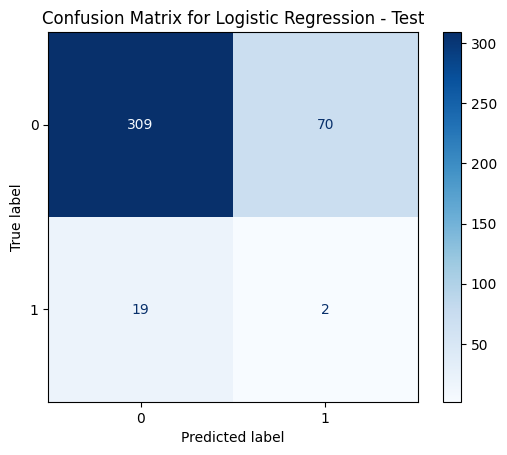

In [ ]:
#Printing the confusion matrix for both training and test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Train')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Test')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.03
Recall (TPR): 0.10
F1 Score: 0.04
Accuracy: 0.78
Misclassification Rate: 0.22
True Positive Rate (TPR): 0.10
False Positive Rate (FPR): 0.18
False Negative Rate (FNR): 0.90
True Negative Rate (TNR): 0.82


AUC-ROC: 0.4587259705993215


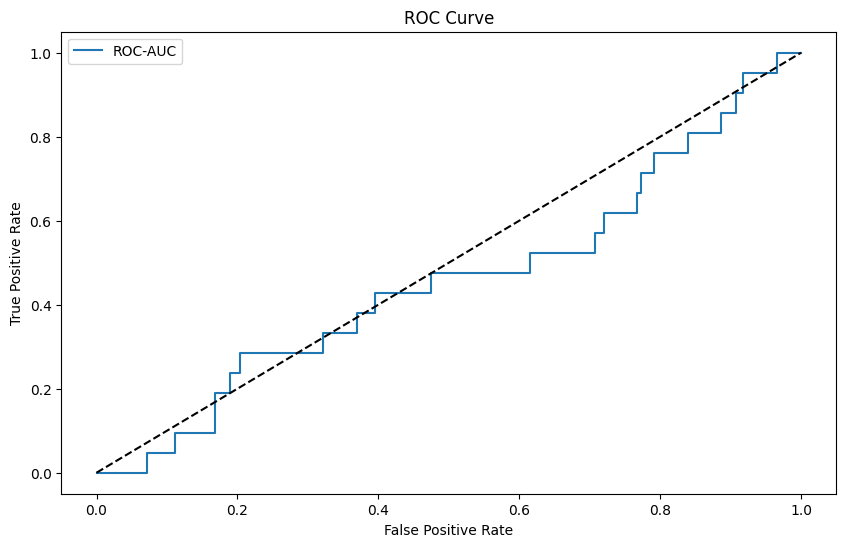

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **82%** of the **non fraudulent** transactions correctly but able to classify **only 10%** of the **fraudulent** transactions correctly from the test data
*   ROC Curve shows the ratio of true positive rate and false
positive rate. AUC of ROC curve of 0.46 shows that model is merely guessing. It is able to classify the non fraudulent transactions and very less identification for fraudulent.

**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 10% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced.
* The **test F1 score** has been **improved** from **0%** to **4%** when using the tuned hyperparameters.

##K Nearest Neighbour

##Default Parameters

In [ ]:
##Initializing K Nearest Neighbors Classifier of scikit learn
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [ ]:
##Fit the model with the scaled data as K Nearest Neighbors is a distance based classifier
knn_clf.fit(X_train_scaled, y_train)
y_pred_train=knn_clf.predict(X_train_scaled)
y_pred_test = knn_clf.predict(X_test_scaled)

In [ ]:
#Show the classification report of training and test data
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       568
           1       0.00      0.00      0.00        32

    accuracy                           0.95       600
   macro avg       0.47      0.50      0.49       600
weighted avg       0.90      0.95      0.92       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       379
           1       0.00      0.00      0.00        21

    accuracy                           0.94       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.94      0.92       400



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


Evaluation metrics on train and test data shows that model is able to classify non fraudulent transactions effectively in train data and test data but unable to classify the fraudulent transactions

##Hyperparameter Tuning
*   N Neignbors - Number of neighbours to be considered while classifying
*   P - Type of norm used in calculating distance. If 1 then manhattan norm 2 - euclidean norm and so on
*   Weights - Type of method used to assign weights to data points (Uniform - all data points have uniform weights, distance - assign weight based on distance)
*   Algorithm - Underlying method used to compute the nearest neighbors

  The metric is chosen as minkowski whereas p is adjusted as 1,2 and so on to specify the norm





In [ ]:
#Creating the parameter space for K Nearest Neighbors
param_grid= {
    'knn__n_neighbors': [3, 5, 7, 10, 15],
    'knn__p': [1,2,3,4],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a pipeline with standardization and K Nearest neighbor Classifier
pipeline = Pipeline([
     ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric='minkowski'))
])
#Intializing Stratified K fold cross validation with folds=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV
grid_search_knn = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [3, 5, 7, 10, 15],
                         'knn__p': [1, 2, 3, 4],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
#best parameter combination from the grid search
grid_search_knn.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 3,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [ ]:
#F1 score for both train and test data
best_model = grid_search_knn.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.16216216216216214
Test F1 Score: 0.0


In [ ]:
#Show the classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       568
           1       0.60      0.09      0.16        32

    accuracy                           0.95       600
   macro avg       0.78      0.55      0.57       600
weighted avg       0.93      0.95      0.93       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       379
           1       0.00      0.00      0.00        21

    accuracy                           0.94       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.90      0.94      0.92       400



Training Data:
The model classifies 99% of non-fraudulent transactions (class 0) correctly, with a recall of 1.00, but it only identifies 9% of fraudulent transactions (class 1), resulting in a recall of 0.09 for this class.
The F1-score for fraudulent transactions is very low at 0.16, showing poor balance between precision and recall.

Test Data:
The model completely fails to classify any fraudulent transactions, with a recall of 0.00 for the fraudulent class.
While the recall for non-fraudulent transactions remains high at 0.99, the model's overall performance for fraud detection is inadequate.


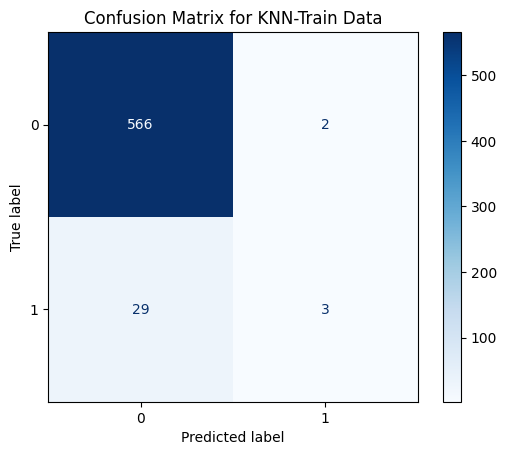

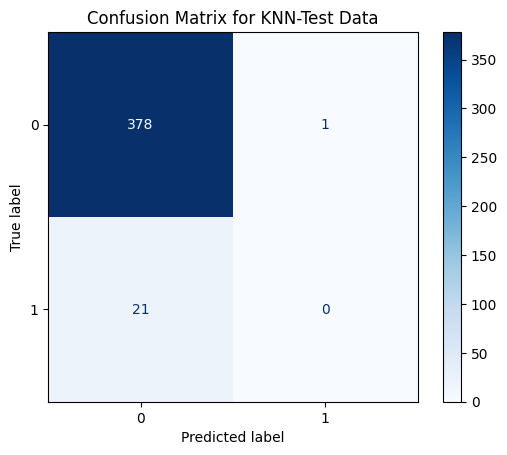

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.94
Misclassification Rate: 0.06
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.99


AUC-ROC: 0.4471039075260712


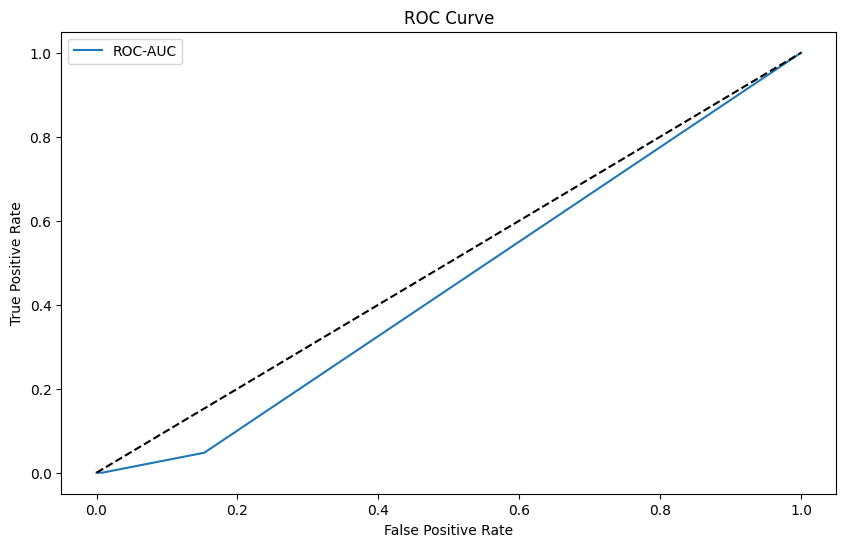

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Precision:** The precision for fraudulent transactions is 0.00, indicating that when the model predicts a transaction as fraudulent, it is always incorrect. This results in a complete failure to flag fraudulent transactions.

**Recall:** A recall of 0.00 on the test data for fraudulent transactions means the model misses all fraud cases. This is a critical shortcoming in a real-world fraud detection scenario.

**Accuracy:** The overall accuracy of 94% is misleading since it mainly reflects the model’s success in predicting non-fraudulent transactions. In the context of fraud detection, this high accuracy is not valuable because it hides the model’s inability to detect the fraudulent cases.

**Misclassification Rate:** The misclassification rate is 6%, but this is primarily due to the overwhelming majority of non-fraudulent transactions being classified correctly, while all fraudulent cases are misclassified.

**AUC-ROC:** The AUC-ROC score of 0.45 shows the model's performance is close to random guessing, which aligns with the fact that the model predicts every transaction as non-fraudulent. This indicates that the model lacks the ability to differentiate between the two classes effectively.

**High Bias and Model Limitations:**
The KNN model, even after hyperparameter tuning, demonstrates high bias towards the majority class (non-fraudulent transactions). This is evident in the complete failure to detect any fraudulent transactions in the test data and the low recall for the fraudulent class in the training data. While the model classifies non-fraudulent transactions almost perfectly, it is essentially ignoring fraudulent ones, as shown by the 100% false negative rate.

**Comparison of Model Performance Before and After Tuning:**

Before Tuning: The model was unable to identify any fraudulent transactions, as indicated by the F1 score of 0.00 for the fraudulent class.

After Tuning: The tuning process did not lead to any improvement in the model’s ability to detect fraudulent transactions. The recall and precision for fraudulent transactions remain at 0.00 on the test set, meaning no fraudulent cases were identified.

##Naive Bayes Classifier

Guassian Naive Bayes classifier is used as the dataset has a mix of categorical and continous variables.

##Default Parameters

In [ ]:
#GaussianNB is initialized from sklearn library
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()

In [ ]:
#Train the model using Gaussian NB Classifier
#Scaling is not required as it is a probabilistic generative classifier
nb_clf.fit(X_train, y_train)
y_pred_train=nb_clf.predict(X_train)
y_pred_test = nb_clf.predict(X_test)

In [ ]:
#Print the Classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       568
           1       0.17      0.03      0.05        32

    accuracy                           0.94       600
   macro avg       0.56      0.51      0.51       600
weighted avg       0.91      0.94      0.92       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       379
           1       0.00      0.00      0.00        21

    accuracy                           0.93       400
   macro avg       0.47      0.49      0.48       400
weighted avg       0.90      0.93      0.91       400

0.05263157894736842
0.0


##Hyperparameter Tuning
*  Variable Smoothing - Adding numerical stability

    Another hyperparameter technique is to convert the categorical variables to continous features and that is done in the feature engineering section




In [ ]:
#Creating the parameter space
param_grid= {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a pipeline with Naive Bayes Classifier
#Naive Bayes works on probability so standardization is not required
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
#Initialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1
grid_search_nb = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('nb', GaussianNB())]), n_jobs=-1,
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                               1e-05]},
             scoring='f1')

In [ ]:
#Best parameter combination
grid_search_nb.best_params_

{'nb__var_smoothing': 1e-09}

In [ ]:
#Evaluating the bet parameter combination
best_model = grid_search_nb.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.05263157894736842
Test F1 Score: 0.0


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       568
           1       0.17      0.03      0.05        32

    accuracy                           0.94       600
   macro avg       0.56      0.51      0.51       600
weighted avg       0.91      0.94      0.92       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       379
           1       0.00      0.00      0.00        21

    accuracy                           0.93       400
   macro avg       0.47      0.49      0.48       400
weighted avg       0.90      0.93      0.91       400



**Training Data:**
The model correctly classifies 99% of non-fraudulent transactions (class 0), as indicated by a recall of 0.99 and an F1-score of 0.97.
However, for fraudulent transactions (class 1), the recall is only 0.03, meaning the model correctly identifies only 3% of the fraud cases. The F1-score for fraudulent transactions is extremely low at 0.05.

**Test Data:**
The model completely fails to classify any fraudulent transactions (class 1) on the test data, with a recall of 0.00 and an F1-score of 0.00.
Although the model achieves a high recall of 0.98 for non-fraudulent transactions (class 0) and an F1-score of 0.96, this leads to skewed overall accuracy.

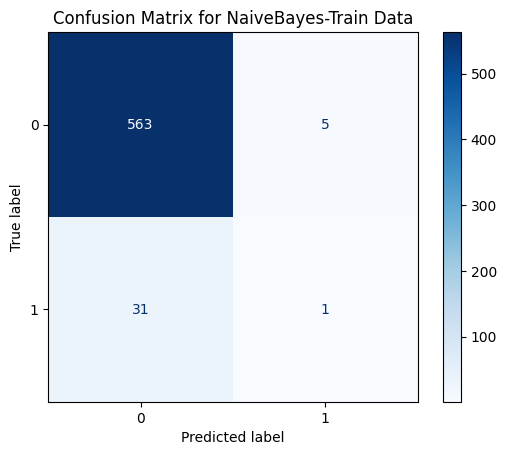

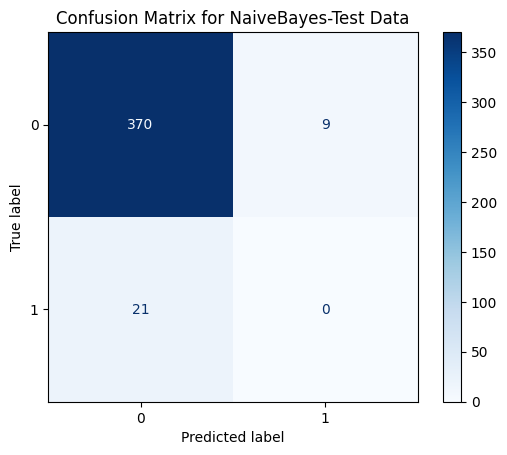

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.93
Misclassification Rate: 0.07
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.02
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.98


AUC-ROC: 0.43007915567282323


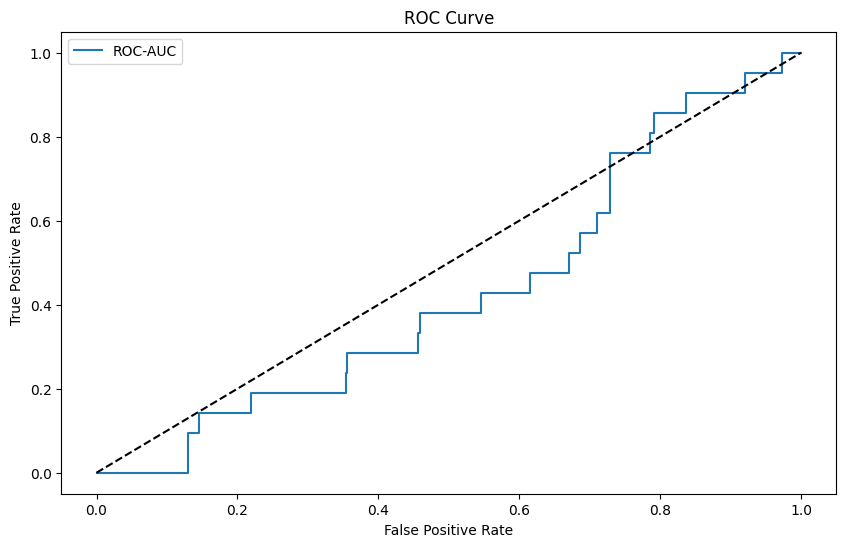

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Precision:** For the fraudulent class (class 1), precision remains 0.00 in both training and test data, indicating that none of the predicted fraudulent transactions are correct. The model heavily favors the non-fraudulent class.

**Recall (True Positive Rate):** A recall of 0.00 for fraudulent transactions on the test set indicates that the model misses all fraudulent transactions. This is highly problematic in fraud detection scenarios where recall (catching fraudulent cases) is more important than precision.

**F1 Score:** The F1 score for the fraudulent class remains 0.00 across both training and test data, signaling an overall failure to balance precision and recall for this class.

**Accuracy:** Despite the model's overall accuracy of 93%, this is misleading because it reflects the model’s high success in classifying non-fraudulent transactions while completely failing to detect fraud.

**Misclassification Rate:** The overall misclassification rate is low at 7%, but again, this does not reflect the model’s inability to detect fraudulent transactions, which is the primary concern.

**False Negative Rate (FNR):** The false negative rate of 100% means the model misses every fraudulent transaction, classifying them all as non-fraudulent.

**True Negative Rate (TNR):** The model performs well for non-fraudulent transactions, with a TNR of 0.98.

**AUC-ROC and Model Performance:**
AUC-ROC Score: The ROC curve’s AUC shows poor performance. With a score close to 0.44, it indicates that the model is not able to distinguish between fraudulent and non-fraudulent transactions, essentially performing as if it were making random guesses.

**Model Prediction Behavior:** The model predicts every transaction as non-fraudulent, which is why the false negative rate is 100% for the fraudulent class. This indicates that the model is heavily biased toward the majority class, leading to poor generalization and underfitting for fraudulent transactions.

**High Bias and Underfitting:**
The model is significantly underfitting the fraudulent class (class 1). The default Naive Bayes model is unable to classify any fraudulent transactions correctly, and this behavior persists even after hyperparameter tuning. This suggests that the model is not learning sufficient patterns to identify fraud, likely due to class imbalance and limitations in the Naive Bayes algorithm for this type of problem.



**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters and after tuning as well.
* The **F1 score** has not been **improved** when using the tuned hyperparameters

##Ada Boost Classifier - Logistic Regression as Base Estimator

AdaBoost Classifier is tried with Logistic Regression as base estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=42)

In [ ]:
ada_clf.fit(X_train_scaled, y_train)
y_pred_train=ada_clf.predict(X_train_scaled)
y_pred_test = ada_clf.predict(X_test_scaled)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       568
           1       0.50      0.03      0.06        32

    accuracy                           0.95       600
   macro avg       0.72      0.51      0.52       600
weighted avg       0.92      0.95      0.92       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       379
           1       0.00      0.00      0.00        21

    accuracy                           0.94       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.94      0.92       400



##Hyperparameter Tuning
*   N_estimators - Number of boosting rounds
*   Learning rate -Importance/Contribution of each base learner
*  C - Learning rate of base estimator i.e logistic regression
*  Penalty - Type of regularization
*  Class weight -Assigning weight to minority samples for base estimator







In [ ]:
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
    'ada__base_estimator__C': [1.0,0,0.01,0.1,0.001],
    'ada__base_estimator__penalty': ['l2','l1','elasticnet'],
    'ada__base_estimator__class_weight':[None,'balanced']
}


# Create a pipeline with standardization and AdaBoost Classifier
pipeline = Pipeline([
       ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),random_state=45))

])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_ada_v1 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__C': [1.0, 0, 0.01, 0.1, 0.001],
                         'ada__base_estimator__class_weight': [None,
                                                               'balanced'],
                         'ada__base_estimator__penalty': ['l2', 'l1',
                                                          'elasticnet'],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
grid_search_ada_v1.best_params_

{'ada__base_estimator__C': 1.0,
 'ada__base_estimator__class_weight': 'balanced',
 'ada__base_estimator__penalty': 'l2',
 'ada__learning_rate': 0.01,
 'ada__n_estimators': 200}

In [ ]:
best_model = grid_search_ada_v1.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.09696969696969697
Test F1 Score: 0.044444444444444446


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       568
           1       0.06      0.25      0.10        32

    accuracy                           0.75       600
   macro avg       0.50      0.51      0.48       600
weighted avg       0.90      0.75      0.82       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       379
           1       0.03      0.10      0.04        21

    accuracy                           0.79       400
   macro avg       0.49      0.46      0.46       400
weighted avg       0.89      0.79      0.84       400




Certainly! Here are the justifications for each title based on the provided classification reports:

Evaluation Report Shows That AdaBoost
The evaluation of the AdaBoost model reveals several key insights:

Precision for the positive class is very low at 0.03 in the test data, indicating that when the model predicts the positive class, it is rarely correct.

Recall (True Positive Rate) for the positive class is 0.10, meaning that the model is only capturing 10% of the actual positive cases.

The F1 Score for the positive class is 0.04, which reflects poor performance in terms of balancing precision and recall for the positive class.

Accuracy of 0.79 suggests that the model performs relatively well overall but is skewed by the dominance of the negative class.

AUC-ROC of 0.464 indicates that the model's ability to distinguish between the positive and negative classes is almost random, providing little value in binary classification tasks.

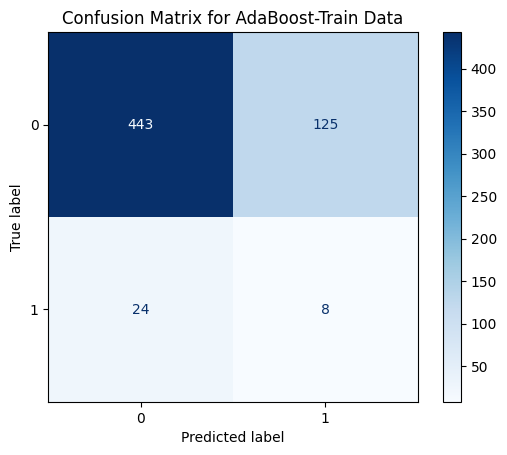

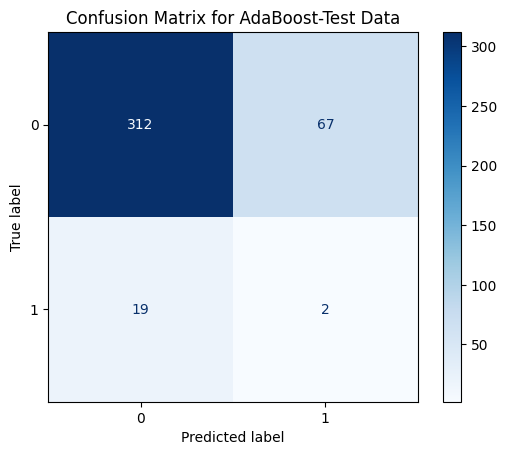

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.03
Recall (TPR): 0.10
F1 Score: 0.04
Accuracy: 0.79
Misclassification Rate: 0.21
True Positive Rate (TPR): 0.10
False Positive Rate (FPR): 0.18
False Negative Rate (FNR): 0.90
True Negative Rate (TNR): 0.82


AUC-ROC: 0.46475687900490015


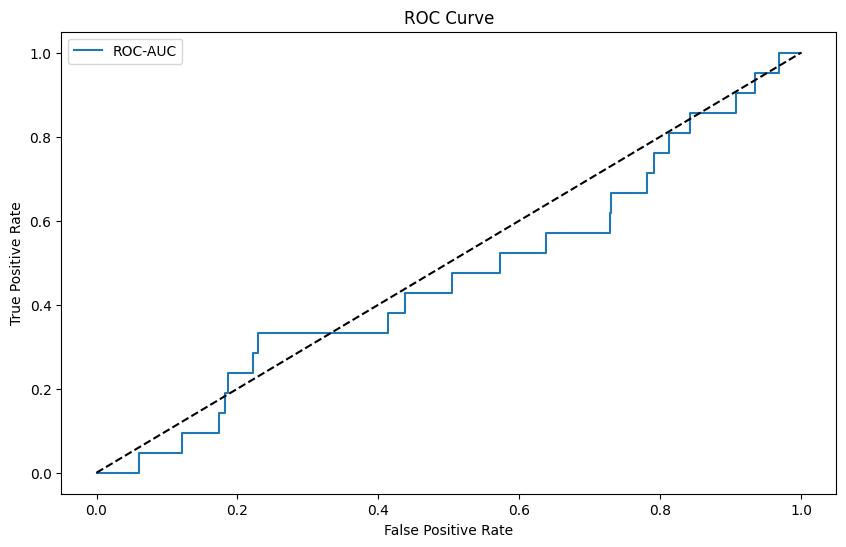

In [ ]:
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of Best Parameters Obtained from Grid Search**
After applying Grid Search to fine-tune the AdaBoost model, the following observations were made:

Precision and Recall for the positive class remained very low (0.03 and 0.10, respectively), indicating that the best parameters found did not substantially improve the model's performance on the positive class.

The F1 Score for the positive class is still very low at 0.04, showing that there was minimal improvement in balancing precision and recall.

The overall Accuracy of 0.79 suggests that the model maintains a high accuracy rate due to the high proportion of negative class instances but does not address the issues in identifying positive cases.

AUC-ROC of 0.464 confirms that the model's ability to discriminate between classes remains almost at random levels despite parameter tuning.

**Comparison of Model Before and After Tuning**
Comparing the AdaBoost model before and after parameter tuning reveals the following:

Before Tuning:
Precision for the positive class was 0.06, and Recall was 0.25, with an F1 Score of 0.10.
The model showed an overall Accuracy of 0.75, with an AUC-ROC of 0.464.

After Tuning:
Precision for the positive class dropped slightly to 0.03, and Recall decreased to 0.10, with an F1 Score of 0.04.
The overall Accuracy improved to 0.79, and the AUC-ROC remained nearly the same at 0.464.
* The **F1 score** has been **improved** from **0%** to **4%** when using the tuned hyperparameters

##Tree Based Models

In [ ]:
#Using the column list before removing features with inter correlation as tree based models are not affected by the intercorrelation
X=categorical_df[column_list]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 80% for training and 20% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42,stratify=Y)

## **Decision Tree Classifier**




In [ ]:
##Initializing the Decision Tree Classifier of sklearn library
model=DecisionTreeClassifier(random_state=45)
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       568
           1       1.00      1.00      1.00        32

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       379
           1       0.00      0.00      0.00        21

    accuracy                           0.90       400
   macro avg       0.47      0.48      0.47       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.0


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies all transactions as non fraudulent transactions

##Hyperparamter Tuning
*   Criterion - Criteria for measuring the quality of split (entropy or gini)
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a internal node
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Class weight - Assigning weight to minority samples(passed as dictionary mentioning the weight of each class)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
#Creating the parameter space

param_grid= {
    'classifier__criterion': ['gini', 'entropy'],          # Criterion for measuring quality of splits
    'classifier__max_depth': [5, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10,15],            # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4,5],              # Minimum number of samples required to be at a leaf node
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]#Class weight can be passed as dictionary mentioning the weight of each class
}


# Create a pipeline with Decision Tree Classifier
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=45))
])
#Intialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV and the metric to be tuned=f1
grid_search_dt = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=45))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, {0: 1, 1: 50},
                                                      'balanced',
                                                      {0: 1, 1: 100},
                                                      {0: 1, 1: 1000}],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 10, 20, 30, 40, 50],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 5],
                         'classifier__min_samples_split': [2, 5, 10, 15]},
             scoring='f1')

In [ ]:
from sklearn.metrics import f1_score
best_model = grid_search_dt.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.5714285714285714
Test F1 Score: 0.044444444444444446


In [ ]:
grid_search_dt.best_params_

{'classifier__class_weight': None,
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 10}

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       568
           1       0.82      0.44      0.57        32

    accuracy                           0.96       600
   macro avg       0.90      0.72      0.78       600
weighted avg       0.96      0.96      0.96       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       379
           1       0.04      0.05      0.04        21

    accuracy                           0.89       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.90      0.89      0.90       400



*   Evaluation report shows that decision tree is able to classify both able to classify fraud and non fraud transactions
*   The model is able to classify **94%** of the **non fraudulent** transactions in test data and **99%** in training data
*   The model is able to classify **5%** of the **fraudulent** transactions in test data and **44%** transactions in training data
*   Thus the model has **high** **variance** as it fails to classify fraudulent transactions effectively in test data






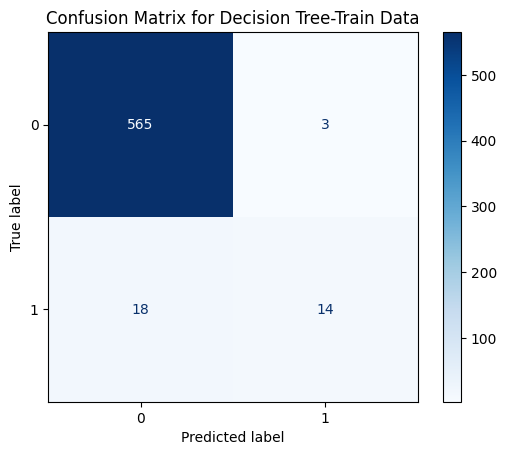

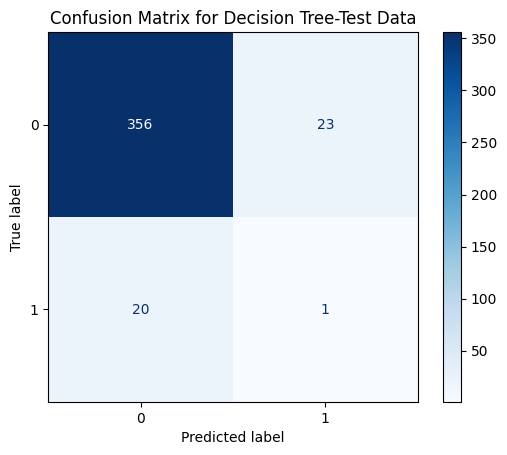

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.04
Recall (TPR): 0.05
F1 Score: 0.04
Accuracy: 0.89
Misclassification Rate: 0.11
True Positive Rate (TPR): 0.05
False Positive Rate (FPR): 0.06
False Negative Rate (FNR): 0.95
True Negative Rate (TNR): 0.94


AUC-ROC: 0.48906897851488884


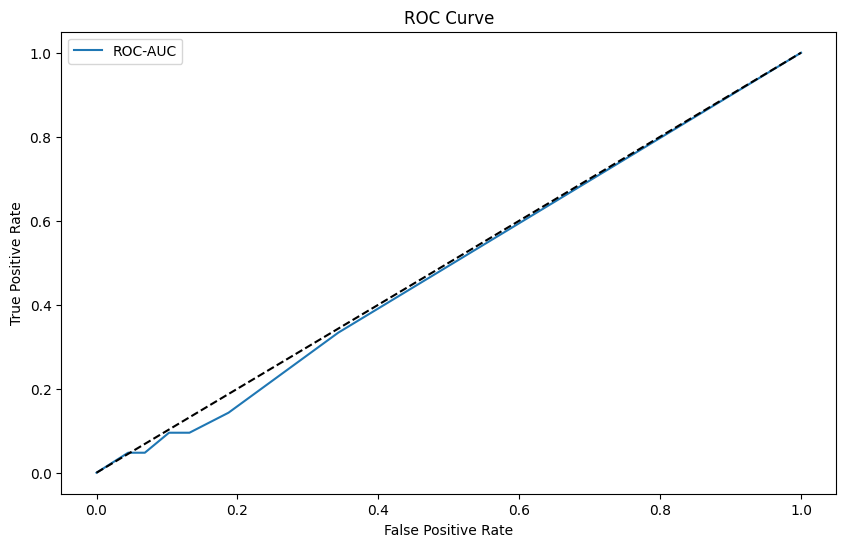

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **94%** of the **non fraudulent** transactions correctly but classifies only **5%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **89%** and **11%** but the classifier is not able to maximise the classification fraudulent transactions as the false negative rate is around **95%**
*  AUC of ROC curve shows the model is not able to effectvely **differentiate** the fraudulent and non fraudulent transactions and the model is  randomly guessing. The model performs **poor** as the curve is along the diagonal line






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 5% of the the fraud transactions
* The **test F1 score** has been **improved** from **0%** to **5%** when using the tuned hyperparameters



## **Random Forest Classifier**

In [ ]:
#Initializing random Forest classifier of sklearn
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=45)

In [ ]:
rf_clf.fit(X_train, y_train)
y_pred_train=rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       568
           1       1.00      1.00      1.00        32

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       379
           1       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.0


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies all transactions as non fraudulent transactions

##Hyperparameter Tuning
*   N_Estimators- Number of decision trees to be built
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a split
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Bootstrap - Sampling with/without replacement while creating subset of data for each base tree
*   Class weight - assigning weight to minority samples









In [ ]:
#Setting the parameter space for hyperparameter tuning
#RandomizedSearchCV is used as the number of hyperparameter combinations is very high so the model takes more time when using GridSearch
#Trying a subset of hyperparameter combinations using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid= {
    'rf__n_estimators': [50,100,200],
    'rf__max_depth': [5,10, 15,20],
    'rf__min_samples_split': [2,5,8,10,11],
    'rf__min_samples_leaf':[1,2,3,4,5],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__bootstrap': [True, False],
    'rf__class_weight':[None,'balanced',{0:1,1:100},{0:1,1:1000}]
}

# Create a pipeline with Random Forest Classifier
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=45))
])
#Initialize Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV with metric to be tuned as f1
grid_search_rf = RandomizedSearchCV(estimator=pipeline,param_distributions=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('rf',
                                              RandomForestClassifier(random_state=45))]),
                   n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__class_weight': [None, 'balanced',
                                                             {0: 1, 1: 100},
                                                             {0: 1, 1: 1000}],
                                        'rf__max_depth': [5, 10, 15, 20],
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'rf__min_samples_split': [2, 5, 8, 10,
                                                                  11],
                                        'rf__n_estimators': [50, 100, 200]},
                   scoring='f1')

In [ ]:
#Best parameter combination
grid_search_rf.best_params_

{'rf__n_estimators': 200,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 4,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 5,
 'rf__class_weight': {0: 1, 1: 100},
 'rf__bootstrap': True}

In [ ]:
#Evaluating the best parameter combination
best_model = grid_search_rf.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.2206896551724138
Test F1 Score: 0.11940298507462686


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       568
           1       0.12      1.00      0.22        32

    accuracy                           0.62       600
   macro avg       0.56      0.80      0.49       600
weighted avg       0.95      0.62      0.72       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.96      0.56      0.70       379
           1       0.07      0.57      0.12        21

    accuracy                           0.56       400
   macro avg       0.51      0.56      0.41       400
weighted avg       0.91      0.56      0.67       400



*   Evaluation report shows that random forest is **underfitting** as for both train and test data the model is not able to classify non fraudulent transactions effectively
*   The model is able to classify only **60%** of the **non fraudulent** transactions in test data and **56%** in training data and both train and test precision is low
*   The model is able to classify **57%** of the **fraudulent** transactions in test data and **all** transactions in training data as both train and test f1 recall is high
*   Thus the model has **high** **bias** and **less** **variance**






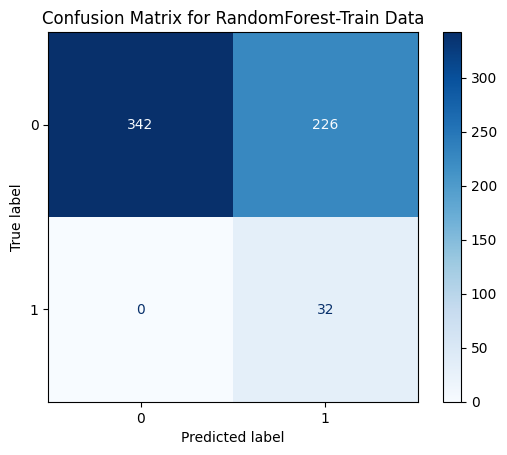

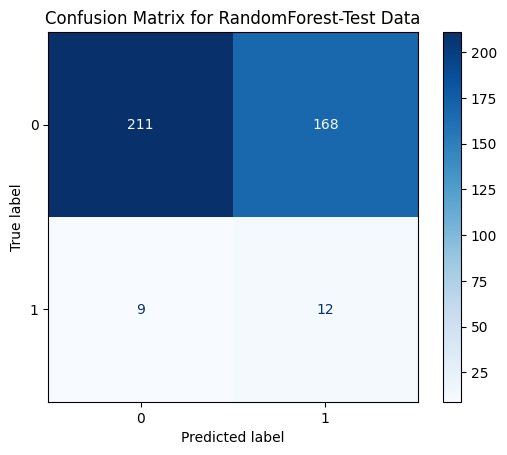

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.07
Recall (TPR): 0.57
F1 Score: 0.12
Accuracy: 0.56
Misclassification Rate: 0.44
True Positive Rate (TPR): 0.57
False Positive Rate (FPR): 0.44
False Negative Rate (FNR): 0.43
True Negative Rate (TNR): 0.56


AUC-ROC: 0.5641412237718306


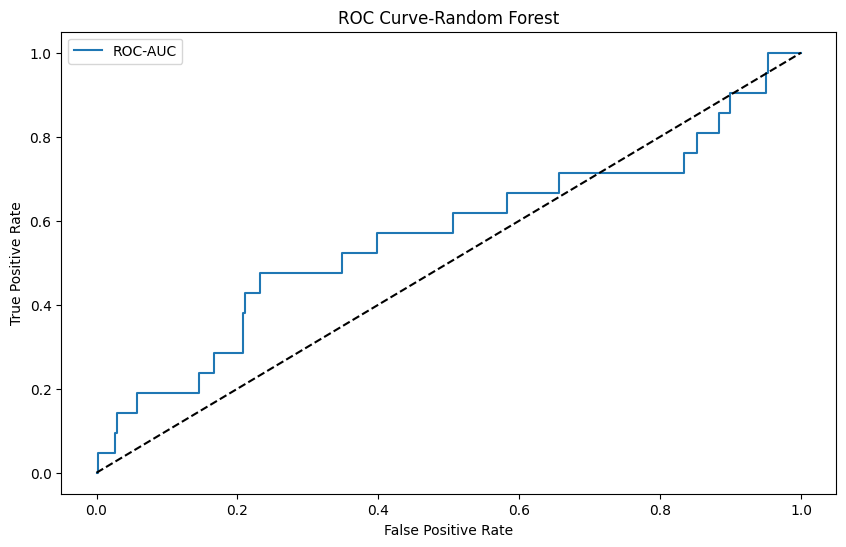

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Random Forest')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **56%** of the **non fraudulent** transactions correctly and able to classify **57%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the F1 score is high than other models i.e **57%** but the classifier is not able to maximise the classification of non fraudulent transactions as the false positive rate is around **44%**
*  AUC of ROC curve shows the model is able to **differentiate** the fraudulent and non fraudulent transactions **very** **less** but the model is not randomly guessing as  the curve shows it is **not** a **diagonal** line. The model performs **better** when **FPR** is below **0.6** compared to other values of FPR






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 57% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e 56%
* The **test F1 score** has been **improved** from **0%** to **12%** when using the tuned hyperparameters



## **AdaBoost Classifier**

###**Default** **parameters**

In [ ]:
#AdaBoost Classifier with decision tree as base model for the boosting rounds
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
#Training the model
ada_clf.fit(X_train, y_train)
y_pred_train=ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       568
           1       1.00      1.00      1.00        32

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       379
           1       0.04      0.05      0.04        21

    accuracy                           0.89       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.90      0.89      0.89       400



Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0.04 and  in test data as in test data the model classifies Most of the transactions as non fraudulent transactions

###**Hyperparameter** **Tuning**
*   N_estimators- Number of boosting rounds
*   Learning rate - Importance/Contribution of each base estimator
*   Max depth of base model - Depth of each tree in each boosting round
*   Split criterion for base model- Split criteria to be used in the base decision tree for each boosting round
*   Class weight for base model - Assign weight to minority samples in the base model







In [ ]:
##Creating the parameter space for the ada boost algorithm
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
     'ada__base_estimator__max_depth': [2,3,4,5],
     'ada__base_estimator__criterion': ['gini', 'entropy'],
    'ada__base_estimator__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]
}


# Create a pipeline with AdaBoost Classifier. Standardization is not required for tree based model
pipeline = Pipeline([
      # ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),random_state=45))

])
#Initializing Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1 score
grid_search_ada_v2 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ada',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__class_weight': [None,
                                                               {0: 1, 1: 50},
                                                               'balanced',
                                                               {0: 1, 1: 100},
                                                               {0: 1, 1: 1000}],
                         'ada__base_estimator__criterion': ['gini', 'entropy'],
                         'ada__base_estimator__max_depth': [2, 3, 4, 5],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
#Best parameter combinations
grid_search_ada_v2.best_params_

{'ada__base_estimator__class_weight': {0: 1, 1: 50},
 'ada__base_estimator__criterion': 'entropy',
 'ada__base_estimator__max_depth': 2,
 'ada__learning_rate': 2.0,
 'ada__n_estimators': 50}

In [ ]:
#Evaluating the best hyperparameter combination
best_model = grid_search_ada_v2.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.9032258064516129
Test F1 Score: 0.0


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       568
           1       0.93      0.88      0.90        32

    accuracy                           0.99       600
   macro avg       0.96      0.94      0.95       600
weighted avg       0.99      0.99      0.99       600

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       379
           1       0.00      0.00      0.00        21

    accuracy                           0.92       400
   macro avg       0.47      0.49      0.48       400
weighted avg       0.90      0.92      0.91       400



*   Evaluation report shows that ada boost is **overfitting** the train data as the model classifies positive and negative class correctly in training data but not in test data
*   The model is anot ble to classify any of the **fraudulent** transactions and the test f1 score is very low compared to train f1 score
*   Thus the model has **high** **variance** and less bias






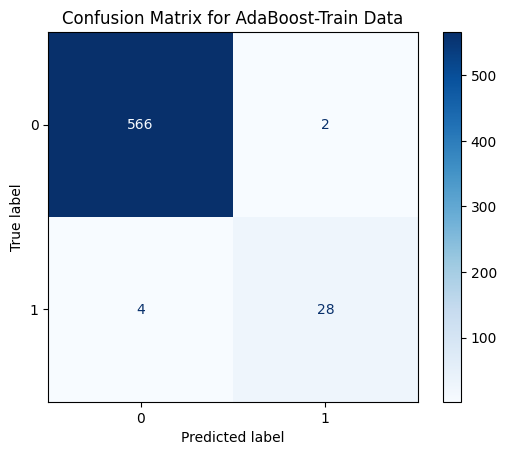

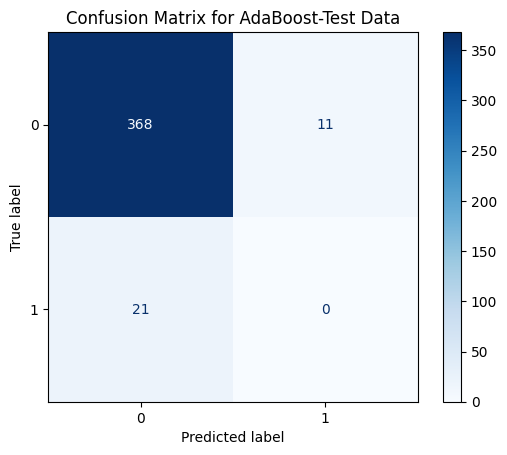

In [ ]:
##Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.92
Misclassification Rate: 0.08
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.03
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.97


AUC-ROC: 0.5176529714788289


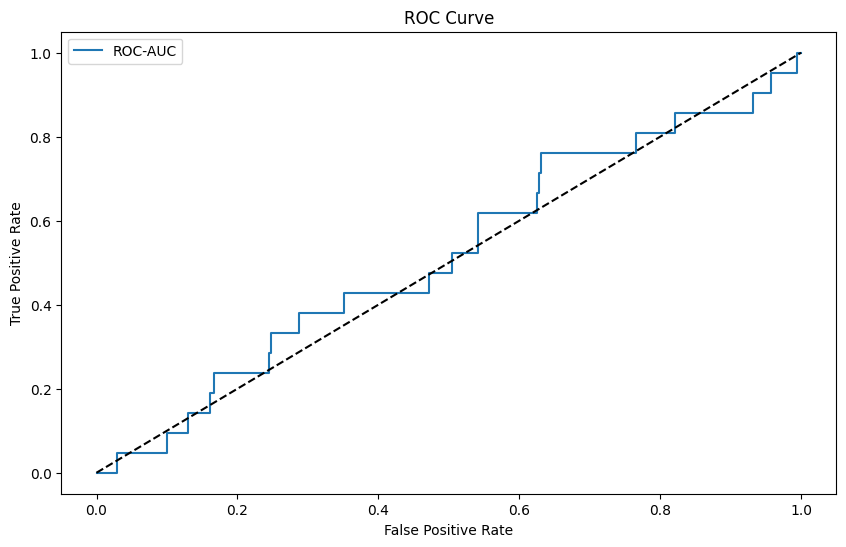

In [ ]:
##ROC CURVE
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')
#Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **97%** of the **non fraudulent** transactions correctly but not able to classify any of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **92%** and **8%** but the classifier is not able to maximise the classification of fraudulent transactions as the false negative rate is 100%
*  AUC of ROC curve shows the model is not able to perfectly **differentiate** the fraudulent and non fraudulent transactions and the model is randomly guessing as AUC is around 0.5.






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but even after tuning the model is not able to classify the fraud transactions but the classification of non fraud is reduced by 3%
* The **test F1 score** has not **improved** when using the tuned hyperparameters



**Overall Performance:**  **-Comparing All algorithms**
*  Comparing all algorithms **Random Forest** performed well less bias and less variance than other models.
*  **AUC** of ROC curve of **0.56** shows that model is performing slightly better than other models
*  Eventhough the accuracy is low(0.77) and misclassification rate is high(0.23) but the false postive rate and false negative rate is very less than others(0.44 and 0.43)
*   The model is able to classify **57%** of the **fraud** transactions and **56%** of the **non fraud** transactions






#**Train Test split : 90-10**

In [ ]:
#Column list after removing the inter correlated variables are used
X=categorical_df[column_list2]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 90% for training and 10% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42,stratify=Y)

Data Standardization

In [ ]:
## Normalizing the data using z score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

For the algorithms to converge faster feature scaling is done by z score normalization.
Data Standardization is done after train and test split to avoid data leakage during training.

##**Logistic** **Regression**

###**Default Parameters**

In [ ]:
#Defining Logistic regression function with default parameters from sklearn module
model=LogisticRegression(random_state=45)

In [ ]:
#Fit the model using standardized training data
model.fit(X_train_scaled, y_train)
#Predictions are made using built model on train and test data
y_pred_train=model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
##As it is a classification model - Accuracy, Precision,Recall and F1 score is calculated
## Classification report function of sklearn module is used to print the evaluation metrics
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       852
           1       0.00      0.00      0.00        48

    accuracy                           0.95       900
   macro avg       0.47      0.50      0.49       900
weighted avg       0.90      0.95      0.92       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



In [ ]:
## As it is a class imbalance problem, the most appropriate metric to tune is f1 score which balances both precision and recall.
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.0
0.0


Classification report for train and test data shows that the model classifies all transactions as non fraudulent transactions and the model is not able to classify fraudulent transactions as the train and test f1 score is 0.

###**Hyperparameter Tuning**

Hyperparameters Tuned for Logistic Regression -
*   C - regulaization constant
*   penalty - regularization type (l1,l2,elasticnet)
*   Solver - type of optimization algorithm
*   Class Weight- adding weight to the minority sample






In [ ]:
## Creating the parameter space
##Creating 3 different parameter space as some of the solvers are not consistent with some of the regularization techniques
param_grid_liblinear_saga = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l1','l2'],
    'logisticregression__solver': ['liblinear', 'saga'],  # 'l1' and 'l2' penalty supports 'liblinear' and 'saga'
    # 'logisticregression__max_iter': [100, 200, 300],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_lbfgs_newton_cg = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l2',None],
    'logisticregression__solver': ['lbfgs', 'newton-cg','newton-cholesky','sag'],  # 'l2' penalty supports 'lbfgs' and 'newton-cg'
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

param_grid_elasticnet = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1,10,100],
    'logisticregression__l1_ratio': [0.01, 0.1, 0.5,0.05,0.9,0.09],
    'logisticregression__penalty': ['elasticnet'],
    'logisticregression__solver': ['saga'],  # elasticnet supports only saga solver
    # 'logisticregression__max_iter': [100, 200, 300,400,500],
    'logisticregression__class_weight': [None, 'balanced']
}

# Create a pipeline with standardization and logistic regression
# For Logistic regression max iteration is set to 1000 to balance the accuracy and convergence time and random state as 45 to get consisten results
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=1000,random_state=45))
])

#Using Stratified K fold cross validation as the dataset has a huge imbalance in target variable
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV to explore the hyperparameter combinations
# 3 Grid Search is initialized for each of the parameter space
grid_search_liblinear_saga = GridSearchCV(estimator=pipeline,param_grid=param_grid_liblinear_saga,cv=skf,n_jobs=-1,scoring='f1')
grid_search_lbfgs_newton_cg = GridSearchCV(estimator=pipeline,param_grid=param_grid_lbfgs_newton_cg,cv=skf,n_jobs=-1,scoring='f1')
grid_search_elasticnet = GridSearchCV(estimator=pipeline,param_grid=param_grid_elasticnet,cv=skf,n_jobs=-1,scoring='f1')

# Fit the model using GridSearchCV to find the best hyperparameter combination
grid_search_liblinear_saga.fit(X_train, y_train)
grid_search_lbfgs_newton_cg.fit(X_train, y_train)
grid_search_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__l1_ratio': [0.01, 0.1, 0.5, 0.05,
                                                          0.9, 0.09],
                         'logisticregression__penalty': ['elasticnet'],
                         'logisticregression__solver': ['saga']},
             scoring='f1')

In [ ]:
#The best parameter combination obtained from grid search 1 is evaluated using f1 score
best_model = grid_search_liblinear_saga.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.10126582278481014
Test F1 Score: 0.09523809523809523


In [ ]:
#Best parameter combination from Grid search 1
grid_search_liblinear_saga.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

In [ ]:
#The best parameter combination obtained from grid search 2 is evaluated using f1 score
best_model = grid_search_lbfgs_newton_cg.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.06177606177606178
Test F1 Score: 0.0909090909090909


In [ ]:
#Best parameter combination from Grid Seach 2
grid_search_lbfgs_newton_cg.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'sag'}

In [ ]:
#The best parameter combination obtained from grid search 3 is evaluated using f1 score
best_model = grid_search_elasticnet.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)


print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0
Test F1 Score: 0.0


In [ ]:
#Best parameter combination from Grid Search 3
grid_search_elasticnet.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__l1_ratio': 0.1,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__solver': 'saga'}

As we have intialized 3 different parameter space for each of the solvers the final best parameter combination is chosen among the 3 grid search using f1 score as the dataset has a huge imbalance. The first and second parameter combination has less bias and less variance than 3rd hyperparameter combination

In [ ]:
##Choose one with the best results from the above three combinations to print the classification report
#For example here grid_search_elasticnet performed better than others
best_model = grid_search_liblinear_saga.best_estimator_

In [ ]:
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred_test = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

In [ ]:
##Calculating the Classification Report of the best parameter combination
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       852
           1       0.05      1.00      0.10        48

    accuracy                           0.05       900
   macro avg       0.03      0.50      0.05       900
weighted avg       0.00      0.05      0.01       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.05      1.00      0.10         5

    accuracy                           0.05       100
   macro avg       0.03      0.50      0.05       100
weighted avg       0.00      0.05      0.00       100



Evaluation results shows that the model has predicted everything as fraudulent class as with respect to fraudulent class the recall value is 1 but with respect to non-fraudulent class the recall is 0 for both training and test data.
The model has a high bias and less variance between the training and test data as the f1 score for both train and test data is around 0.10.

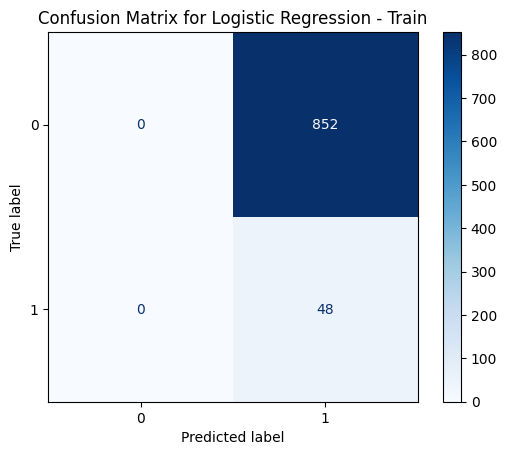

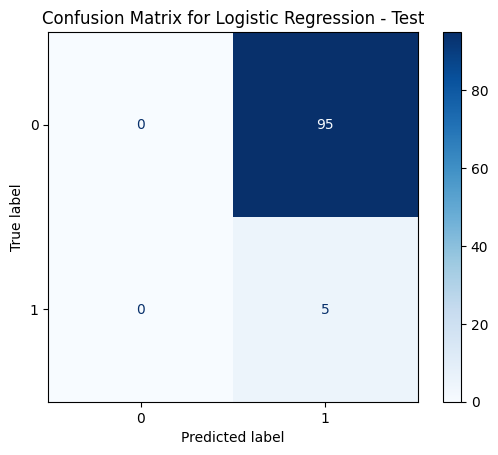

In [ ]:
#Printing the confusion matrix for both training and test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Train')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression - Test')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.05
Recall (TPR): 1.00
F1 Score: 0.10
Accuracy: 0.05
Misclassification Rate: 0.95
True Positive Rate (TPR): 1.00
False Positive Rate (FPR): 1.00
False Negative Rate (FNR): 0.00
True Negative Rate (TNR): 0.00


AUC-ROC: 0.5


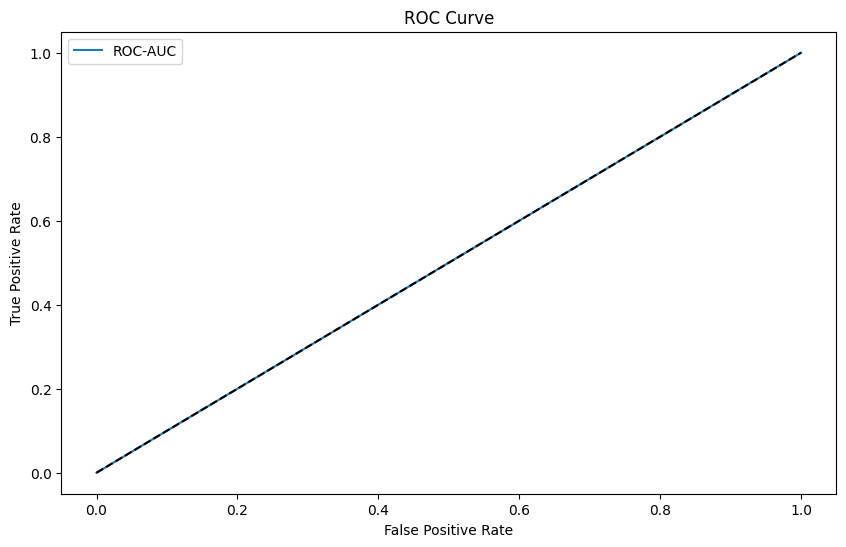

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is not able to classify **any** of the **non fraudulent** transactions correctly but able to classify **all** of the **fraudulent** transactions correctly from the test data
*   Eventhough the Recall is high i.e **100%** but the classifier is not able to classify non fraudulent transactions as the false positive rate is **100%**
*   ROC Curve shows the ratio of true positive rate and false
positive rate. AUC of ROC curve of 0.5 shows that model is merely guessing. It is not able to classify the non fraudulent transactions and guessing all transactions as fraudulent transactions

**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 100% of the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e not able to classify any non fraud transaction
* The **test F1 score** has been **improved** from **0%** to **10%** when using the tuned hyperparameters

##**K Nearest Neighbour**

###**Default Parameters**

In [ ]:
##Initializing K Nearest Neighbors Classifier of scikit learn
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [ ]:
##Fit the model with the scaled data as K Nearest Neighbors is a distance based classifier
knn_clf.fit(X_train_scaled, y_train)
y_pred_train=knn_clf.predict(X_train_scaled)
y_pred_test = knn_clf.predict(X_test_scaled)

In [ ]:
#Show the classification report of training and test data
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       852
           1       1.00      0.02      0.04        48

    accuracy                           0.95       900
   macro avg       0.97      0.51      0.51       900
weighted avg       0.95      0.95      0.92       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

0.04081632653061225
0.0


Evaluation metrics on train and test data shows that model is able to classify non fraudulent transactions effectively in train data and test data but unable to classify the fraudulent transactions

###**Hyperparameter Tuning**
*   N Neignbors - Number of neighbours to be considered while classifying
*   P - Type of norm used in calculating distance. If 1 then manhattan norm 2 - euclidean norm and so on
*   Weights - Type of method used to assign weights to data points (Uniform - all data points have uniform weights, distance - assign weight based on distance)
*   Algorithm - Underlying method used to compute the nearest neighbors

  The metric is chosen as minkowski whereas p is adjusted as 1,2 and so on to specify the norm





In [ ]:
#Creating the parameter space for K Nearest Neighbors
param_grid= {
    'knn__n_neighbors': [3, 5, 7, 10, 15],
    'knn__p': [1,2,3,4],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a pipeline with standardization and K Nearest neighbor Classifier
pipeline = Pipeline([
     ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric='minkowski'))
])
#Intializing Stratified K fold cross validation with folds=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing GridSearchCV
grid_search_knn = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [3, 5, 7, 10, 15],
                         'knn__p': [1, 2, 3, 4],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
#best parameter combination from the grid search
grid_search_knn.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 3,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [ ]:
#F1 score for both train and test data
best_model = grid_search_knn.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.14545454545454545
Test F1 Score: 0.0


In [ ]:
#Show the classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       852
           1       0.57      0.08      0.15        48

    accuracy                           0.95       900
   macro avg       0.76      0.54      0.56       900
weighted avg       0.93      0.95      0.93       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.94       100
   macro avg       0.47      0.49      0.48       100
weighted avg       0.90      0.94      0.92       100



The above best hyperparameter combination of KNN model is able to classify non fraudulent transactions in both train and test data but is unable to classify fraudulent transactions in test data and only 8% in train data. Thus the model has high bias  

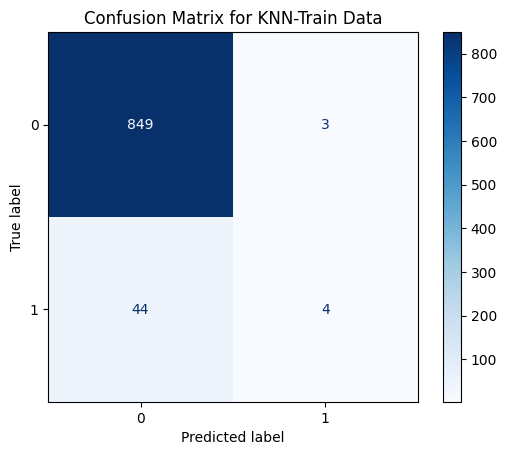

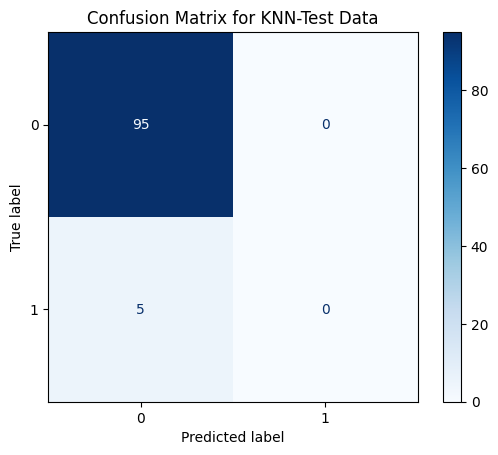

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNN-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")


Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.94
Misclassification Rate: 0.06
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.01
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 0.99


AUC-ROC: 0.5147368421052632


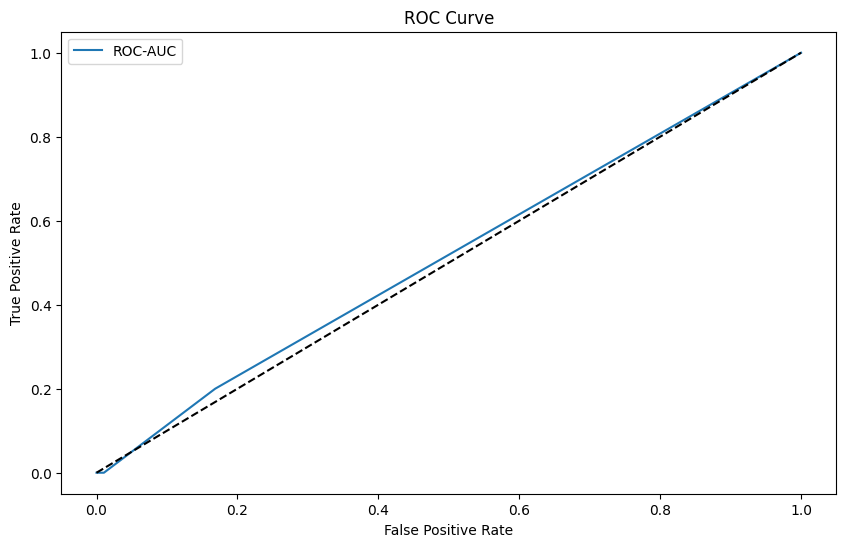

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import   ConfusionMatrixDisplay
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **99%** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **94%** and **6%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%
*  The AUC of ROC curve around 0.5 shows that the model is
guessing every transaction as non fraudulent transaction
as the curver is along the diagonal line





**Comparison of Model Before and After Tuning:**
*  The model was not able to identify any fraudulent transactions using default parameters and after as well
* The **test F1 score** has not been **improved**  when using the tuned hyperparameters

##**Naive Bayes Classifier**

Guassian Naive Bayes classifier is used as the dataset has a mix of categorical and continous variables.

###**Default Parameters**

In [ ]:
#GaussianNB is initialized from sklearn library
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()

In [ ]:
#Train the model using Gaussian NB Classifier
#Scaling is not required as it is a probabilistic generative classifier
nb_clf.fit(X_train, y_train)
y_pred_train=nb_clf.predict(X_train)
y_pred_test = nb_clf.predict(X_test)

In [ ]:
#Print the Classification report
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       852
           1       0.00      0.00      0.00        48

    accuracy                           0.95       900
   macro avg       0.47      0.50      0.49       900
weighted avg       0.90      0.95      0.92       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100

0.0
0.0


Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0 in both train data and test data as in both cases the model classifies all transactions as non fraudulent transactions

###**Hyperparameter Tuning**
*  Variable Smoothing - Adding numerical stability

    Another hyperparameter technique is to convert the categorical variables to continous features and that is done in the feature engineering section




In [ ]:
#Creating the parameter space
param_grid= {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a pipeline with Naive Bayes Classifier
#Naive Bayes works on probability so standardization is not required
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
#Initialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1
grid_search_nb = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('nb', GaussianNB())]), n_jobs=-1,
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                               1e-05]},
             scoring='f1')

In [ ]:
#Best parameter combination
grid_search_nb.best_params_

{'nb__var_smoothing': 1e-09}

In [ ]:
#Evaluating the bet parameter combination
best_model = grid_search_nb.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.0
Test F1 Score: 0.0


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       852
           1       0.00      0.00      0.00        48

    accuracy                           0.95       900
   macro avg       0.47      0.50      0.49       900
weighted avg       0.90      0.95      0.92       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



*   Evaluation report shows that Naive bayes is **underfitting** as for both train and test data as the model is not able to classify positive class correctly
*   The model is not able to classify **any** of the **fraudulent** transactions as the test f1 score and train f1 score is 0
*   Thus the model has **high** **bias**

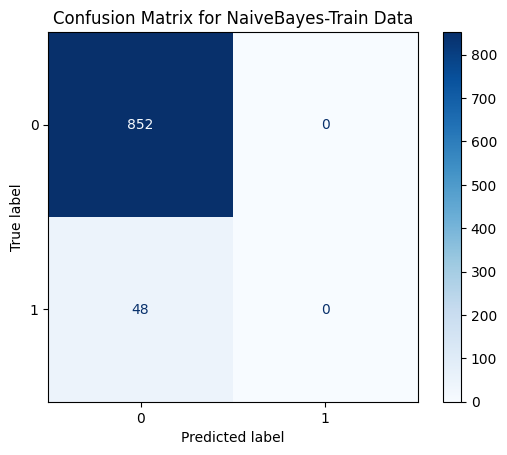

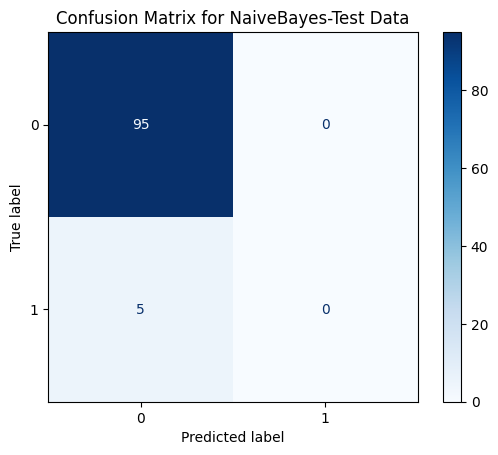

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for NaiveBayes-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")



Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.95
Misclassification Rate: 0.05
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 1.00


AUC-ROC: 0.3663157894736842


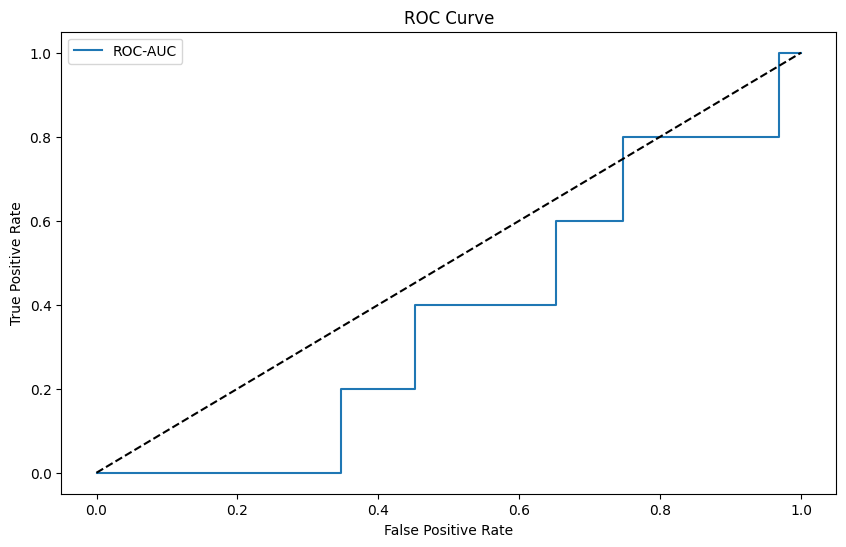

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **all** of the **non fraudulent** transactions correctly but not able to classify **any** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is high and misclassification rate is low i.e **95%** and **5%** but the classifier is not able to classify the fraudulent transactions as the false negative rate is around 100%. Thus the model is predicting  every transaction as non fraud transaction.
*  AUC of ROC curve shows the model is predicting poorly as the model is predicting opposite to the true label.


**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters and after tuning as well.
* The **F1 score** has not been **improved** when using the tuned hyperparameters

##**Ada Boost Classifier - Logistic Regression as Base Estimator**

AdaBoost Classifier is tried with Logistic Regression as base estimator

###**Default Parameters**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=42)

In [ ]:
ada_clf.fit(X_train_scaled, y_train)
y_pred_train=ada_clf.predict(X_train_scaled)
y_pred_test = ada_clf.predict(X_test_scaled)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       852
           1       0.00      0.00      0.00        48

    accuracy                           0.95       900
   macro avg       0.47      0.50      0.49       900
weighted avg       0.90      0.95      0.92       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



Training the model using default parameters shows that the model has very high bias. As the model has a f1 score of 0 in train data and test data as in both train and test data the model classifies all transactions as non fraudulent transactions

###**Hyperparameter Tuning**
*   N_estimators - Number of boosting rounds
*   Learning rate -Importance/Contribution of each base learner
*  C - Learning rate of base estimator i.e logistic regression
*  Penalty - Type of regularization
*  Class weight -Assigning weight to minority samples for base estimator







In [ ]:
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
    'ada__base_estimator__C': [1.0,0,0.01,0.1,0.001],
    'ada__base_estimator__penalty': ['l2','l1','elasticnet'],
    'ada__base_estimator__class_weight':[None,'balanced']
}


# Create a pipeline with standardization and AdaBoost Classifier
pipeline = Pipeline([
       ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),random_state=45))

])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_ada_v1 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=LogisticRegression(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__C': [1.0, 0, 0.01, 0.1, 0.001],
                         'ada__base_estimator__class_weight': [None,
                                                               'balanced'],
                         'ada__base_estimator__penalty': ['l2', 'l1',
                                                          'elasticnet'],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
grid_search_ada_v1.best_params_

{'ada__base_estimator__C': 0.001,
 'ada__base_estimator__class_weight': 'balanced',
 'ada__base_estimator__penalty': 'l2',
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 50}

In [ ]:
best_model = grid_search_ada_v1.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.1094391244870041
Test F1 Score: 0.0898876404494382


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       0.96      0.25      0.39       852
           1       0.06      0.83      0.11        48

    accuracy                           0.28       900
   macro avg       0.51      0.54      0.25       900
weighted avg       0.91      0.28      0.38       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.94      0.16      0.27        95
           1       0.05      0.80      0.09         5

    accuracy                           0.19       100
   macro avg       0.49      0.48      0.18       100
weighted avg       0.89      0.19      0.26       100



*   Evaluation report shows that ada boost is **underfitting** as for both train and test data the model classifies only 25% and 16% of non fraud transactions correctly
*   The model is able to classify **80%** of the **fraudulent** transactions in test and 83% in train as the recall for both train and test data is high
*   Thus the model has **high** **bias** and **less variance**


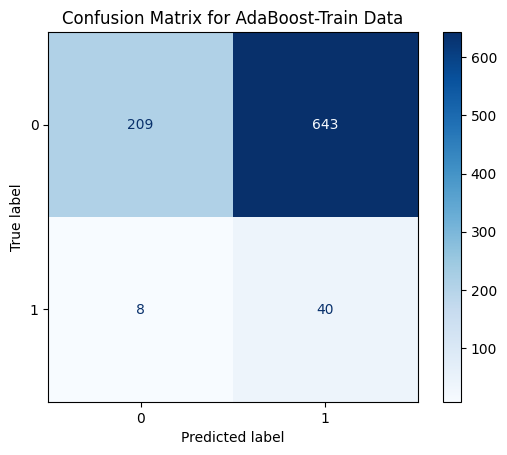

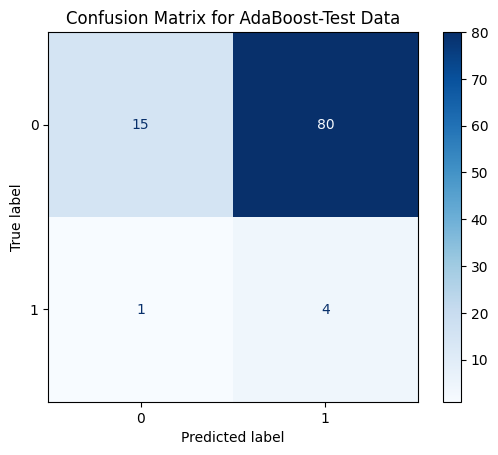

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.05
Recall (TPR): 0.80
F1 Score: 0.09
Accuracy: 0.19
Misclassification Rate: 0.81
True Positive Rate (TPR): 0.80
False Positive Rate (FPR): 0.84
False Negative Rate (FNR): 0.20
True Negative Rate (TNR): 0.16


AUC-ROC: 0.5557894736842106


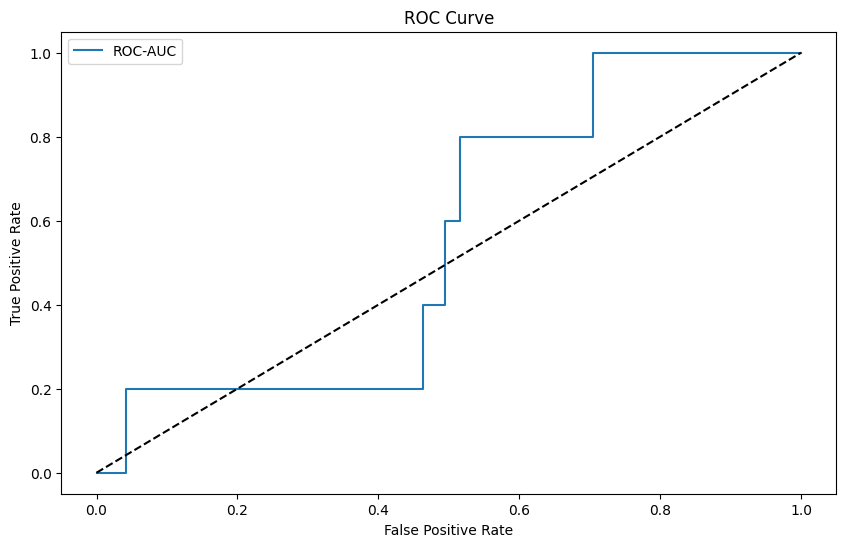

In [ ]:
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **80%** of the **fraudulent** transactions correctly but able to classify only **16%** of the **non  fraudulent** transactions correctly from the test data
*   Eventhough the Recall is high i.e **80%** but the classifier is not able to maximise the classification of non fraudulent transactions as the false positive rate is around **84%**
*  AUC of ROC curve shows the model is able to **differentiate** the fraudulent and non fraudulent transactions **very** **less** but the model is not randomly guessing as  the curve shows it is **not** a **diagonal** line.




**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 80% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e only 16%
* The **F1 score** has been **improved** from **0%** to **9%** when using the tuned hyperparameters

##**Tree Based Models**

In [ ]:
#Using the column list before removing features with inter correlation as tree based models are not affected by the intercorrelation
X=categorical_df[column_list]
Y=categorical_df['Is Fraudulent']

In [ ]:
## Splitting the data into train and test - 90% for training and 10% for testing.
## As from EDA the dataset has a huge imbalance between the classes so stratify option is set to Y
## -- to use stratified random sampling in splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42,stratify=Y)

## **Decision Tree Classifier**


###**Default Parameters**

In [ ]:
##Initializing the Decision Tree Classifier of sklearn library
model=DecisionTreeClassifier(random_state=45)
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00        48

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        95
           1       0.00      0.00      0.00         5

    accuracy                           0.88       100
   macro avg       0.47      0.46      0.47       100
weighted avg       0.90      0.88      0.89       100



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.0


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies all transactions as non fraudulent transactions

###**Hyperparamter Tuning**
*   Criterion - Criteria for measuring the quality of split (entropy or gini)
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a internal node
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Class weight - Assigning weight to minority samples(passed as dictionary mentioning the weight of each class)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
#Creating the parameter space

param_grid= {
    'classifier__criterion': ['gini', 'entropy'],          # Criterion for measuring quality of splits
    'classifier__max_depth': [5, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10,15],            # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4,5],              # Minimum number of samples required to be at a leaf node
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]#Class weight can be passed as dictionary mentioning the weight of each class
}


# Create a pipeline with Decision Tree Classifier
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=45))
])
#Intialize Stratified K fold cross validation with folds as 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV and the metric to be tuned=f1
grid_search_dt = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=45))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, {0: 1, 1: 50},
                                                      'balanced',
                                                      {0: 1, 1: 100},
                                                      {0: 1, 1: 1000}],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 10, 20, 30, 40, 50],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 5],
                         'classifier__min_samples_split': [2, 5, 10, 15]},
             scoring='f1')

In [ ]:
from sklearn.metrics import f1_score
best_model = grid_search_dt.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.2532981530343008
Test F1 Score: 0.04347826086956522


In [ ]:
grid_search_dt.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__max_features': 'log2',
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 2}

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       852
           1       0.15      1.00      0.25        48

    accuracy                           0.69       900
   macro avg       0.57      0.83      0.53       900
weighted avg       0.95      0.69      0.77       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.93      0.58      0.71        95
           1       0.02      0.20      0.04         5

    accuracy                           0.56       100
   macro avg       0.48      0.39      0.38       100
weighted avg       0.89      0.56      0.68       100



*   Evaluation report shows that decision tree is able to classify both fraud and non fraud transactions effectively than other models
*   The model is able to classify **58%** of the **non fraudulent** transactions in test data and **67%** in training data and both train and test f1 score is high compared to other algorithms
*   The model is able to classify **only 20%** of the **fraudulent** transactions in test data and able to classify **all** of the **fraudulent** transactions in training data.






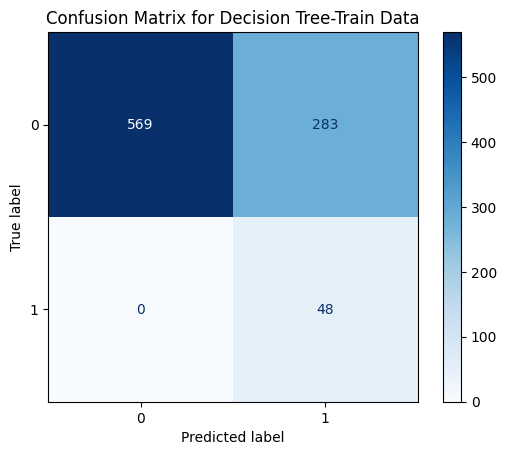

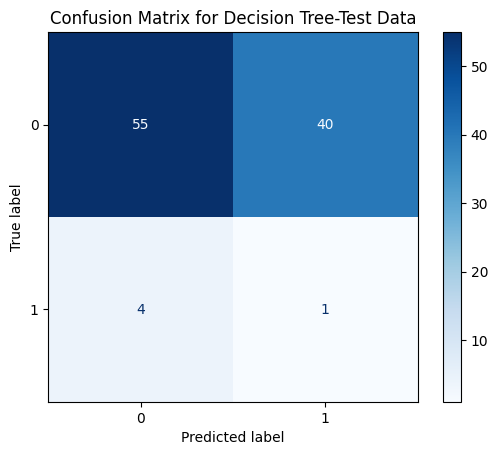

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.02
Recall (TPR): 0.20
F1 Score: 0.04
Accuracy: 0.56
Misclassification Rate: 0.44
True Positive Rate (TPR): 0.20
False Positive Rate (FPR): 0.42
False Negative Rate (FNR): 0.80
True Negative Rate (TNR): 0.58


AUC-ROC: 0.4273684210526316


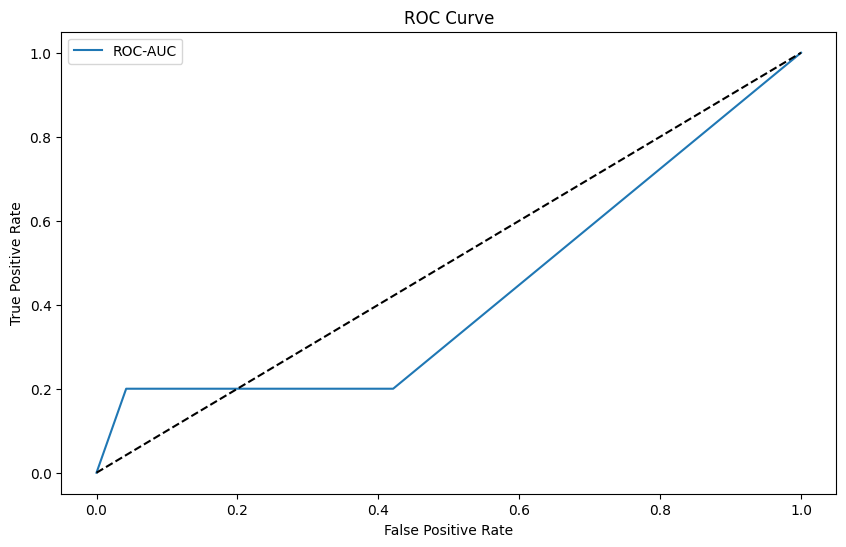

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **58%** of the **non fraudulent** transactions correctly and able to classify only **20%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the accuracy is low and misclassification rate is high i.e **56%** and **44%** but the classifier is not able to maximise the classification of both fraudulent and non fraudulent transactions as the false negative rate is around **80%** and the false positive rate is only **42%**
*  AUC of ROC curve shows the model is precit opposite to the diagonal line, so the model prediction is in poor performance






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify only 20% of the fraud transactions as it very less.


## **Random Forest Classifier**

###**Default Parameters**

In [ ]:
#Initializing random Forest classifier of sklearn
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=45)

In [ ]:
rf_clf.fit(X_train, y_train)
y_pred_train=rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00        48

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_test,y_pred_test))

1.0
0.0


Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but 0 in test data as in test data the model classifies all transactions as non fraudulent transactions

###**Hyperparameter Tuning**
*   N_Estimators- Number of decision trees to be built
*   Max_depth - Maximum depth of each decision tree
*   Min_samples_split-Minimum samples required to make a split
*   Min_samples_leaf- Minimum samples required to be a leaf node
*   Max_features - Number of features to be considered for split
*   Bootstrap - Sampling with/without replacement while creating subset of data for each base tree
*   Class weight - assigning weight to minority samples









In [ ]:
#Setting the parameter space for hyperparameter tuning
#RandomizedSearchCV is used as the number of hyperparameter combinations is very high so the model takes more time when using GridSearch
#Trying a subset of hyperparameter combinations using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid= {
    'rf__n_estimators': [50,100,200],
    'rf__max_depth': [5,10, 15,20],
    'rf__min_samples_split': [2,5,8,10,11],
    'rf__min_samples_leaf':[1,2,3,4,5],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__bootstrap': [True, False],
    'rf__class_weight':[None,'balanced',{0:1,1:100},{0:1,1:1000}]
}

# Create a pipeline with Random Forest Classifier
pipeline = Pipeline([
    #  ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=45))
])
#Initialize Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV with metric to be tuned as f1
grid_search_rf = RandomizedSearchCV(estimator=pipeline,param_distributions=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('rf',
                                              RandomForestClassifier(random_state=45))]),
                   n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__class_weight': [None, 'balanced',
                                                             {0: 1, 1: 100},
                                                             {0: 1, 1: 1000}],
                                        'rf__max_depth': [5, 10, 15, 20],
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'rf__min_samples_split': [2, 5, 8, 10,
                                                                  11],
                                        'rf__n_estimators': [50, 100, 200]},
                   scoring='f1')

In [ ]:
#Best parameter combination
grid_search_rf.best_params_

{'rf__n_estimators': 100,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 2,
 'rf__max_features': 'log2',
 'rf__max_depth': 10,
 'rf__class_weight': {0: 1, 1: 1000},
 'rf__bootstrap': True}

In [ ]:
#Evaluating the best parameter combination
best_model = grid_search_rf.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 0.1794392523364486
Test F1 Score: 0.10169491525423728


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      0.48      0.65       852
           1       0.10      1.00      0.18        48

    accuracy                           0.51       900
   macro avg       0.55      0.74      0.42       900
weighted avg       0.95      0.51      0.63       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.96      0.46      0.62        95
           1       0.06      0.60      0.10         5

    accuracy                           0.47       100
   macro avg       0.51      0.53      0.36       100
weighted avg       0.91      0.47      0.60       100



*   Evaluation report shows that random forest is **underfitting** as for both train and test data the model is not able to classify non fraudulent transactions effectively
*   The model is able to classify only **46%** of the **non fraudulent** transactions in test data and **48%** in training data
*   The model is able to classify **60%** of the **fraudulent** transactions in test data and **all** transactions in training data as both train and test recall is high
*   Thus the model has **high** **bias** and **less** **variance**






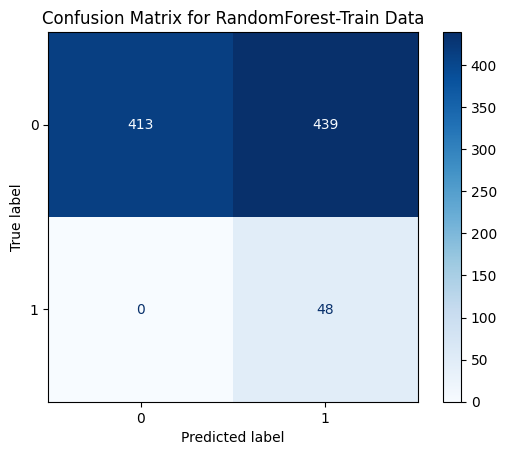

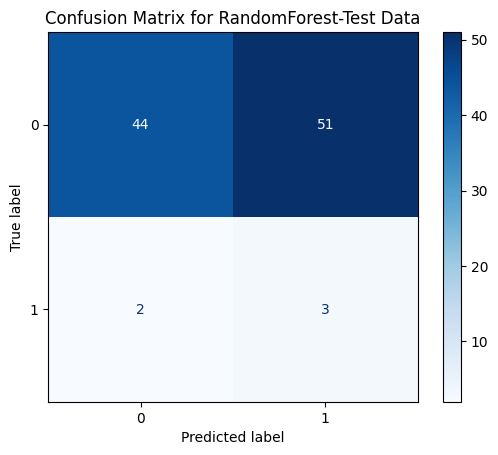

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for RandomForest-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.06
Recall (TPR): 0.60
F1 Score: 0.10
Accuracy: 0.47
Misclassification Rate: 0.53
True Positive Rate (TPR): 0.60
False Positive Rate (FPR): 0.54
False Negative Rate (FNR): 0.40
True Negative Rate (TNR): 0.46


AUC-ROC: 0.4294736842105263


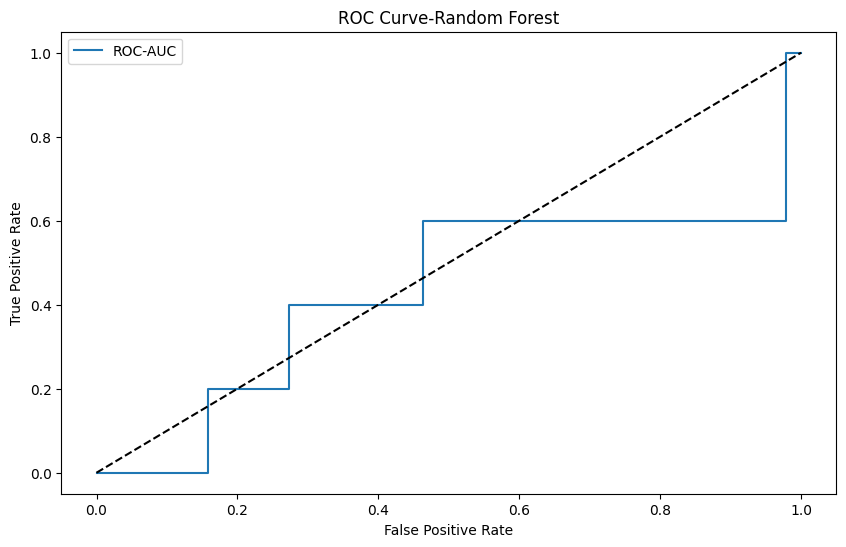

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Random Forest')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify only **46%** of the **non fraudulent** transactions correctly but able to classify **60%** of the **fraudulent** transactions correctly from the test data
*   Eventhough the Recall is high i.e **60%** but the classifier is not able to maximise the classification of non fraudulent transactions as the false positive rate is around **54%**
*  AUC of ROC curve shows the model is performing poorly as most of the FPR curve is below the diagonal line






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters but after tuning the model is able to classify 60% of the the fraud transactions but ability of classifying non fraudulent transactions is reduced i.e only 46%
* The **F1 score** has been **improved** from **0%** to **10%** when using the tuned hyperparameters



## **AdaBoost Classifier**

###**Default** **parameters**

In [ ]:
#AdaBoost Classifier with decision tree as base model for the boosting rounds
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
#Training the model
ada_clf.fit(X_train, y_train)
y_pred_train=ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)

In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred_test)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00        48

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        95
           1       0.00      0.00      0.00         5

    accuracy                           0.89       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.90      0.89      0.89       100



Training the model using default parameters shows that the model has very high variance. As the model has a f1 score of 1 in train data but .94 and 0 and  in test data as in test data the model classifies Most of the transactions as non fraudulent transactions

###**Hyperparameter** **Tuning**
*   N_estimators- Number of boosting rounds
*   Learning rate - Importance/Contribution of each base estimator
*   Max depth of base model - Depth of each tree in each boosting round
*   Split criterion for base model- Split criteria to be used in the base decision tree for each boosting round
*   Class weight for base model - Assign weight to minority samples in the base model







In [ ]:
##Creating the parameter space for the ada boost algorithm
param_grid= {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0,2.0],
     'ada__base_estimator__max_depth': [2,3,4,5],
     'ada__base_estimator__criterion': ['gini', 'entropy'],
    'ada__base_estimator__class_weight':[None,{0:1,1:50},'balanced',{0:1,1:100},{0:1,1:1000}]
}


# Create a pipeline with AdaBoost Classifier. Standardization is not required for tree based model
pipeline = Pipeline([
      # ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),random_state=45))

])
#Initializing Stratified K fold cross validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with tuning parameter as f1 score
grid_search_ada_v2 = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=skf,n_jobs=-1,scoring='f1')

# Fit GridSearchCV
grid_search_ada_v2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ada',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                                                           random_state=45))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__class_weight': [None,
                                                               {0: 1, 1: 50},
                                                               'balanced',
                                                               {0: 1, 1: 100},
                                                               {0: 1, 1: 1000}],
                         'ada__base_estimator__criterion': ['gini', 'entropy'],
                         'ada__base_estimator__max_depth': [2, 3, 4, 5],
                         'ada__learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'ada__n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
#Best parameter combinations
grid_search_ada_v2.best_params_

{'ada__base_estimator__class_weight': 'balanced',
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__max_depth': 2,
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 200}

In [ ]:
#Evaluating the best hyperparameter combination
best_model = grid_search_ada_v2.best_estimator_
y_pred_train = best_model.predict(X_train)
train_f1 = f1_score(y_train, y_pred_train)
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 1.0
Test F1 Score: 0.0


In [ ]:
print("Classification Report of Training Data")
report = classification_report(y_train, y_pred_train)
print(report)
print("Classification Report of Test Data")
report = classification_report(y_test, y_pred)
print(report)

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00        48

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Classification Report of Test Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.00      0.00      0.00         5

    accuracy                           0.95       100
   macro avg       0.47      0.50      0.49       100
weighted avg       0.90      0.95      0.93       100



*   Evaluation report shows that ada boost is **overfitting** the train data as the model classifies positive and negative class correctly
*   The model is able to classify only **0%** of the **fraudulent** transactions and the test f1 score is very low compared to train f1 score
*   Thus the model has **high** **variance** and no bias






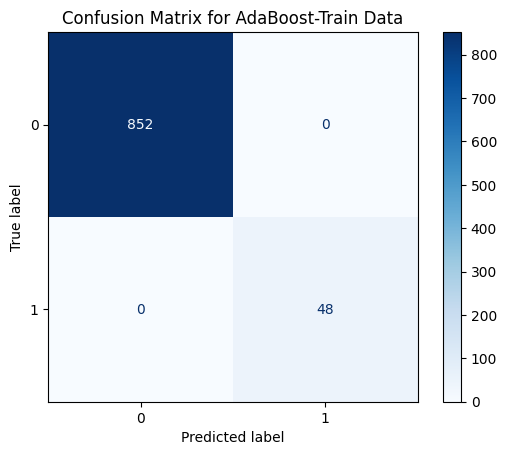

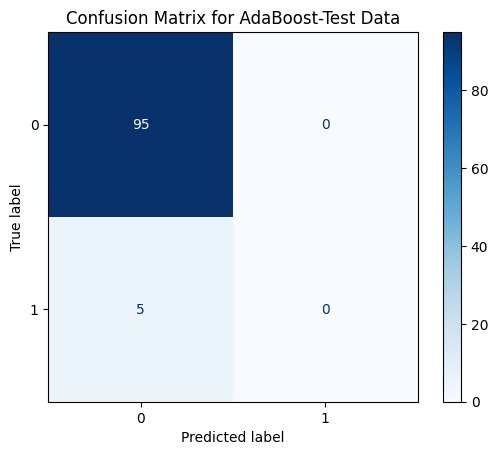

In [ ]:
##Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Train Data')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for AdaBoost-Test Data')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# TPR, FPR, FNR, TNR
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
fpr = fp / (fp + tn)  # False Positive Rate (1 - Specificity)
fnr = fn / (fn + tp)  # False Negative Rate
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)


print(f"Precision: {precision:.2f}")
print(f"Recall (TPR): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassification Rate: {misclassification_rate:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

Precision: 0.00
Recall (TPR): 0.00
F1 Score: 0.00
Accuracy: 0.95
Misclassification Rate: 0.05
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 1.00
True Negative Rate (TNR): 1.00


AUC-ROC: 0.4463157894736842


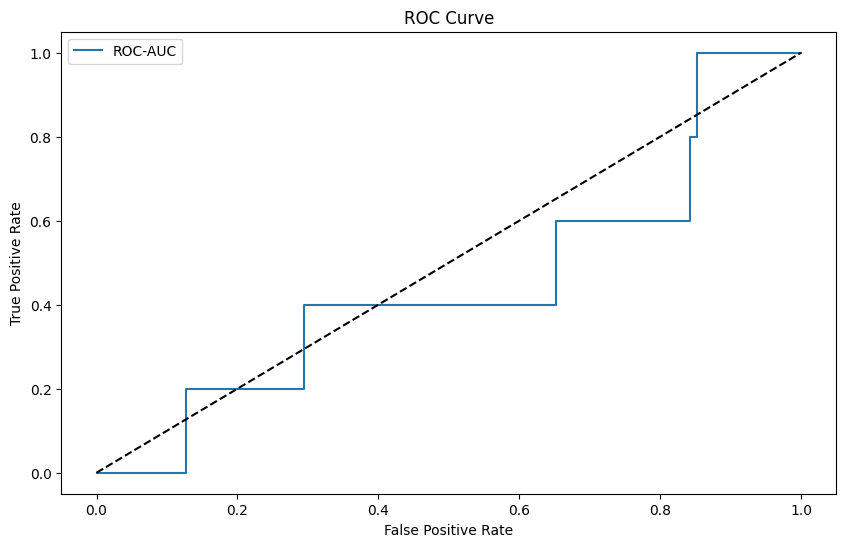

In [ ]:
##ROC CURVE
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {auc}')
#Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC-AUC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Evaluation of best parameters obtained from Grid Search**
*   The classifier is able to classify **100%** of the **non fraudulent** transactions correctly but unable to classify the **fraudulent** transactions from the test data. It classify all to the **non fraudulent** transactions.
*   Eventhough the accuracy is high and misclassification rate is low i.e **95%, 5%** but the classifier is not able to maximise the classification of fraudulent transactions as the false negative rate is around 100%
*  AUC of ROC curve shows the model is performing poorly






**Comparison of Model Before and After Tuning:**
*  The model was not able to identify fraudulent transactions using default parameters and after tune the hyper parameter as well.
* The **F1 score** has not been **improved**


**Overall Performance:**  **-Comparing All algorithms**
*  Comparing all algorithms **random forest** performed well less bias and less variance than other models.






#**Overall Performance - Comparing all split and all algorithm**
By comparing all algorithms with different splits we could see that decision tree classifier performed well with 80-20 split with less bias and less variance than other models and high auc than others.Also in terms of all algorithms 80-20 split is consistently performing well than other splits

The decision tree which performed well is visualized and the feature importance of the classifier is printed. The split is 80-20 and the parameter combination is passed to decision tree classifier

##Visualizing the Decision Tree and Feature Importance

In [ ]:
#The hyperparameter combination that acheived good results is used
tree_model=DecisionTreeClassifier(class_weight={0: 1, 1: 1000}, criterion='entropy',
                                          max_depth=20, max_features='sqrt', random_state=45)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1000}, criterion='entropy',
                       max_depth=20, max_features='sqrt', random_state=45)

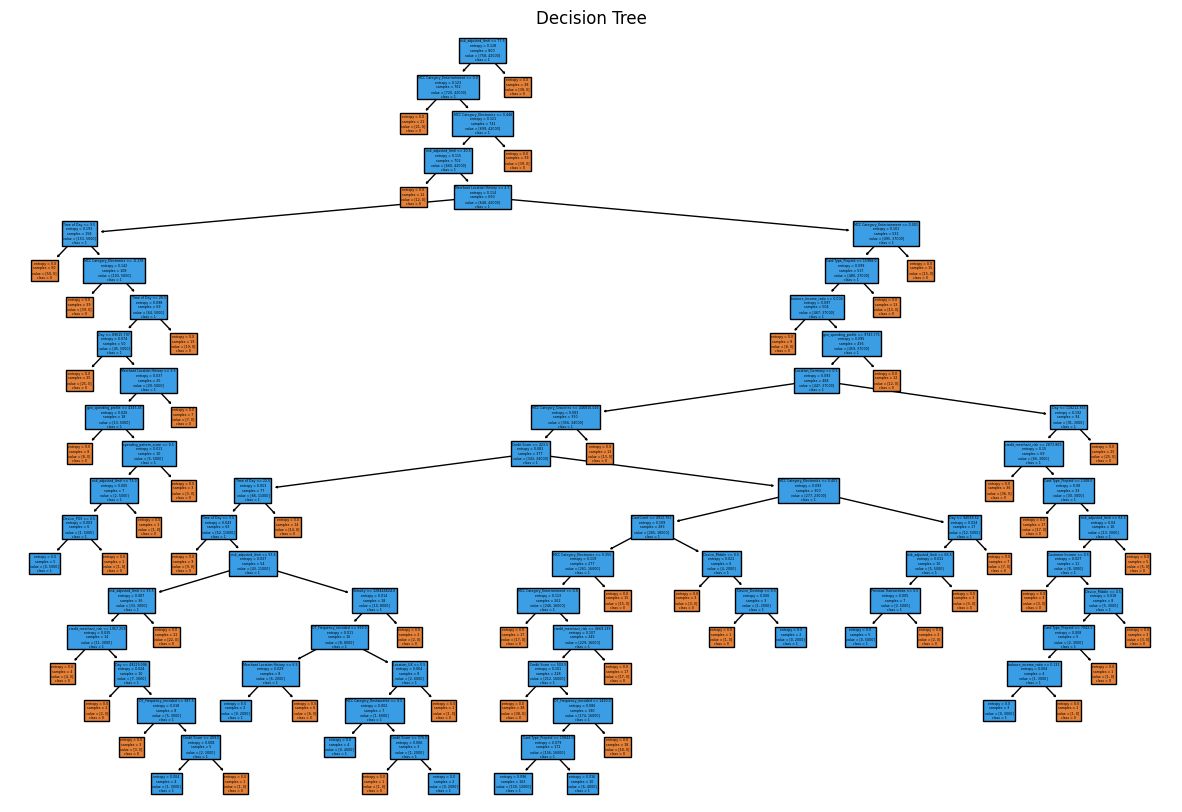

In [ ]:
##Visualizing the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))  # Set the figure size
plot_tree(tree_model, filled=True, feature_names=column_list2, class_names=categorical_df['Is Fraudulent'].astype(str))
plt.title("Decision Tree")
plt.show()


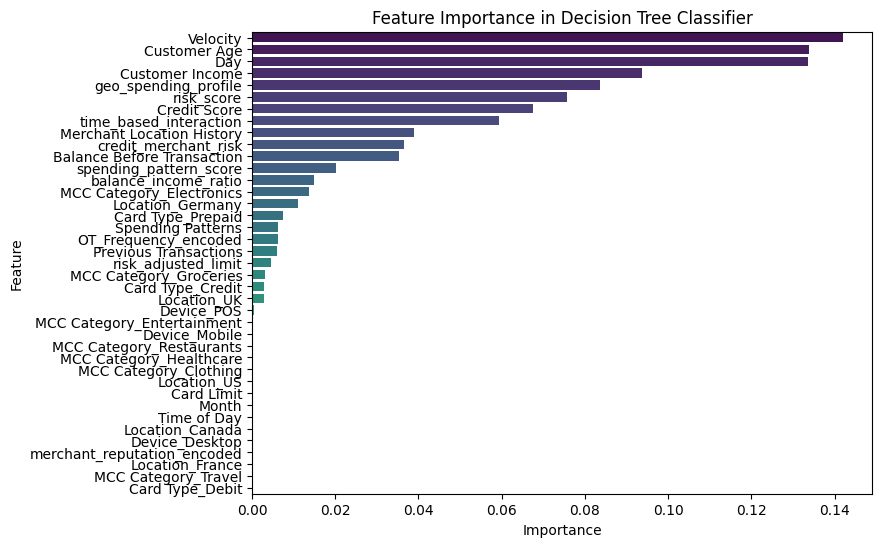

In [ ]:
# 2. Plot Feature Importances
# Get feature importances
importances = tree_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': column_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance in Decision Tree Classifier")
plt.show()

Velocity holds the highest feature importance followed by Customer Age and Day